In [ ]:
!pip install bilby

     |████████████████████████████████| 11.6MB 6.7MB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for bilby: filename=bilby-1.0.1-cp36-none-any.whl size=2181064 sha256=28f340b1653ffb2440fca99bd1e4fbd8c55500bb56e79a3325fb97a80a05d519
  Stored in directory: /root/.cache/pip/wheels/36/30/57/bb47c00d04c8e74b44d1461e800cc358ae712e6f055ae5256c
Successfully built bilby


In [ ]:
!pip install gwpy

     |████████████████████████████████| 1.4MB 7.7MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 2.6MB 29.4MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl size=83603 sha256=afe6ead23954217b1878186c569f898e382fefe3a2cb4aa248292611eb9bf34d
  Stored in directory: /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df
Successfully built ligo-segments


In [ ]:
!pip install lalsuite

     |████████████████████████████████| 27.2MB 156kB/s 
     |████████████████████████████████| 1.6MB 54.1MB/s 
  Created wheel for lscsoft-glue: filename=lscsoft_glue-2.0.0-cp36-cp36m-linux_x86_64.whl size=414146 sha256=98965c0a780d471093207980de889356f4303f223cbf12acf9847d7d608b2a4b
  Stored in directory: /root/.cache/pip/wheels/aa/fa/38/d61b002c627ca54f03755b9a288f4b1fa83291608a4bc47b7b
Successfully built lscsoft-glue


15:32 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.sine_gaussian
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/usr/local/lib/python3.6/dist-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
15:32 bilby WARNING : Injecting signal outside segment, start_time=-3, merger time=0.
15:32 bilby INFO    : Injected signal in H1:
15:32 bilby INFO    :   optimal SNR = 9.83
15:32 bilby INFO    :   matched filter SNR = 12.35+1.21j
15:32 bilby INFO    :   A = 5e-22
15:32 bilby INFO    :   f0 = 50
15:32 bilby INFO    :   tau = 0.02
15:32 bilby INFO    :   phi0 = 0
15:32 bilby INFO    :   geocent_time = 0
15:32 bilby INFO    :   ra = 0
15:32 bilby INFO    :   dec = 0
15:32 bilby INFO    :   psi = 0
15:32 bilby INFO    :   M = 0.02
15:32

[ 3.00405254 -0.36603847 -1.74005629 ... -5.13941992 -2.26993967
  2.93836492]
[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -2.89987839e-03-2.89526339e-03j -4.42002578e-03-5.28031013e-03j
 -6.40695833e-03-9.21215269e-03j -9.76420393e-03-1.71153374e-02j
 -1.22132930e-02-2.66874521e-02j -1.28392220e-02-3.63029347e-02j
 -1.30276545e-02-5.08742450e-02j -1.07856009e-02-6.62282640e-02j
 -5.9711572

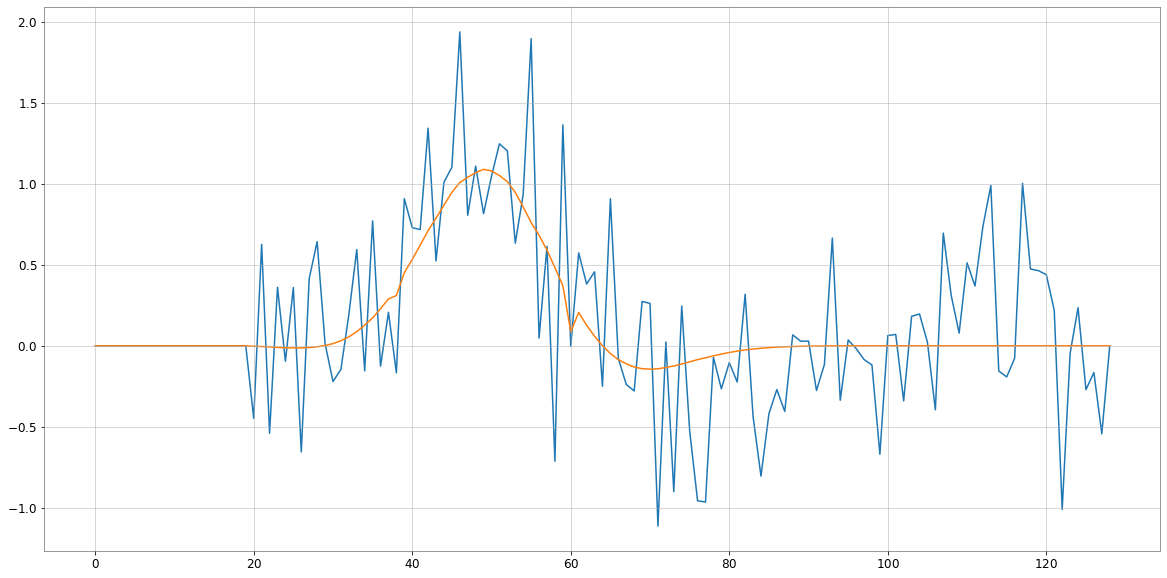

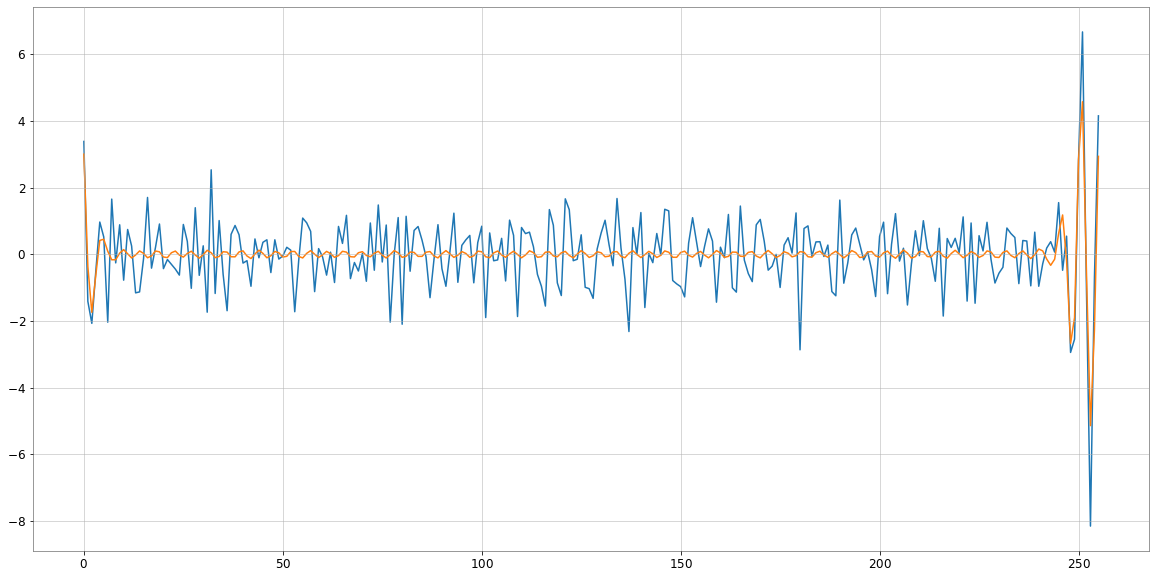

In [ ]:
#!/usr/bin/env python
"""
A script to demonstrate to plot corner plots of sine gaussian source signal
"""
from __future__ import division, print_function
import bilby
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt

# First set up logging and some output directories and labels
outdir = 'outdir'
label = 'create_your_own_source_model'
sampling_frequency = 256
duration = 1

# Here we define out source model - this is the sine-Gaussian model in the
# frequency domain.
def sine_gaussian(f, A, f0, tau, phi0, geocent_time, ra, dec, psi, M, y):
    w = 8*np.pi*M*f
    arg = -(np.pi * tau * (f - f0))**2 + 1j * phi0 
    plus = np.sqrt(np.pi) * A * tau * np.exp(arg) / 2.
    cross = plus * np.exp(1j * np.pi / 2)
    return {'plus': plus, 'cross': cross}

# We now define some parameters that we will inject
injection_parameters = dict(A=5e-22, f0=50, tau=0.02, phi0=0, geocent_time=0,
                            ra=0, dec=0, psi=0, M=2e-2, y=0.1)

# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=sine_gaussian)

# Set up interferometers.
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

# compute the number of time domain samples
Nt = int(sampling_frequency*duration)

# extract waveform from bilby
freq_signal = waveform_generator.frequency_domain_strain() 

# get frequency domain noise-free signal at detector
signal_fd = ifos[0].get_detector_response(freq_signal, injection_parameters)

# whiten frequency domain noise-free signal (and reshape/flatten)
whitened_signal_fd = signal_fd/ifos[0].amplitude_spectral_density_array

# get frequency domain signal + noise at detector
h_fd = ifos[0].strain_data.frequency_domain_strain

# inverse FFT noise-free signal back to time domain and normalise
whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)

# whiten noisy frequency domain signal
whitened_h_fd = h_fd/ifos[0].amplitude_spectral_density_array

# inverse FFT noisy signal back to time domain and normalise
whitened_h_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_h_fd)
print(whitened_signal_td)
print(whitened_signal_fd)

#plot source signal
x=np.arange(0,128)
plt.figure(figsize=(20,10))
plt.plot(whitened_h_fd)
plt.plot(whitened_signal_fd)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(whitened_h_td)
plt.plot(whitened_signal_td)
plt.show()


01:36 bilby INFO    : Running for label 'create_your_own_source_model', output will be saved to 'outdir'
01:36 bilby INFO    : Using lal version 7.0.0
01:36 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
01:36 bilby INFO    : Using lalsimulation version 2.2.0
01:36 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
01:36 bilby INFO    : Search parameters:
01:36 bilby INFO    :   A = LogUniform(minimum=1e-23, maximum=1e-21, name='A', latex_label='A', unit=None, boundary=None)
01:36 bilby INFO    :   f0 = Uniform(minimum=45, maximum=55, name='f0', latex_label='f0', unit=None, boundary=None)
01:36 bilby INFO    :   tau = 0.02
01:36 bilby INFO    :   phi0 = 0
01:36 bilby INFO    :   geocent_time = 0

0it [00:00, ?it/s]

01:36 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fe27cb939b0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
01:36 bilby INFO    : Checkpoint every check_point_delta_t = 600s
01:36 bilby INFO    : Using dynesty version 1.0.1
01:36 bilby INFO    : Generating initial points from the pri

635it [00:02,  9.79it/s, bound:0 nc:  3 ncall:1.9e+03 eff:33.4% logz-ratio=27.07+/-0.09 dlogz:89.503>0.1]

01:36 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle


6942it [00:40, 496.56it/s, bound:11 nc:  1 ncall:4.2e+04 eff:16.6% logz-ratio=112.50+/-0.08 dlogz:0.104>0.1]

01:36 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
01:36 bilby INFO    : Writing 2730 current samples to outdir/create_your_own_source_model_samples.dat


6983it [00:46, 149.76it/s, bound:11 nc:  1 ncall:4.2e+04 eff:19.1% logz-ratio=112.60+/-0.09 dlogz:0.000>0.1]



01:36 bilby INFO    : Sampling time: 0:00:38.497832
01:36 bilby INFO    : Summary of results:
nsamples: 7983
ln_noise_evidence: -352.650
ln_evidence: -240.050 +/-  0.085
ln_bayes_factor: 112.600 +/-  0.085



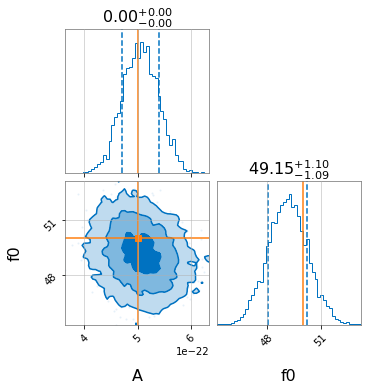

In [ ]:
#define priors
prior = injection_parameters.copy()
prior['A'] = bilby.core.prior.LogUniform(minimum=1e-23, maximum=1e-21, name='A')
prior['f0'] = bilby.core.prior.Uniform(45, 55, 'f0')

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

#plot corner plots
result = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    resume=False, sample='unif', injection_parameters=injection_parameters)
result.plot_corner()

11:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.sine_gaussian
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/usr/local/lib/python3.6/dist-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
11:29 bilby WARNING : Injecting signal outside segment, start_time=-3, merger time=0.
11:29 bilby INFO    : Injected signal in H1:
11:29 bilby INFO    :   optimal SNR = 17.21
11:29 bilby INFO    :   matched filter SNR = 16.27+1.78j
11:29 bilby INFO    :   A = 5e-22
11:29 bilby INFO    :   f0 = 50
11:29 b

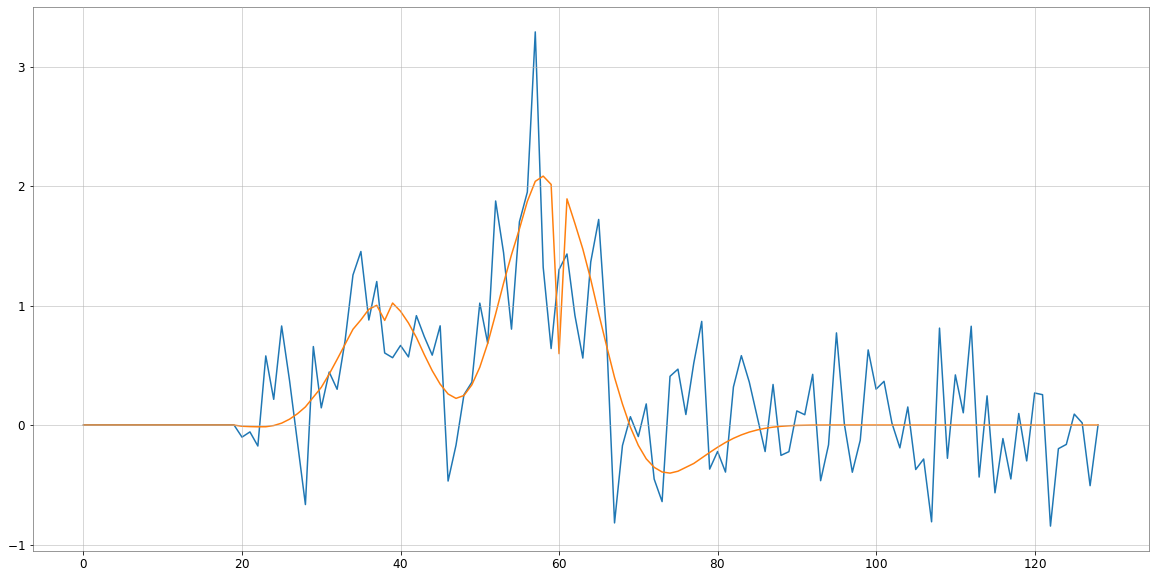

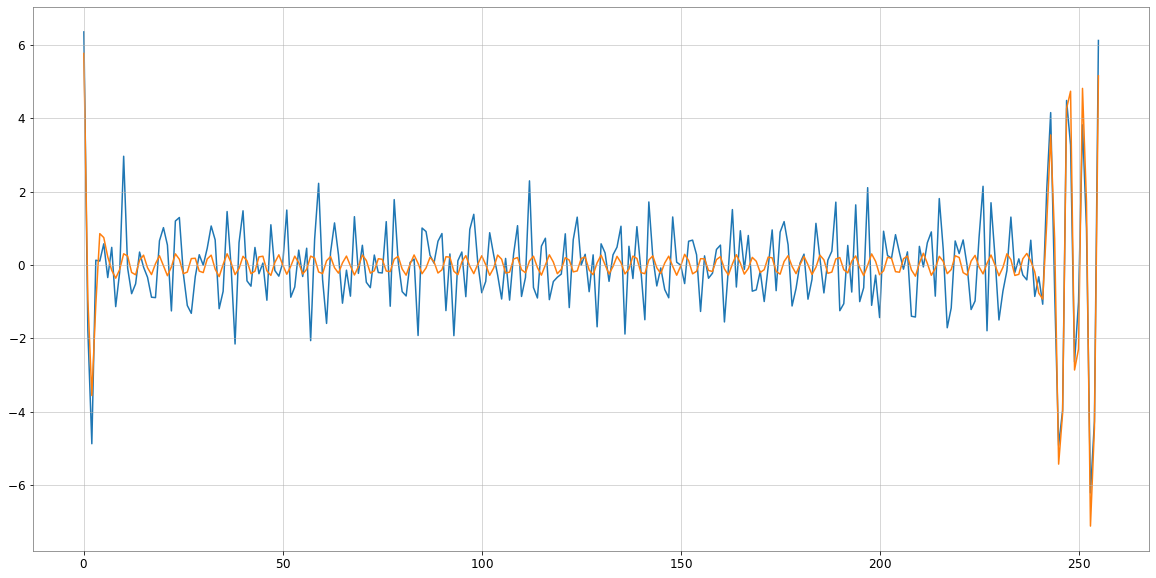

In [ ]:
#!/usr/bin/env python
"""
A script to demonstrate how to plot corner plots for lensed sine gaussian signal
"""
from __future__ import division, print_function
import bilby
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt

# First set up logging and some output directories and labels
outdir = 'outdir'
label = 'create_your_own_source_model'
sampling_frequency = 256
duration = 1

#PM lens model
def F(w,y):
    xm=0.5*(y+np.sqrt(y*y+4.0))
    phim=0.5*((xm-y)**2)-np.log(xm)
    HYP = [complex(mp.hyp1f1(((1j/2)*z),1.0,((1j/2)*z*y*y))) for z in w]
    F = ((np.exp((np.pi*w)/4)) * (scipy.special.gamma(1-((1j/2)*w))) * HYP * (np.exp(0.5j*w*(np.log(0.5*w)-2.0*phim))))
    return F

# Here we define out source model - this is the sine-Gaussian model in the
# frequency domain.
def sine_gaussian(f, A, f0, tau, phi0, geocent_time, ra, dec, psi, M, y):
    w = 8*np.pi*M*f
    arg = -(np.pi * tau * (f - f0))**2 + 1j * phi0 
    Mag = F(w,y)
    Mag[0]=1.0
    plus = np.sqrt(np.pi) * A * Mag* tau * np.exp(arg) / 2. #lens model added
    cross = plus * np.exp(1j * np.pi / 2)
    return {'plus': plus, 'cross': cross}

# We now define some parameters that we will inject
injection_parameters = dict(A=5e-22, f0=50, tau=0.02, phi0=0, geocent_time=0,
                            ra=0, dec=0, psi=0, M=2e-2, y=0.1)

# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=sine_gaussian)

# Set up interferometers.
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

# compute the number of time domain samples
Nt = (sampling_frequency*duration)

# extract waveform from bilby
freq_signal = waveform_generator.frequency_domain_strain() 

# get frequency domain noise-free signal at detector
signal_fd = ifos[0].get_detector_response(freq_signal, injection_parameters)

# whiten frequency domain noise-free signal (and reshape/flatten)
whitened_signal_fd = signal_fd/ifos[0].amplitude_spectral_density_array

# get frequency domain signal + noise at detector
h_fd = ifos[0].strain_data.frequency_domain_strain

# inverse FFT noise-free signal back to time domain and normalise
whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)

# whiten noisy frequency domain signal
whitened_h_fd = h_fd/ifos[0].amplitude_spectral_density_array

# inverse FFT noisy signal back to time domain and normalise
whitened_h_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_h_fd)

#plot lensed source signal
x=np.arange(0,128)
plt.figure(figsize=(20,10))
plt.plot(whitened_h_fd)
plt.plot(whitened_signal_fd)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(whitened_h_td)
plt.plot(whitened_signal_td)
plt.show()


08:11 bilby INFO    : Running for label 'create_your_own_source_model', output will be saved to 'outdir'
08:11 bilby INFO    : Using lal version 7.0.0
08:11 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
08:11 bilby INFO    : Using lalsimulation version 2.2.0
08:11 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
08:11 bilby INFO    : Search parameters:
08:11 bilby INFO    :   A = LogUniform(minimum=1e-23, maximum=1e-21, name='A', latex_label='A', unit=None, boundary=None)
08:11 bilby INFO    :   f0 = Uniform(minimum=40, maximum=60, name='f', latex_label='f', unit=None, boundary=None)
08:11 bilby INFO    :   M = Uniform(minimum=0.001, maximum=0.05, name='M', latex_label='M', unit=None, boundar

0it [00:00, ?it/s]

08:11 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fd970501f98>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
08:11 bilby INFO    : Checkpoint every check_point_delta_t = 600s
08:11 bilby INFO    : Using dynesty version 1.0.1
08:11 bilby INFO    : Generating initial points from the pri

3601it [07:39,  1.02s/it, bound:1 nc:  2 ncall:3.6e+04 eff:10.0% logz-ratio=673.91+/-0.12 dlogz:262.812>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3651it [07:50,  1.20it/s, bound:2 nc:  1 ncall:3.7e+04 eff:9.9% logz-ratio=677.58+/-0.12 dlogz:259.056>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3682it [07:59,  4.56it/s, bound:2 nc: 12 ncall:3.7e+04 eff:9.9% logz-ratio=680.52+/-0.12 dlogz:256.134>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3732it [08:13,  1.60it/s, bound:4 nc: 10 ncall:3.8e+04 eff:9.8% logz-ratio=686.46+/-0.12 dlogz:250.126>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3777it [08:23,  1.03it/s, bound:5 nc: 11 ncall:3.9e+04 eff:9.8% logz-ratio=691.14+/-0.12 dlogz:245.401>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3801it [08:34,  1.91it/s, bound:5 nc:106 ncall:3.9e+04 eff:9.7% logz-ratio=693.66+/-0.12 dlogz:242.882>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3831it [08:47,  1.07it/s, bound:7 nc: 10 ncall:4.0e+04 eff:9.6% logz-ratio=697.07+/-0.12 dlogz:239.390>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3851it [08:59,  1.17it/s, bound:8 nc:  7 ncall:4.0e+04 eff:9.5% logz-ratio=698.79+/-0.12 dlogz:237.655>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3890it [09:08,  2.48it/s, bound:8 nc: 39 ncall:4.1e+04 eff:9.5% logz-ratio=702.77+/-0.12 dlogz:237.620>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3926it [09:18,  5.70it/s, bound:9 nc:  9 ncall:4.2e+04 eff:9.4% logz-ratio=705.99+/-0.12 dlogz:234.403>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3954it [09:30,  2.43it/s, bound:10 nc: 56 ncall:4.2e+04 eff:9.3% logz-ratio=708.83+/-0.12 dlogz:231.515>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


3990it [09:42,  3.05it/s, bound:11 nc: 35 ncall:4.3e+04 eff:9.3% logz-ratio=712.09+/-0.12 dlogz:228.204>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4014it [09:58,  1.37s/it, bound:13 nc:  8 ncall:4.4e+04 eff:9.2% logz-ratio=714.25+/-0.12 dlogz:226.049>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4037it [10:09,  1.06it/s, bound:14 nc: 12 ncall:4.4e+04 eff:9.1% logz-ratio=716.63+/-0.12 dlogz:223.610>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4060it [10:17,  2.28it/s, bound:14 nc: 58 ncall:4.5e+04 eff:9.0% logz-ratio=718.65+/-0.12 dlogz:221.552>0.1]

08:21 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
08:22 bilby WARNING : Axis limits cannot be NaN or Inf
08:22 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4065it [10:24,  1.17s/it, bound:15 nc:  3 ncall:4.5e+04 eff:9.0% logz-ratio=718.99+/-0.12 dlogz:221.214>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4082it [10:33,  2.03it/s, bound:15 nc: 53 ncall:4.6e+04 eff:8.9% logz-ratio=720.58+/-0.12 dlogz:219.636>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4104it [10:51,  1.66s/it, bound:17 nc:  1 ncall:4.6e+04 eff:8.9% logz-ratio=722.75+/-0.12 dlogz:217.428>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4128it [11:01,  1.50it/s, bound:17 nc:100 ncall:4.7e+04 eff:8.8% logz-ratio=725.31+/-0.12 dlogz:214.854>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4145it [11:12,  1.69it/s, bound:18 nc: 56 ncall:4.8e+04 eff:8.7% logz-ratio=726.73+/-0.12 dlogz:213.400>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4163it [11:24,  1.54it/s, bound:20 nc:  6 ncall:4.8e+04 eff:8.6% logz-ratio=728.06+/-0.12 dlogz:212.062>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4180it [11:33,  2.50it/s, bound:20 nc: 18 ncall:4.9e+04 eff:8.6% logz-ratio=729.46+/-0.12 dlogz:210.634>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4195it [11:45,  1.36it/s, bound:21 nc: 75 ncall:4.9e+04 eff:8.5% logz-ratio=730.60+/-0.12 dlogz:209.471>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4218it [11:56,  1.89it/s, bound:22 nc: 72 ncall:5.0e+04 eff:8.4% logz-ratio=732.94+/-0.13 dlogz:207.163>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4233it [12:09,  1.14s/it, bound:23 nc: 74 ncall:5.1e+04 eff:8.3% logz-ratio=734.28+/-0.12 dlogz:205.760>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4238it [12:25,  1.92s/it, bound:24 nc: 56 ncall:5.1e+04 eff:8.2% logz-ratio=734.63+/-0.12 dlogz:205.395>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4249it [12:38,  1.08it/s, bound:25 nc: 57 ncall:5.2e+04 eff:8.2% logz-ratio=735.35+/-0.12 dlogz:204.655>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4258it [12:50,  1.18s/it, bound:26 nc: 11 ncall:5.3e+04 eff:8.1% logz-ratio=735.94+/-0.12 dlogz:204.068>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4274it [13:05,  1.06it/s, bound:28 nc:  1 ncall:5.3e+04 eff:8.0% logz-ratio=737.12+/-0.12 dlogz:202.888>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4282it [13:20,  2.21s/it, bound:28 nc:147 ncall:5.4e+04 eff:7.9% logz-ratio=737.80+/-0.12 dlogz:202.192>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4299it [13:34,  1.41s/it, bound:29 nc:192 ncall:5.5e+04 eff:7.9% logz-ratio=739.08+/-0.12 dlogz:200.917>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4312it [13:47,  1.02s/it, bound:30 nc: 65 ncall:5.5e+04 eff:7.8% logz-ratio=740.12+/-0.12 dlogz:199.848>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4319it [14:06,  3.20s/it, bound:31 nc:279 ncall:5.6e+04 eff:7.7% logz-ratio=740.66+/-0.12 dlogz:199.287>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4329it [14:24,  1.84s/it, bound:33 nc:  1 ncall:5.7e+04 eff:7.7% logz-ratio=741.40+/-0.12 dlogz:198.543>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4343it [14:37,  1.30s/it, bound:33 nc:190 ncall:5.7e+04 eff:7.6% logz-ratio=742.30+/-0.12 dlogz:197.622>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4363it [14:50,  1.61it/s, bound:34 nc: 55 ncall:5.8e+04 eff:7.5% logz-ratio=743.70+/-0.12 dlogz:196.206>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4373it [15:08,  2.92s/it, bound:35 nc:366 ncall:5.9e+04 eff:7.4% logz-ratio=744.47+/-0.12 dlogz:195.427>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4385it [15:31,  2.26s/it, bound:37 nc:  2 ncall:6.0e+04 eff:7.4% logz-ratio=745.39+/-0.12 dlogz:194.495>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4426it [15:40,  2.36it/s, bound:38 nc: 10 ncall:6.0e+04 eff:7.4% logz-ratio=748.75+/-0.12 dlogz:191.078>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4460it [15:48,  3.84it/s, bound:38 nc: 37 ncall:6.1e+04 eff:7.3% logz-ratio=751.21+/-0.12 dlogz:188.607>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4488it [15:59,  1.93it/s, bound:40 nc:  6 ncall:6.1e+04 eff:7.3% logz-ratio=753.20+/-0.12 dlogz:186.570>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4529it [16:07,  6.73it/s, bound:40 nc: 15 ncall:6.2e+04 eff:7.3% logz-ratio=756.04+/-0.12 dlogz:183.693>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4544it [16:18,  1.37it/s, bound:41 nc:111 ncall:6.3e+04 eff:7.2% logz-ratio=756.89+/-0.12 dlogz:182.832>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4571it [16:28,  1.51it/s, bound:43 nc:  7 ncall:6.3e+04 eff:7.2% logz-ratio=759.53+/-0.13 dlogz:180.206>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4609it [16:39,  1.23it/s, bound:44 nc:  3 ncall:6.4e+04 eff:7.2% logz-ratio=762.49+/-0.13 dlogz:177.164>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4639it [16:48,  1.53it/s, bound:45 nc:  2 ncall:6.5e+04 eff:7.2% logz-ratio=764.61+/-0.13 dlogz:175.018>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4667it [16:57,  2.54it/s, bound:45 nc: 44 ncall:6.5e+04 eff:7.2% logz-ratio=766.82+/-0.13 dlogz:172.793>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4698it [17:06,  5.08it/s, bound:46 nc: 17 ncall:6.6e+04 eff:7.1% logz-ratio=768.75+/-0.12 dlogz:170.812>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4726it [17:16,  2.78it/s, bound:47 nc: 42 ncall:6.6e+04 eff:7.1% logz-ratio=770.35+/-0.12 dlogz:169.174>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4743it [17:26,  1.91it/s, bound:48 nc: 76 ncall:6.7e+04 eff:7.1% logz-ratio=771.13+/-0.12 dlogz:168.367>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4766it [17:36,  2.48it/s, bound:49 nc: 60 ncall:6.8e+04 eff:7.0% logz-ratio=772.22+/-0.12 dlogz:167.264>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4786it [17:48,  2.19it/s, bound:51 nc: 10 ncall:6.8e+04 eff:7.0% logz-ratio=773.40+/-0.12 dlogz:166.075>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4837it [17:57,  3.71it/s, bound:52 nc: 10 ncall:6.9e+04 eff:7.0% logz-ratio=777.06+/-0.13 dlogz:162.385>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4875it [18:06,  3.64it/s, bound:52 nc: 23 ncall:7.0e+04 eff:7.0% logz-ratio=779.62+/-0.13 dlogz:159.771>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4891it [18:15,  2.60it/s, bound:53 nc: 18 ncall:7.0e+04 eff:7.0% logz-ratio=780.77+/-0.13 dlogz:158.598>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4906it [18:27,  1.19it/s, bound:55 nc:  2 ncall:7.1e+04 eff:6.9% logz-ratio=781.62+/-0.13 dlogz:157.733>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4931it [18:35,  4.91it/s, bound:55 nc: 10 ncall:7.1e+04 eff:6.9% logz-ratio=783.55+/-0.13 dlogz:155.845>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4942it [18:46,  1.02it/s, bound:57 nc:  1 ncall:7.2e+04 eff:6.9% logz-ratio=784.65+/-0.13 dlogz:154.688>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4950it [18:55,  1.34s/it, bound:57 nc:131 ncall:7.3e+04 eff:6.8% logz-ratio=785.31+/-0.13 dlogz:154.020>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4972it [19:04,  1.78it/s, bound:58 nc: 82 ncall:7.3e+04 eff:6.8% logz-ratio=786.91+/-0.13 dlogz:152.370>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4984it [19:14,  1.69it/s, bound:59 nc: 41 ncall:7.4e+04 eff:6.8% logz-ratio=787.51+/-0.13 dlogz:151.760>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


4999it [19:23,  1.35it/s, bound:60 nc: 60 ncall:7.4e+04 eff:6.7% logz-ratio=788.31+/-0.13 dlogz:150.946>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5017it [19:33,  2.03it/s, bound:61 nc: 48 ncall:7.5e+04 eff:6.7% logz-ratio=789.18+/-0.13 dlogz:150.048>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5032it [19:43,  1.31it/s, bound:62 nc: 18 ncall:7.6e+04 eff:6.7% logz-ratio=789.93+/-0.13 dlogz:149.285>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5047it [19:54,  1.04it/s, bound:64 nc: 10 ncall:7.6e+04 eff:6.6% logz-ratio=790.78+/-0.13 dlogz:148.432>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5065it [20:03,  1.60it/s, bound:64 nc: 81 ncall:7.7e+04 eff:6.6% logz-ratio=792.09+/-0.13 dlogz:147.121>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5077it [20:12,  1.22it/s, bound:65 nc: 87 ncall:7.8e+04 eff:6.5% logz-ratio=793.02+/-0.13 dlogz:146.165>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5089it [20:26,  1.77s/it, bound:66 nc:281 ncall:7.8e+04 eff:6.5% logz-ratio=793.70+/-0.13 dlogz:145.464>0.1]

08:32 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
08:32 bilby WARNING : Axis limits cannot be NaN or Inf
08:32 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5098it [20:42,  1.47s/it, bound:67 nc: 80 ncall:7.9e+04 eff:6.5% logz-ratio=794.22+/-0.13 dlogz:144.936>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5107it [20:53,  1.03it/s, bound:68 nc: 65 ncall:8.0e+04 eff:6.4% logz-ratio=794.77+/-0.13 dlogz:144.374>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5123it [21:03,  1.70it/s, bound:69 nc: 61 ncall:8.0e+04 eff:6.4% logz-ratio=795.72+/-0.13 dlogz:143.432>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5133it [21:14,  1.61s/it, bound:70 nc:203 ncall:8.1e+04 eff:6.3% logz-ratio=796.39+/-0.13 dlogz:142.739>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5147it [21:24,  1.54it/s, bound:71 nc: 55 ncall:8.2e+04 eff:6.3% logz-ratio=797.47+/-0.13 dlogz:141.669>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5175it [21:32,  2.50it/s, bound:72 nc: 74 ncall:8.2e+04 eff:6.3% logz-ratio=800.29+/-0.13 dlogz:138.826>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5183it [22:01,  3.05s/it, bound:73 nc: 91 ncall:8.3e+04 eff:6.3% logz-ratio=801.02+/-0.13 dlogz:138.084>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5187it [22:32,  9.30s/it, bound:74 nc:542 ncall:8.4e+04 eff:6.2% logz-ratio=801.37+/-0.13 dlogz:137.722>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5203it [22:46,  1.41it/s, bound:76 nc:  5 ncall:8.4e+04 eff:6.2% logz-ratio=802.61+/-0.13 dlogz:136.458>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5250it [22:54,  2.21it/s, bound:77 nc:  6 ncall:8.5e+04 eff:6.2% logz-ratio=806.27+/-0.13 dlogz:132.802>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5295it [23:02,  4.05it/s, bound:78 nc: 10 ncall:8.5e+04 eff:6.2% logz-ratio=810.16+/-0.13 dlogz:128.841>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5362it [23:11,  5.02it/s, bound:79 nc:  2 ncall:8.6e+04 eff:6.2% logz-ratio=815.03+/-0.13 dlogz:123.877>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5443it [23:19,  8.04it/s, bound:80 nc:  1 ncall:8.7e+04 eff:6.3% logz-ratio=821.24+/-0.13 dlogz:117.564>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5526it [23:28,  5.02it/s, bound:81 nc:  7 ncall:8.7e+04 eff:6.3% logz-ratio=826.45+/-0.13 dlogz:112.281>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5592it [23:36,  6.68it/s, bound:82 nc:  4 ncall:8.8e+04 eff:6.4% logz-ratio=830.31+/-0.13 dlogz:108.388>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5641it [23:44,  3.56it/s, bound:83 nc: 10 ncall:8.8e+04 eff:6.4% logz-ratio=833.86+/-0.13 dlogz:104.766>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5723it [23:53,  6.09it/s, bound:84 nc:  1 ncall:8.9e+04 eff:6.4% logz-ratio=839.49+/-0.13 dlogz:99.042>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5838it [24:01,  6.65it/s, bound:85 nc: 13 ncall:9.0e+04 eff:6.5% logz-ratio=846.70+/-0.13 dlogz:91.723>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


5955it [24:09,  7.44it/s, bound:86 nc:  9 ncall:9.0e+04 eff:6.6% logz-ratio=853.93+/-0.13 dlogz:84.373>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6070it [24:18, 12.00it/s, bound:87 nc:  1 ncall:9.1e+04 eff:6.7% logz-ratio=860.57+/-0.14 dlogz:77.606>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6167it [24:25, 16.13it/s, bound:87 nc:  3 ncall:9.1e+04 eff:6.7% logz-ratio=865.08+/-0.13 dlogz:72.989>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6287it [24:34,  9.28it/s, bound:89 nc:  1 ncall:9.2e+04 eff:6.8% logz-ratio=870.65+/-0.14 dlogz:67.310>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6339it [24:42,  6.03it/s, bound:89 nc: 21 ncall:9.3e+04 eff:6.8% logz-ratio=872.67+/-0.13 dlogz:65.226>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6383it [24:51,  4.68it/s, bound:91 nc:  2 ncall:9.3e+04 eff:6.8% logz-ratio=874.23+/-0.13 dlogz:63.621>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6435it [24:58,  5.63it/s, bound:91 nc: 31 ncall:9.4e+04 eff:6.9% logz-ratio=876.15+/-0.13 dlogz:61.650>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6494it [25:07,  6.33it/s, bound:93 nc:  9 ncall:9.5e+04 eff:6.9% logz-ratio=878.15+/-0.13 dlogz:59.587>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6572it [25:15,  8.10it/s, bound:93 nc: 12 ncall:9.5e+04 eff:6.9% logz-ratio=881.67+/-0.14 dlogz:55.990>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6614it [25:23,  3.17it/s, bound:95 nc:  6 ncall:9.6e+04 eff:6.9% logz-ratio=883.03+/-0.14 dlogz:54.590>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6687it [25:32,  5.41it/s, bound:96 nc: 11 ncall:9.6e+04 eff:6.9% logz-ratio=885.70+/-0.14 dlogz:51.849>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6738it [25:40,  3.45it/s, bound:97 nc:  6 ncall:9.7e+04 eff:6.9% logz-ratio=887.29+/-0.14 dlogz:50.205>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6823it [25:48, 12.47it/s, bound:97 nc:  1 ncall:9.8e+04 eff:7.0% logz-ratio=889.99+/-0.14 dlogz:47.414>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6849it [25:57,  2.53it/s, bound:99 nc: 10 ncall:9.8e+04 eff:7.0% logz-ratio=890.79+/-0.14 dlogz:46.593>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


6936it [26:05,  6.20it/s, bound:100 nc:  6 ncall:9.9e+04 eff:7.0% logz-ratio=893.18+/-0.14 dlogz:44.109>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7011it [26:13, 10.91it/s, bound:100 nc: 11 ncall:9.9e+04 eff:7.1% logz-ratio=895.14+/-0.14 dlogz:42.072>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7088it [26:22,  4.80it/s, bound:102 nc:  9 ncall:1.0e+05 eff:7.1% logz-ratio=897.14+/-0.14 dlogz:39.998>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7170it [26:30,  6.15it/s, bound:103 nc:  4 ncall:1.0e+05 eff:7.1% logz-ratio=899.07+/-0.14 dlogz:37.984>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7267it [26:38,  5.92it/s, bound:104 nc: 12 ncall:1.0e+05 eff:7.2% logz-ratio=901.09+/-0.14 dlogz:35.866>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7341it [26:46, 10.58it/s, bound:104 nc: 21 ncall:1.0e+05 eff:7.2% logz-ratio=902.38+/-0.14 dlogz:34.501>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7401it [26:55,  6.33it/s, bound:106 nc:  1 ncall:1.0e+05 eff:7.2% logz-ratio=903.38+/-0.14 dlogz:33.435>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7495it [27:03,  7.88it/s, bound:107 nc: 12 ncall:1.0e+05 eff:7.3% logz-ratio=905.22+/-0.14 dlogz:31.499>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7565it [27:12,  6.34it/s, bound:108 nc:  8 ncall:1.0e+05 eff:7.3% logz-ratio=906.59+/-0.14 dlogz:30.059>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7638it [27:20,  4.96it/s, bound:109 nc:  6 ncall:1.0e+05 eff:7.3% logz-ratio=907.84+/-0.14 dlogz:28.741>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7708it [27:28,  3.05it/s, bound:110 nc:  9 ncall:1.0e+05 eff:7.4% logz-ratio=909.04+/-0.14 dlogz:27.466>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7776it [27:36,  5.09it/s, bound:110 nc: 22 ncall:1.1e+05 eff:7.4% logz-ratio=910.14+/-0.14 dlogz:26.301>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7859it [27:45,  4.72it/s, bound:112 nc:  6 ncall:1.1e+05 eff:7.4% logz-ratio=911.37+/-0.14 dlogz:24.980>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


7938it [27:54,  7.34it/s, bound:113 nc:  3 ncall:1.1e+05 eff:7.4% logz-ratio=912.37+/-0.14 dlogz:23.900>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8016it [28:03,  3.56it/s, bound:114 nc:  3 ncall:1.1e+05 eff:7.5% logz-ratio=913.28+/-0.14 dlogz:22.911>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8121it [28:11,  5.49it/s, bound:115 nc:  1 ncall:1.1e+05 eff:7.5% logz-ratio=914.52+/-0.14 dlogz:21.576>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8181it [28:20,  2.63it/s, bound:116 nc:  1 ncall:1.1e+05 eff:7.5% logz-ratio=915.19+/-0.14 dlogz:20.840>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8267it [28:28, 10.46it/s, bound:116 nc:  2 ncall:1.1e+05 eff:7.6% logz-ratio=916.12+/-0.14 dlogz:19.819>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8332it [28:37,  4.60it/s, bound:118 nc:  9 ncall:1.1e+05 eff:7.6% logz-ratio=916.75+/-0.14 dlogz:19.130>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8401it [28:45,  3.14it/s, bound:119 nc: 11 ncall:1.1e+05 eff:7.6% logz-ratio=917.40+/-0.14 dlogz:18.410>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8467it [28:54,  5.14it/s, bound:120 nc: 11 ncall:1.1e+05 eff:7.6% logz-ratio=917.99+/-0.14 dlogz:17.749>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8528it [29:02,  3.90it/s, bound:121 nc:  8 ncall:1.1e+05 eff:7.6% logz-ratio=918.54+/-0.14 dlogz:17.138>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8599it [29:11,  2.93it/s, bound:122 nc:  3 ncall:1.1e+05 eff:7.7% logz-ratio=919.17+/-0.14 dlogz:16.437>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8674it [29:20,  4.66it/s, bound:123 nc:  8 ncall:1.1e+05 eff:7.7% logz-ratio=919.82+/-0.14 dlogz:15.715>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8755it [29:29,  4.49it/s, bound:124 nc:  4 ncall:1.1e+05 eff:7.7% logz-ratio=920.50+/-0.14 dlogz:15.029>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8858it [29:37,  5.00it/s, bound:125 nc:  9 ncall:1.1e+05 eff:7.8% logz-ratio=921.31+/-0.14 dlogz:14.111>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8932it [29:46,  2.85it/s, bound:126 nc:  8 ncall:1.1e+05 eff:7.8% logz-ratio=921.83+/-0.14 dlogz:13.517>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


8996it [29:54,  3.15it/s, bound:127 nc:  5 ncall:1.2e+05 eff:7.8% logz-ratio=922.24+/-0.14 dlogz:13.038>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9045it [30:03,  2.42it/s, bound:128 nc:  8 ncall:1.2e+05 eff:7.8% logz-ratio=922.54+/-0.14 dlogz:12.691>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9100it [30:11,  2.87it/s, bound:129 nc: 12 ncall:1.2e+05 eff:7.8% logz-ratio=922.85+/-0.14 dlogz:12.328>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9137it [30:19,  4.98it/s, bound:129 nc: 18 ncall:1.2e+05 eff:7.8% logz-ratio=923.05+/-0.14 dlogz:12.090>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9213it [30:28,  6.69it/s, bound:131 nc:  4 ncall:1.2e+05 eff:7.8% logz-ratio=923.46+/-0.14 dlogz:11.607>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9252it [30:31,  9.34it/s, bound:131 nc: 17 ncall:1.2e+05 eff:7.8% logz-ratio=923.67+/-0.14 dlogz:11.359>0.1]

08:42 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
08:42 bilby WARNING : Axis limits cannot be NaN or Inf
08:42 bilby WARNING : Failed to create dynesty run plot at checkpoint


9254it [30:39,  1.16s/it, bound:131 nc: 11 ncall:1.2e+05 eff:7.8% logz-ratio=923.68+/-0.14 dlogz:11.346>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9291it [30:44,  6.78it/s, bound:132 nc:  6 ncall:1.2e+05 eff:7.9% logz-ratio=923.87+/-0.14 dlogz:11.114>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9371it [30:53,  4.94it/s, bound:133 nc:  5 ncall:1.2e+05 eff:7.9% logz-ratio=924.29+/-0.14 dlogz:10.622>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9442it [31:02,  3.98it/s, bound:134 nc:  2 ncall:1.2e+05 eff:7.9% logz-ratio=924.66+/-0.14 dlogz:10.178>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9512it [31:11,  5.89it/s, bound:135 nc:  2 ncall:1.2e+05 eff:7.9% logz-ratio=925.01+/-0.14 dlogz:9.753>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9626it [31:19, 13.05it/s, bound:135 nc:  2 ncall:1.2e+05 eff:8.0% logz-ratio=925.53+/-0.14 dlogz:9.124>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9692it [31:29,  2.60it/s, bound:137 nc:  1 ncall:1.2e+05 eff:8.0% logz-ratio=925.80+/-0.14 dlogz:8.788>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9749it [31:37,  4.47it/s, bound:138 nc:  9 ncall:1.2e+05 eff:8.0% logz-ratio=926.02+/-0.14 dlogz:8.509>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9799it [31:45,  4.08it/s, bound:138 nc: 14 ncall:1.2e+05 eff:8.0% logz-ratio=926.21+/-0.14 dlogz:8.269>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9851it [31:55,  3.33it/s, bound:140 nc:  2 ncall:1.2e+05 eff:8.0% logz-ratio=926.40+/-0.14 dlogz:8.022>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9905it [32:03,  5.50it/s, bound:140 nc: 22 ncall:1.2e+05 eff:8.0% logz-ratio=926.60+/-0.14 dlogz:7.775>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


9950it [32:12,  4.49it/s, bound:141 nc: 29 ncall:1.2e+05 eff:8.0% logz-ratio=926.75+/-0.14 dlogz:7.578>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10000it [32:23,  2.47it/s, bound:143 nc:  2 ncall:1.3e+05 eff:8.0% logz-ratio=926.91+/-0.14 dlogz:7.364>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10095it [32:31,  7.84it/s, bound:143 nc:  5 ncall:1.3e+05 eff:8.0% logz-ratio=927.21+/-0.14 dlogz:6.972>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10152it [32:40,  2.62it/s, bound:145 nc:  4 ncall:1.3e+05 eff:8.0% logz-ratio=927.37+/-0.14 dlogz:6.750>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10247it [32:49, 12.02it/s, bound:145 nc:  5 ncall:1.3e+05 eff:8.1% logz-ratio=927.64+/-0.14 dlogz:6.387>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10275it [32:59,  1.86it/s, bound:147 nc: 15 ncall:1.3e+05 eff:8.1% logz-ratio=927.72+/-0.14 dlogz:6.283>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10333it [33:08,  2.66it/s, bound:148 nc:  4 ncall:1.3e+05 eff:8.1% logz-ratio=927.87+/-0.14 dlogz:6.072>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10360it [33:16,  2.84it/s, bound:148 nc: 34 ncall:1.3e+05 eff:8.1% logz-ratio=927.94+/-0.14 dlogz:5.975>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10390it [33:26,  1.99it/s, bound:150 nc:  5 ncall:1.3e+05 eff:8.0% logz-ratio=928.02+/-0.14 dlogz:5.870>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10422it [33:35,  2.27it/s, bound:151 nc: 12 ncall:1.3e+05 eff:8.0% logz-ratio=928.10+/-0.14 dlogz:5.759>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10453it [33:43,  3.93it/s, bound:151 nc: 16 ncall:1.3e+05 eff:8.0% logz-ratio=928.17+/-0.14 dlogz:5.655>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10509it [33:53,  5.96it/s, bound:153 nc:  7 ncall:1.3e+05 eff:8.0% logz-ratio=928.30+/-0.14 dlogz:5.472>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10535it [34:02,  1.96it/s, bound:154 nc: 12 ncall:1.3e+05 eff:8.0% logz-ratio=928.36+/-0.14 dlogz:5.389>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10562it [34:10,  1.66it/s, bound:154 nc: 96 ncall:1.3e+05 eff:8.0% logz-ratio=928.41+/-0.14 dlogz:5.305>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10585it [34:20,  1.44it/s, bound:156 nc: 16 ncall:1.3e+05 eff:8.0% logz-ratio=928.46+/-0.14 dlogz:5.234>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10594it [34:27,  1.46it/s, bound:156 nc: 42 ncall:1.3e+05 eff:7.9% logz-ratio=928.48+/-0.14 dlogz:5.207>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10620it [34:36,  2.35it/s, bound:157 nc: 33 ncall:1.3e+05 eff:7.9% logz-ratio=928.53+/-0.14 dlogz:5.129>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10636it [34:47,  1.27it/s, bound:159 nc: 10 ncall:1.3e+05 eff:7.9% logz-ratio=928.56+/-0.14 dlogz:5.081>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10649it [34:56,  1.70it/s, bound:159 nc:139 ncall:1.4e+05 eff:7.9% logz-ratio=928.59+/-0.14 dlogz:5.043>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10653it [35:08,  2.38s/it, bound:161 nc:  8 ncall:1.4e+05 eff:7.8% logz-ratio=928.60+/-0.14 dlogz:5.032>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10675it [35:17,  1.13s/it, bound:161 nc:234 ncall:1.4e+05 eff:7.8% logz-ratio=928.64+/-0.14 dlogz:4.968>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10704it [35:27,  1.95it/s, bound:163 nc: 11 ncall:1.4e+05 eff:7.8% logz-ratio=928.69+/-0.14 dlogz:4.885>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10725it [35:35,  1.59it/s, bound:163 nc: 65 ncall:1.4e+05 eff:7.8% logz-ratio=928.73+/-0.14 dlogz:4.825>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10760it [35:45,  2.57it/s, bound:165 nc:  9 ncall:1.4e+05 eff:7.7% logz-ratio=928.80+/-0.14 dlogz:4.727>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10781it [35:54,  1.00it/s, bound:166 nc: 12 ncall:1.4e+05 eff:7.7% logz-ratio=928.84+/-0.14 dlogz:4.668>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10795it [36:02,  1.33it/s, bound:166 nc: 51 ncall:1.4e+05 eff:7.7% logz-ratio=928.86+/-0.14 dlogz:4.629>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10824it [36:13,  1.20it/s, bound:168 nc:  7 ncall:1.4e+05 eff:7.7% logz-ratio=928.91+/-0.14 dlogz:4.619>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10850it [36:21,  1.92it/s, bound:168 nc: 80 ncall:1.4e+05 eff:7.7% logz-ratio=928.96+/-0.14 dlogz:4.549>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10877it [36:30,  3.14it/s, bound:169 nc: 34 ncall:1.4e+05 eff:7.7% logz-ratio=929.00+/-0.14 dlogz:4.477>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10901it [36:39,  2.45it/s, bound:170 nc: 52 ncall:1.4e+05 eff:7.6% logz-ratio=929.04+/-0.14 dlogz:4.413>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10927it [36:48,  2.25it/s, bound:171 nc: 70 ncall:1.4e+05 eff:7.6% logz-ratio=929.09+/-0.14 dlogz:4.345>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10949it [36:58,  2.25it/s, bound:173 nc:  9 ncall:1.4e+05 eff:7.6% logz-ratio=929.12+/-0.14 dlogz:4.287>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


10977it [37:06,  2.83it/s, bound:173 nc: 29 ncall:1.4e+05 eff:7.6% logz-ratio=929.17+/-0.14 dlogz:4.216>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11003it [37:15,  2.04it/s, bound:174 nc: 54 ncall:1.5e+05 eff:7.6% logz-ratio=929.21+/-0.14 dlogz:4.150>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11016it [37:25,  1.11s/it, bound:175 nc:163 ncall:1.5e+05 eff:7.5% logz-ratio=929.23+/-0.14 dlogz:4.118>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11036it [37:34,  2.50it/s, bound:176 nc: 59 ncall:1.5e+05 eff:7.5% logz-ratio=929.26+/-0.14 dlogz:4.068>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11051it [37:44,  1.65it/s, bound:178 nc:  9 ncall:1.5e+05 eff:7.5% logz-ratio=929.28+/-0.14 dlogz:4.031>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11064it [37:52,  1.23it/s, bound:178 nc: 73 ncall:1.5e+05 eff:7.5% logz-ratio=929.30+/-0.14 dlogz:3.999>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11076it [38:01,  1.45it/s, bound:179 nc: 28 ncall:1.5e+05 eff:7.5% logz-ratio=929.32+/-0.14 dlogz:3.970>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11093it [38:10,  1.61it/s, bound:180 nc: 82 ncall:1.5e+05 eff:7.4% logz-ratio=929.34+/-0.14 dlogz:3.929>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11110it [38:20,  1.89it/s, bound:181 nc: 78 ncall:1.5e+05 eff:7.4% logz-ratio=929.37+/-0.14 dlogz:3.888>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11129it [38:29,  3.24it/s, bound:182 nc: 33 ncall:1.5e+05 eff:7.4% logz-ratio=929.40+/-0.14 dlogz:3.843>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11145it [38:40,  1.56s/it, bound:183 nc:193 ncall:1.5e+05 eff:7.4% logz-ratio=929.42+/-0.14 dlogz:3.805>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11162it [38:49,  1.47it/s, bound:184 nc: 81 ncall:1.5e+05 eff:7.4% logz-ratio=929.44+/-0.14 dlogz:3.766>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11175it [38:58,  1.32it/s, bound:185 nc: 64 ncall:1.5e+05 eff:7.3% logz-ratio=929.46+/-0.14 dlogz:3.807>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11181it [39:13,  2.52s/it, bound:187 nc:  4 ncall:1.5e+05 eff:7.3% logz-ratio=929.47+/-0.14 dlogz:3.793>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11188it [39:22,  1.97s/it, bound:187 nc:307 ncall:1.5e+05 eff:7.3% logz-ratio=929.48+/-0.14 dlogz:3.777>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11192it [39:31,  1.78s/it, bound:188 nc: 54 ncall:1.5e+05 eff:7.2% logz-ratio=929.48+/-0.14 dlogz:3.768>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11201it [39:39,  1.62it/s, bound:189 nc:  9 ncall:1.6e+05 eff:7.2% logz-ratio=929.49+/-0.14 dlogz:3.747>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11207it [39:50,  1.52s/it, bound:191 nc:  1 ncall:1.6e+05 eff:7.2% logz-ratio=929.50+/-0.14 dlogz:3.734>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11216it [39:59,  1.25s/it, bound:192 nc:  3 ncall:1.6e+05 eff:7.2% logz-ratio=929.51+/-0.14 dlogz:3.713>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11222it [40:07,  1.52s/it, bound:192 nc:105 ncall:1.6e+05 eff:7.1% logz-ratio=929.52+/-0.14 dlogz:3.700>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11236it [40:19,  1.11s/it, bound:194 nc: 16 ncall:1.6e+05 eff:7.1% logz-ratio=929.54+/-0.14 dlogz:3.668>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11253it [40:27,  2.42it/s, bound:194 nc: 32 ncall:1.6e+05 eff:7.1% logz-ratio=929.56+/-0.14 dlogz:3.630>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11261it [40:37,  1.26s/it, bound:196 nc: 14 ncall:1.6e+05 eff:7.1% logz-ratio=929.57+/-0.14 dlogz:3.613>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11276it [40:43,  1.85it/s, bound:196 nc: 53 ncall:1.6e+05 eff:7.1% logz-ratio=929.59+/-0.14 dlogz:3.580>0.1]

08:52 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
08:52 bilby INFO    : Writing 180 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
08:52 bilby WARNING : Axis limits cannot be NaN or Inf
08:52 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11278it [40:53,  2.49s/it, bound:196 nc:102 ncall:1.6e+05 eff:7.1% logz-ratio=929.59+/-0.14 dlogz:3.575>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11289it [41:02,  1.88it/s, bound:197 nc: 11 ncall:1.6e+05 eff:7.0% logz-ratio=929.61+/-0.14 dlogz:3.551>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11294it [41:11,  1.88s/it, bound:198 nc:267 ncall:1.6e+05 eff:7.0% logz-ratio=929.61+/-0.14 dlogz:3.541>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11306it [41:21,  1.75it/s, bound:199 nc: 68 ncall:1.6e+05 eff:7.0% logz-ratio=929.63+/-0.14 dlogz:3.515>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11309it [41:32,  2.32s/it, bound:200 nc:230 ncall:1.6e+05 eff:7.0% logz-ratio=929.63+/-0.14 dlogz:3.508>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11313it [41:43,  2.75s/it, bound:201 nc:241 ncall:1.6e+05 eff:6.9% logz-ratio=929.64+/-0.14 dlogz:3.499>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11318it [41:51,  2.06s/it, bound:202 nc:211 ncall:1.6e+05 eff:6.9% logz-ratio=929.64+/-0.14 dlogz:3.489>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11321it [42:00,  2.26s/it, bound:203 nc: 63 ncall:1.6e+05 eff:6.9% logz-ratio=929.65+/-0.14 dlogz:3.482>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11325it [42:09,  2.05s/it, bound:204 nc: 14 ncall:1.7e+05 eff:6.9% logz-ratio=929.65+/-0.14 dlogz:3.474>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11330it [42:20,  2.06s/it, bound:206 nc:  7 ncall:1.7e+05 eff:6.8% logz-ratio=929.66+/-0.14 dlogz:3.463>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11343it [42:28,  1.72it/s, bound:206 nc: 21 ncall:1.7e+05 eff:6.8% logz-ratio=929.67+/-0.14 dlogz:3.435>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11355it [42:38,  1.04s/it, bound:207 nc:155 ncall:1.7e+05 eff:6.8% logz-ratio=929.69+/-0.14 dlogz:3.410>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11360it [42:57,  2.82s/it, bound:209 nc:265 ncall:1.7e+05 eff:6.7% logz-ratio=929.69+/-0.14 dlogz:3.399>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11366it [43:24,  2.76s/it, bound:212 nc:156 ncall:1.7e+05 eff:6.7% logz-ratio=929.70+/-0.14 dlogz:3.386>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11367it [43:51,  9.87s/it, bound:216 nc:1825 ncall:1.7e+05 eff:6.6% logz-ratio=929.70+/-0.14 dlogz:3.384>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26:

11368it [45:22, 34.30s/it, bound:226 nc:6580 ncall:1.8e+05 eff:6.3% logz-ratio=929.70+/-0.14 dlogz:3.382>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26:

11369it [46:48, 49.75s/it, bound:236 nc:6173 ncall:1.9e+05 eff:6.1% logz-ratio=929.70+/-0.14 dlogz:3.380>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11370it [47:15, 43.04s/it, bound:239 nc:1983 ncall:1.9e+05 eff:6.1% logz-ratio=929.71+/-0.14 dlogz:3.378>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26:

11371it [48:45, 56.94s/it, bound:249 nc:6425 ncall:1.9e+05 eff:5.9% logz-ratio=929.71+/-0.14 dlogz:3.376>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11374it [49:26, 25.80s/it, bound:253 nc: 68 ncall:2.0e+05 eff:5.8% logz-ratio=929.71+/-0.14 dlogz:3.369>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11375it [49:53, 26.20s/it, bound:256 nc:1958 ncall:2.0e+05 eff:5.7% logz-ratio=929.71+/-0.14 dlogz:3.367>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11377it [50:10, 16.44s/it, bound:257 nc:171 ncall:2.0e+05 eff:5.7% logz-ratio=929.71+/-0.14 dlogz:3.363>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11379it [50:20, 10.55s/it, bound:258 nc:250 ncall:2.0e+05 eff:5.7% logz-ratio=929.72+/-0.14 dlogz:3.359>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11394it [50:29,  1.15it/s, bound:259 nc:101 ncall:2.0e+05 eff:5.7% logz-ratio=929.73+/-0.14 dlogz:3.327>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11400it [50:39,  1.55s/it, bound:261 nc: 15 ncall:2.0e+05 eff:5.6% logz-ratio=929.74+/-0.14 dlogz:3.315>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11411it [50:46,  1.87it/s, bound:261 nc: 56 ncall:2.0e+05 eff:5.6% logz-ratio=929.75+/-0.14 dlogz:3.292>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11419it [50:53,  1.78it/s, bound:262 nc: 37 ncall:2.0e+05 eff:5.6% logz-ratio=929.76+/-0.14 dlogz:3.275>0.1]

09:02 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
09:02 bilby INFO    : Writing 234 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:02 bilby WARNING : Axis limits cannot be NaN or Inf
09:02 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11424it [51:04,  1.40s/it, bound:262 nc:122 ncall:2.0e+05 eff:5.6% logz-ratio=929.77+/-0.14 dlogz:3.265>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11430it [51:13,  1.18s/it, bound:263 nc: 20 ncall:2.0e+05 eff:5.6% logz-ratio=929.78+/-0.14 dlogz:3.253>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11435it [51:23,  2.00s/it, bound:264 nc:187 ncall:2.0e+05 eff:5.6% logz-ratio=929.78+/-0.14 dlogz:3.242>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11440it [51:32,  1.53s/it, bound:265 nc: 57 ncall:2.0e+05 eff:5.6% logz-ratio=929.79+/-0.14 dlogz:3.232>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11450it [51:40,  1.03it/s, bound:266 nc: 34 ncall:2.1e+05 eff:5.6% logz-ratio=929.80+/-0.14 dlogz:3.211>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11464it [51:50,  1.53it/s, bound:267 nc:111 ncall:2.1e+05 eff:5.6% logz-ratio=929.81+/-0.14 dlogz:3.182>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11468it [52:02,  2.41s/it, bound:268 nc:362 ncall:2.1e+05 eff:5.5% logz-ratio=929.82+/-0.14 dlogz:3.174>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11471it [52:10,  2.28s/it, bound:269 nc: 88 ncall:2.1e+05 eff:5.5% logz-ratio=929.82+/-0.14 dlogz:3.168>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11474it [52:19,  3.01s/it, bound:270 nc:408 ncall:2.1e+05 eff:5.5% logz-ratio=929.83+/-0.14 dlogz:3.162>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11479it [52:30,  2.88s/it, bound:271 nc:456 ncall:2.1e+05 eff:5.5% logz-ratio=929.83+/-0.14 dlogz:3.152>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11487it [52:39,  1.20s/it, bound:272 nc: 62 ncall:2.1e+05 eff:5.5% logz-ratio=929.84+/-0.14 dlogz:3.136>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11494it [52:47,  1.12s/it, bound:273 nc:120 ncall:2.1e+05 eff:5.5% logz-ratio=929.85+/-0.14 dlogz:3.122>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11501it [52:57,  1.16s/it, bound:274 nc:119 ncall:2.1e+05 eff:5.4% logz-ratio=929.85+/-0.14 dlogz:3.108>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11504it [53:06,  2.12s/it, bound:275 nc:123 ncall:2.1e+05 eff:5.4% logz-ratio=929.86+/-0.14 dlogz:3.102>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11508it [53:16,  1.91s/it, bound:276 nc:100 ncall:2.1e+05 eff:5.4% logz-ratio=929.86+/-0.14 dlogz:3.094>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11511it [53:28,  3.53s/it, bound:277 nc:553 ncall:2.1e+05 eff:5.4% logz-ratio=929.87+/-0.14 dlogz:3.088>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11517it [53:37,  1.83s/it, bound:278 nc:165 ncall:2.1e+05 eff:5.4% logz-ratio=929.87+/-0.14 dlogz:3.076>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11520it [53:55,  4.01s/it, bound:280 nc:198 ncall:2.2e+05 eff:5.3% logz-ratio=929.88+/-0.14 dlogz:3.070>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11525it [54:06,  2.47s/it, bound:281 nc:213 ncall:2.2e+05 eff:5.3% logz-ratio=929.88+/-0.14 dlogz:3.060>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11529it [54:14,  2.25s/it, bound:282 nc:140 ncall:2.2e+05 eff:5.3% logz-ratio=929.89+/-0.14 dlogz:3.052>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11533it [54:25,  2.43s/it, bound:283 nc:170 ncall:2.2e+05 eff:5.3% logz-ratio=929.89+/-0.14 dlogz:3.044>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11536it [54:36,  3.42s/it, bound:284 nc:461 ncall:2.2e+05 eff:5.3% logz-ratio=929.89+/-0.14 dlogz:3.038>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11537it [54:40,  3.58s/it, bound:285 nc:252 ncall:2.2e+05 eff:5.3% logz-ratio=929.89+/-0.14 dlogz:3.036>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11539it [55:00,  6.68s/it, bound:286 nc:594 ncall:2.2e+05 eff:5.2% logz-ratio=929.90+/-0.14 dlogz:3.032>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11541it [55:04,  4.44s/it, bound:287 nc:252 ncall:2.2e+05 eff:5.2% logz-ratio=929.90+/-0.14 dlogz:3.028>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11542it [55:23,  8.63s/it, bound:289 nc:1370 ncall:2.2e+05 eff:5.2% logz-ratio=929.90+/-0.14 dlogz:3.026>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11543it [55:33,  9.19s/it, bound:290 nc:784 ncall:2.2e+05 eff:5.2% logz-ratio=929.90+/-0.14 dlogz:3.024>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11547it [55:50,  5.77s/it, bound:291 nc:240 ncall:2.2e+05 eff:5.2% logz-ratio=929.90+/-0.14 dlogz:3.016>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11551it [55:59,  3.49s/it, bound:292 nc:320 ncall:2.2e+05 eff:5.1% logz-ratio=929.91+/-0.14 dlogz:3.008>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11557it [56:08,  1.40s/it, bound:293 nc: 35 ncall:2.3e+05 eff:5.1% logz-ratio=929.92+/-0.14 dlogz:2.997>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11558it [56:27,  6.62s/it, bound:296 nc:1343 ncall:2.3e+05 eff:5.1% logz-ratio=929.92+/-0.14 dlogz:2.995>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11562it [56:45,  4.40s/it, bound:297 nc:308 ncall:2.3e+05 eff:5.1% logz-ratio=929.92+/-0.14 dlogz:2.987>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11565it [57:04,  5.21s/it, bound:299 nc:367 ncall:2.3e+05 eff:5.0% logz-ratio=929.92+/-0.14 dlogz:2.981>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11568it [57:19,  4.31s/it, bound:301 nc:100 ncall:2.3e+05 eff:5.0% logz-ratio=929.93+/-0.14 dlogz:2.975>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11570it [57:30,  4.38s/it, bound:302 nc: 30 ncall:2.3e+05 eff:5.0% logz-ratio=929.93+/-0.14 dlogz:2.971>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11572it [57:47,  6.26s/it, bound:303 nc:497 ncall:2.3e+05 eff:5.0% logz-ratio=929.93+/-0.14 dlogz:2.967>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11574it [58:06,  7.73s/it, bound:305 nc:589 ncall:2.3e+05 eff:4.9% logz-ratio=929.93+/-0.14 dlogz:2.963>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11576it [58:14,  5.98s/it, bound:306 nc:437 ncall:2.3e+05 eff:4.9% logz-ratio=929.94+/-0.14 dlogz:2.960>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11578it [58:26,  5.68s/it, bound:307 nc:232 ncall:2.4e+05 eff:4.9% logz-ratio=929.94+/-0.14 dlogz:2.956>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11581it [58:42,  5.06s/it, bound:308 nc:354 ncall:2.4e+05 eff:4.9% logz-ratio=929.94+/-0.14 dlogz:2.950>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11582it [58:54,  7.20s/it, bound:310 nc:851 ncall:2.4e+05 eff:4.9% logz-ratio=929.94+/-0.14 dlogz:2.948>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11585it [59:28,  8.52s/it, bound:313 nc:513 ncall:2.4e+05 eff:4.8% logz-ratio=929.95+/-0.14 dlogz:2.942>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11586it [59:51, 13.10s/it, bound:316 nc:1719 ncall:2.4e+05 eff:4.8% logz-ratio=929.95+/-0.14 dlogz:2.940>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11587it [1:00:12, 15.42s/it, bound:318 nc:1532 ncall:2.4e+05 eff:4.8% logz-ratio=929.95+/-0.14 dlogz:2.938>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11590it [1:00:29,  8.78s/it, bound:319 nc:507 ncall:2.4e+05 eff:4.7% logz-ratio=929.95+/-0.14 dlogz:2.932>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11592it [1:00:40,  7.17s/it, bound:320 nc:523 ncall:2.5e+05 eff:4.7% logz-ratio=929.95+/-0.14 dlogz:2.929>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11593it [1:01:00, 11.15s/it, bound:323 nc:1458 ncall:2.5e+05 eff:4.7% logz-ratio=929.95+/-0.14 dlogz:2.927>0.1]

09:12 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
09:12 bilby INFO    : Writing 253 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:12 bilby WARNING : Axis limits cannot be NaN or Inf
09:12 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered i

11595it [1:01:26, 11.34s/it, bound:324 nc:393 ncall:2.5e+05 eff:4.7% logz-ratio=929.96+/-0.14 dlogz:2.923>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11598it [1:01:47,  8.00s/it, bound:326 nc:508 ncall:2.5e+05 eff:4.6% logz-ratio=929.96+/-0.14 dlogz:2.917>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11600it [1:02:03,  7.91s/it, bound:328 nc:472 ncall:2.5e+05 eff:4.6% logz-ratio=929.96+/-0.14 dlogz:2.913>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11601it [1:02:24, 11.77s/it, bound:330 nc:1546 ncall:2.5e+05 eff:4.6% logz-ratio=929.96+/-0.14 dlogz:2.911>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11606it [1:02:42,  3.72s/it, bound:332 nc: 15 ncall:2.5e+05 eff:4.6% logz-ratio=929.97+/-0.14 dlogz:2.902>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11622it [1:02:50,  1.67it/s, bound:332 nc: 34 ncall:2.5e+05 eff:4.6% logz-ratio=929.98+/-0.14 dlogz:2.871>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11626it [1:03:02,  2.94s/it, bound:333 nc:581 ncall:2.6e+05 eff:4.6% logz-ratio=929.99+/-0.14 dlogz:2.863>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11631it [1:03:11,  2.42s/it, bound:334 nc:393 ncall:2.6e+05 eff:4.5% logz-ratio=929.99+/-0.14 dlogz:2.854>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11635it [1:03:23,  2.96s/it, bound:335 nc:392 ncall:2.6e+05 eff:4.5% logz-ratio=930.00+/-0.14 dlogz:2.846>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11639it [1:03:34,  3.27s/it, bound:336 nc:519 ncall:2.6e+05 eff:4.5% logz-ratio=930.00+/-0.14 dlogz:2.839>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11648it [1:03:46,  1.97s/it, bound:337 nc:302 ncall:2.6e+05 eff:4.5% logz-ratio=930.01+/-0.14 dlogz:2.822>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11651it [1:03:56,  3.09s/it, bound:338 nc:403 ncall:2.6e+05 eff:4.5% logz-ratio=930.01+/-0.14 dlogz:2.816>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11657it [1:04:07,  2.59s/it, bound:339 nc:421 ncall:2.6e+05 eff:4.5% logz-ratio=930.02+/-0.14 dlogz:2.805>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11659it [1:04:11,  2.46s/it, bound:340 nc:220 ncall:2.6e+05 eff:4.5% logz-ratio=930.02+/-0.14 dlogz:2.801>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11665it [1:04:29,  2.44s/it, bound:341 nc:236 ncall:2.6e+05 eff:4.5% logz-ratio=930.03+/-0.14 dlogz:2.790>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11671it [1:04:38,  2.02s/it, bound:342 nc:240 ncall:2.6e+05 eff:4.5% logz-ratio=930.03+/-0.14 dlogz:2.778>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11674it [1:04:49,  2.90s/it, bound:343 nc:223 ncall:2.6e+05 eff:4.4% logz-ratio=930.04+/-0.14 dlogz:2.773>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11683it [1:04:59,  1.71s/it, bound:344 nc:268 ncall:2.6e+05 eff:4.4% logz-ratio=930.04+/-0.14 dlogz:2.756>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11690it [1:05:08,  1.24it/s, bound:345 nc: 15 ncall:2.6e+05 eff:4.4% logz-ratio=930.05+/-0.14 dlogz:2.743>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11696it [1:05:18,  1.42s/it, bound:346 nc:132 ncall:2.6e+05 eff:4.4% logz-ratio=930.06+/-0.14 dlogz:2.732>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11701it [1:05:29,  2.52s/it, bound:347 nc:346 ncall:2.7e+05 eff:4.4% logz-ratio=930.06+/-0.14 dlogz:2.723>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11704it [1:05:48,  4.53s/it, bound:349 nc:352 ncall:2.7e+05 eff:4.4% logz-ratio=930.06+/-0.14 dlogz:2.718>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11708it [1:05:56,  2.66s/it, bound:350 nc:288 ncall:2.7e+05 eff:4.4% logz-ratio=930.07+/-0.14 dlogz:2.710>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11715it [1:06:12,  2.22s/it, bound:351 nc:292 ncall:2.7e+05 eff:4.4% logz-ratio=930.08+/-0.14 dlogz:2.698>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11721it [1:06:22,  1.75s/it, bound:352 nc:152 ncall:2.7e+05 eff:4.3% logz-ratio=930.08+/-0.14 dlogz:2.687>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11722it [1:06:24,  1.80s/it, bound:353 nc: 90 ncall:2.7e+05 eff:4.3% logz-ratio=930.08+/-0.14 dlogz:2.685>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11726it [1:06:44,  4.07s/it, bound:354 nc:594 ncall:2.7e+05 eff:4.3% logz-ratio=930.09+/-0.14 dlogz:2.678>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11730it [1:06:58,  4.01s/it, bound:355 nc:513 ncall:2.7e+05 eff:4.3% logz-ratio=930.09+/-0.14 dlogz:2.670>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11742it [1:07:07,  1.30it/s, bound:356 nc: 47 ncall:2.7e+05 eff:4.3% logz-ratio=930.10+/-0.14 dlogz:2.649>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11745it [1:07:13,  1.46s/it, bound:357 nc: 48 ncall:2.7e+05 eff:4.3% logz-ratio=930.10+/-0.14 dlogz:2.644>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11747it [1:07:31,  5.10s/it, bound:359 nc:609 ncall:2.7e+05 eff:4.3% logz-ratio=930.11+/-0.14 dlogz:2.640>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11753it [1:07:41,  3.20s/it, bound:359 nc:582 ncall:2.8e+05 eff:4.3% logz-ratio=930.11+/-0.14 dlogz:2.629>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11766it [1:07:50,  1.55it/s, bound:360 nc: 52 ncall:2.8e+05 eff:4.3% logz-ratio=930.12+/-0.14 dlogz:2.606>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11767it [1:07:56,  2.18s/it, bound:361 nc:396 ncall:2.8e+05 eff:4.3% logz-ratio=930.12+/-0.14 dlogz:2.604>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11770it [1:08:12,  3.47s/it, bound:362 nc:154 ncall:2.8e+05 eff:4.2% logz-ratio=930.13+/-0.14 dlogz:2.599>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11774it [1:08:22,  2.70s/it, bound:363 nc:180 ncall:2.8e+05 eff:4.2% logz-ratio=930.13+/-0.14 dlogz:2.592>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11784it [1:08:42,  2.02s/it, bound:365 nc:295 ncall:2.8e+05 eff:4.2% logz-ratio=930.14+/-0.14 dlogz:2.575>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11793it [1:08:52,  1.72s/it, bound:366 nc:305 ncall:2.8e+05 eff:4.2% logz-ratio=930.15+/-0.14 dlogz:2.559>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11795it [1:09:03,  3.38s/it, bound:367 nc:237 ncall:2.8e+05 eff:4.2% logz-ratio=930.15+/-0.14 dlogz:2.555>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11801it [1:09:14,  2.42s/it, bound:368 nc:223 ncall:2.8e+05 eff:4.2% logz-ratio=930.15+/-0.14 dlogz:2.545>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11813it [1:09:23,  1.26it/s, bound:369 nc: 65 ncall:2.8e+05 eff:4.2% logz-ratio=930.16+/-0.14 dlogz:2.524>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11820it [1:09:38,  2.82s/it, bound:370 nc:545 ncall:2.8e+05 eff:4.2% logz-ratio=930.17+/-0.14 dlogz:2.512>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11824it [1:09:47,  2.34s/it, bound:371 nc:127 ncall:2.8e+05 eff:4.2% logz-ratio=930.17+/-0.14 dlogz:2.505>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11829it [1:09:57,  1.98s/it, bound:372 nc:200 ncall:2.9e+05 eff:4.1% logz-ratio=930.18+/-0.14 dlogz:2.497>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11832it [1:10:10,  3.59s/it, bound:373 nc:432 ncall:2.9e+05 eff:4.1% logz-ratio=930.18+/-0.14 dlogz:2.492>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11835it [1:10:19,  2.91s/it, bound:374 nc:109 ncall:2.9e+05 eff:4.1% logz-ratio=930.18+/-0.14 dlogz:2.486>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11838it [1:10:30,  3.43s/it, bound:375 nc:307 ncall:2.9e+05 eff:4.1% logz-ratio=930.19+/-0.14 dlogz:2.481>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11849it [1:10:40,  1.03s/it, bound:377 nc:  6 ncall:2.9e+05 eff:4.1% logz-ratio=930.20+/-0.14 dlogz:2.463>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11864it [1:10:49,  1.00s/it, bound:377 nc:158 ncall:2.9e+05 eff:4.1% logz-ratio=930.21+/-0.14 dlogz:2.437>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11874it [1:11:08,  1.27s/it, bound:379 nc:180 ncall:2.9e+05 eff:4.1% logz-ratio=930.22+/-0.14 dlogz:2.421>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11875it [1:11:18,  4.10s/it, bound:381 nc:738 ncall:2.9e+05 eff:4.1% logz-ratio=930.22+/-0.14 dlogz:2.419>0.1]

09:23 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
09:23 bilby INFO    : Writing 343 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:23 bilby WARNING : Axis limits cannot be NaN or Inf
09:23 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11878it [1:11:36,  4.60s/it, bound:382 nc:  7 ncall:2.9e+05 eff:4.1% logz-ratio=930.22+/-0.14 dlogz:2.414>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11885it [1:11:45,  1.56s/it, bound:382 nc:153 ncall:2.9e+05 eff:4.1% logz-ratio=930.23+/-0.14 dlogz:2.402>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11890it [1:11:54,  1.63s/it, bound:383 nc:104 ncall:2.9e+05 eff:4.1% logz-ratio=930.23+/-0.14 dlogz:2.394>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11892it [1:12:03,  2.76s/it, bound:384 nc:147 ncall:2.9e+05 eff:4.1% logz-ratio=930.23+/-0.14 dlogz:2.390>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11896it [1:12:15,  3.11s/it, bound:385 nc:326 ncall:2.9e+05 eff:4.0% logz-ratio=930.23+/-0.14 dlogz:2.384>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11900it [1:12:24,  2.55s/it, bound:386 nc:241 ncall:3.0e+05 eff:4.0% logz-ratio=930.24+/-0.14 dlogz:2.377>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11902it [1:12:29,  2.75s/it, bound:387 nc:296 ncall:3.0e+05 eff:4.0% logz-ratio=930.24+/-0.14 dlogz:2.374>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11906it [1:12:46,  2.96s/it, bound:388 nc:100 ncall:3.0e+05 eff:4.0% logz-ratio=930.24+/-0.14 dlogz:2.367>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11907it [1:12:56,  4.99s/it, bound:390 nc:653 ncall:3.0e+05 eff:4.0% logz-ratio=930.24+/-0.14 dlogz:2.366>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11909it [1:13:13,  6.60s/it, bound:391 nc:524 ncall:3.0e+05 eff:4.0% logz-ratio=930.25+/-0.14 dlogz:2.362>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11911it [1:13:18,  4.44s/it, bound:392 nc: 98 ncall:3.0e+05 eff:4.0% logz-ratio=930.25+/-0.14 dlogz:2.359>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11915it [1:13:32,  3.13s/it, bound:393 nc:126 ncall:3.0e+05 eff:4.0% logz-ratio=930.25+/-0.14 dlogz:2.353>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11920it [1:13:50,  3.29s/it, bound:394 nc:438 ncall:3.0e+05 eff:4.0% logz-ratio=930.25+/-0.14 dlogz:2.344>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11922it [1:13:53,  2.21s/it, bound:395 nc: 51 ncall:3.0e+05 eff:4.0% logz-ratio=930.26+/-0.14 dlogz:2.341>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11927it [1:14:12,  3.39s/it, bound:396 nc:409 ncall:3.0e+05 eff:3.9% logz-ratio=930.26+/-0.14 dlogz:2.333>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11930it [1:14:21,  2.88s/it, bound:397 nc: 49 ncall:3.0e+05 eff:3.9% logz-ratio=930.26+/-0.14 dlogz:2.328>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11934it [1:14:38,  3.12s/it, bound:399 nc: 90 ncall:3.0e+05 eff:3.9% logz-ratio=930.27+/-0.14 dlogz:2.321>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11937it [1:14:50,  3.54s/it, bound:400 nc:335 ncall:3.1e+05 eff:3.9% logz-ratio=930.27+/-0.14 dlogz:2.317>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11941it [1:14:59,  2.47s/it, bound:401 nc:192 ncall:3.1e+05 eff:3.9% logz-ratio=930.27+/-0.14 dlogz:2.310>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11948it [1:15:11,  2.19s/it, bound:402 nc:358 ncall:3.1e+05 eff:3.9% logz-ratio=930.28+/-0.14 dlogz:2.299>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11955it [1:15:25,  3.16s/it, bound:403 nc:600 ncall:3.1e+05 eff:3.9% logz-ratio=930.28+/-0.14 dlogz:2.287>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11957it [1:15:35,  4.38s/it, bound:404 nc:531 ncall:3.1e+05 eff:3.9% logz-ratio=930.28+/-0.14 dlogz:2.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11960it [1:15:53,  4.50s/it, bound:406 nc:147 ncall:3.1e+05 eff:3.9% logz-ratio=930.29+/-0.14 dlogz:2.279>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11963it [1:16:00,  3.02s/it, bound:407 nc:218 ncall:3.1e+05 eff:3.9% logz-ratio=930.29+/-0.14 dlogz:2.275>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11965it [1:16:16,  5.48s/it, bound:408 nc:391 ncall:3.1e+05 eff:3.8% logz-ratio=930.29+/-0.14 dlogz:2.271>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11972it [1:16:37,  2.37s/it, bound:410 nc:239 ncall:3.1e+05 eff:3.8% logz-ratio=930.30+/-0.14 dlogz:2.260>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11976it [1:16:43,  1.36s/it, bound:411 nc: 27 ncall:3.1e+05 eff:3.8% logz-ratio=930.30+/-0.14 dlogz:2.254>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11980it [1:17:09,  4.14s/it, bound:413 nc:157 ncall:3.2e+05 eff:3.8% logz-ratio=930.30+/-0.14 dlogz:2.247>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11987it [1:17:20,  2.19s/it, bound:414 nc:202 ncall:3.2e+05 eff:3.8% logz-ratio=930.31+/-0.14 dlogz:2.236>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


11995it [1:17:30,  1.60s/it, bound:415 nc:202 ncall:3.2e+05 eff:3.8% logz-ratio=930.31+/-0.14 dlogz:2.224>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12005it [1:17:39,  1.14s/it, bound:416 nc:118 ncall:3.2e+05 eff:3.8% logz-ratio=930.32+/-0.14 dlogz:2.208>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12011it [1:17:48,  1.46s/it, bound:417 nc:182 ncall:3.2e+05 eff:3.8% logz-ratio=930.33+/-0.14 dlogz:2.199>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12015it [1:17:57,  1.52s/it, bound:418 nc: 68 ncall:3.2e+05 eff:3.8% logz-ratio=930.33+/-0.14 dlogz:2.192>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12020it [1:18:14,  2.24s/it, bound:420 nc:131 ncall:3.2e+05 eff:3.8% logz-ratio=930.33+/-0.14 dlogz:2.184>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12034it [1:18:24,  1.16it/s, bound:421 nc:123 ncall:3.2e+05 eff:3.8% logz-ratio=930.34+/-0.14 dlogz:2.163>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12039it [1:18:33,  1.33s/it, bound:423 nc:  6 ncall:3.2e+05 eff:3.7% logz-ratio=930.35+/-0.14 dlogz:2.155>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12049it [1:18:42,  1.27s/it, bound:424 nc: 15 ncall:3.2e+05 eff:3.7% logz-ratio=930.35+/-0.14 dlogz:2.140>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12052it [1:18:54,  2.48s/it, bound:425 nc: 16 ncall:3.2e+05 eff:3.7% logz-ratio=930.36+/-0.14 dlogz:2.135>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12073it [1:19:02,  1.54it/s, bound:425 nc:110 ncall:3.2e+05 eff:3.7% logz-ratio=930.37+/-0.14 dlogz:2.103>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12092it [1:19:12,  1.47it/s, bound:427 nc: 16 ncall:3.2e+05 eff:3.7% logz-ratio=930.39+/-0.14 dlogz:2.074>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12107it [1:19:20,  1.69it/s, bound:428 nc:  2 ncall:3.2e+05 eff:3.7% logz-ratio=930.40+/-0.15 dlogz:2.051>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12113it [1:19:29,  1.57s/it, bound:429 nc:  3 ncall:3.3e+05 eff:3.7% logz-ratio=930.40+/-0.15 dlogz:2.042>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12125it [1:19:37,  1.49it/s, bound:429 nc: 88 ncall:3.3e+05 eff:3.7% logz-ratio=930.41+/-0.15 dlogz:2.025>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12135it [1:19:47,  1.18it/s, bound:430 nc: 85 ncall:3.3e+05 eff:3.7% logz-ratio=930.42+/-0.15 dlogz:2.010>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12141it [1:19:56,  1.26s/it, bound:431 nc:259 ncall:3.3e+05 eff:3.7% logz-ratio=930.42+/-0.15 dlogz:2.001>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12144it [1:20:05,  2.61s/it, bound:432 nc:301 ncall:3.3e+05 eff:3.7% logz-ratio=930.42+/-0.15 dlogz:1.996>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12155it [1:20:14,  1.08it/s, bound:433 nc: 26 ncall:3.3e+05 eff:3.7% logz-ratio=930.43+/-0.15 dlogz:1.980>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12162it [1:20:25,  1.09s/it, bound:435 nc:  7 ncall:3.3e+05 eff:3.7% logz-ratio=930.44+/-0.15 dlogz:1.970>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12173it [1:20:33,  1.48it/s, bound:435 nc: 17 ncall:3.3e+05 eff:3.7% logz-ratio=930.44+/-0.15 dlogz:1.954>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12180it [1:20:43,  1.22s/it, bound:437 nc: 14 ncall:3.3e+05 eff:3.7% logz-ratio=930.45+/-0.15 dlogz:1.944>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12192it [1:20:50,  1.26it/s, bound:437 nc:129 ncall:3.3e+05 eff:3.7% logz-ratio=930.46+/-0.15 dlogz:1.927>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12199it [1:20:59,  1.08s/it, bound:438 nc: 84 ncall:3.3e+05 eff:3.7% logz-ratio=930.46+/-0.15 dlogz:1.917>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12209it [1:21:09,  1.13it/s, bound:440 nc:  3 ncall:3.3e+05 eff:3.7% logz-ratio=930.47+/-0.15 dlogz:1.902>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12213it [1:21:18,  2.52s/it, bound:440 nc:423 ncall:3.3e+05 eff:3.7% logz-ratio=930.47+/-0.15 dlogz:1.896>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12218it [1:21:27,  1.80s/it, bound:441 nc:126 ncall:3.3e+05 eff:3.7% logz-ratio=930.47+/-0.15 dlogz:1.889>0.1]

09:33 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
09:33 bilby INFO    : Writing 481 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:33 bilby WARNING : Axis limits cannot be NaN or Inf
09:33 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12225it [1:21:44,  1.32s/it, bound:442 nc: 67 ncall:3.3e+05 eff:3.7% logz-ratio=930.48+/-0.15 dlogz:1.879>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12232it [1:21:54,  1.24s/it, bound:443 nc:155 ncall:3.3e+05 eff:3.7% logz-ratio=930.48+/-0.15 dlogz:1.870>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12236it [1:22:02,  1.70s/it, bound:444 nc: 33 ncall:3.4e+05 eff:3.6% logz-ratio=930.49+/-0.15 dlogz:1.864>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12243it [1:22:14,  1.79s/it, bound:445 nc:265 ncall:3.4e+05 eff:3.6% logz-ratio=930.49+/-0.15 dlogz:1.854>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12249it [1:22:24,  1.87s/it, bound:446 nc:232 ncall:3.4e+05 eff:3.6% logz-ratio=930.50+/-0.15 dlogz:1.846>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12252it [1:22:32,  2.54s/it, bound:447 nc:151 ncall:3.4e+05 eff:3.6% logz-ratio=930.50+/-0.15 dlogz:1.842>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12256it [1:22:58,  3.54s/it, bound:450 nc: 72 ncall:3.4e+05 eff:3.6% logz-ratio=930.50+/-0.15 dlogz:1.836>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12258it [1:23:09,  4.53s/it, bound:451 nc:422 ncall:3.4e+05 eff:3.6% logz-ratio=930.50+/-0.15 dlogz:1.833>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12260it [1:23:22,  5.48s/it, bound:452 nc:494 ncall:3.4e+05 eff:3.6% logz-ratio=930.50+/-0.15 dlogz:1.830>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12263it [1:23:43,  6.04s/it, bound:454 nc:376 ncall:3.4e+05 eff:3.6% logz-ratio=930.50+/-0.15 dlogz:1.826>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12270it [1:23:52,  1.60s/it, bound:455 nc: 63 ncall:3.4e+05 eff:3.6% logz-ratio=930.51+/-0.15 dlogz:1.816>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12300it [1:24:00,  3.67it/s, bound:456 nc: 15 ncall:3.4e+05 eff:3.6% logz-ratio=930.53+/-0.15 dlogz:1.775>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12305it [1:24:10,  1.51s/it, bound:457 nc:159 ncall:3.4e+05 eff:3.6% logz-ratio=930.53+/-0.15 dlogz:1.769>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12306it [1:24:14,  2.10s/it, bound:458 nc:218 ncall:3.5e+05 eff:3.6% logz-ratio=930.53+/-0.15 dlogz:1.767>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12313it [1:24:31,  2.18s/it, bound:459 nc:334 ncall:3.5e+05 eff:3.6% logz-ratio=930.54+/-0.15 dlogz:1.758>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12314it [1:24:34,  2.43s/it, bound:460 nc:186 ncall:3.5e+05 eff:3.6% logz-ratio=930.54+/-0.15 dlogz:1.756>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12317it [1:24:46,  2.99s/it, bound:461 nc: 73 ncall:3.5e+05 eff:3.5% logz-ratio=930.54+/-0.15 dlogz:1.752>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12328it [1:25:06,  1.31s/it, bound:463 nc:  6 ncall:3.5e+05 eff:3.5% logz-ratio=930.55+/-0.15 dlogz:1.738>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12333it [1:25:16,  2.20s/it, bound:463 nc:253 ncall:3.5e+05 eff:3.5% logz-ratio=930.55+/-0.15 dlogz:1.731>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12334it [1:25:19,  2.26s/it, bound:464 nc:130 ncall:3.5e+05 eff:3.5% logz-ratio=930.55+/-0.15 dlogz:1.730>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12335it [1:25:36,  6.63s/it, bound:466 nc:1215 ncall:3.5e+05 eff:3.5% logz-ratio=930.55+/-0.15 dlogz:1.728>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12341it [1:25:46,  2.46s/it, bound:466 nc:206 ncall:3.5e+05 eff:3.5% logz-ratio=930.55+/-0.15 dlogz:1.720>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12343it [1:25:56,  4.09s/it, bound:467 nc:547 ncall:3.5e+05 eff:3.5% logz-ratio=930.56+/-0.15 dlogz:1.718>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12350it [1:26:05,  1.76s/it, bound:468 nc:141 ncall:3.5e+05 eff:3.5% logz-ratio=930.56+/-0.15 dlogz:1.708>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12357it [1:26:14,  1.36s/it, bound:469 nc:110 ncall:3.5e+05 eff:3.5% logz-ratio=930.56+/-0.15 dlogz:1.699>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12360it [1:26:33,  4.27s/it, bound:471 nc:328 ncall:3.6e+05 eff:3.5% logz-ratio=930.57+/-0.15 dlogz:1.695>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12373it [1:26:44,  1.04it/s, bound:473 nc: 15 ncall:3.6e+05 eff:3.5% logz-ratio=930.57+/-0.15 dlogz:1.678>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12427it [1:26:52,  8.86it/s, bound:473 nc: 10 ncall:3.6e+05 eff:3.5% logz-ratio=930.61+/-0.15 dlogz:1.609>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12439it [1:27:02,  1.21it/s, bound:474 nc: 97 ncall:3.6e+05 eff:3.5% logz-ratio=930.61+/-0.15 dlogz:1.593>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12442it [1:27:13,  2.91s/it, bound:475 nc:337 ncall:3.6e+05 eff:3.5% logz-ratio=930.61+/-0.15 dlogz:1.590>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12463it [1:27:22,  2.10it/s, bound:476 nc: 58 ncall:3.6e+05 eff:3.5% logz-ratio=930.63+/-0.15 dlogz:1.563>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12472it [1:27:39,  1.21s/it, bound:478 nc: 78 ncall:3.6e+05 eff:3.5% logz-ratio=930.63+/-0.15 dlogz:1.552>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12474it [1:27:51,  3.35s/it, bound:479 nc:320 ncall:3.6e+05 eff:3.5% logz-ratio=930.63+/-0.15 dlogz:1.550>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12489it [1:28:00,  1.40it/s, bound:480 nc: 84 ncall:3.6e+05 eff:3.5% logz-ratio=930.64+/-0.15 dlogz:1.531>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12491it [1:28:12,  3.21s/it, bound:481 nc:333 ncall:3.6e+05 eff:3.4% logz-ratio=930.64+/-0.15 dlogz:1.529>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12492it [1:28:20,  4.75s/it, bound:482 nc:600 ncall:3.6e+05 eff:3.4% logz-ratio=930.64+/-0.15 dlogz:1.528>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12495it [1:28:30,  3.37s/it, bound:483 nc:148 ncall:3.6e+05 eff:3.4% logz-ratio=930.64+/-0.15 dlogz:1.524>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12499it [1:28:41,  3.53s/it, bound:484 nc:530 ncall:3.6e+05 eff:3.4% logz-ratio=930.65+/-0.15 dlogz:1.519>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12508it [1:28:51,  1.30s/it, bound:485 nc:138 ncall:3.7e+05 eff:3.4% logz-ratio=930.65+/-0.15 dlogz:1.508>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12513it [1:29:00,  1.52s/it, bound:486 nc: 43 ncall:3.7e+05 eff:3.4% logz-ratio=930.65+/-0.15 dlogz:1.502>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12526it [1:29:09,  1.26s/it, bound:487 nc:197 ncall:3.7e+05 eff:3.4% logz-ratio=930.66+/-0.15 dlogz:1.486>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12528it [1:29:15,  2.05s/it, bound:488 nc:266 ncall:3.7e+05 eff:3.4% logz-ratio=930.66+/-0.15 dlogz:1.498>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12531it [1:29:33,  4.04s/it, bound:489 nc:182 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.494>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12532it [1:29:37,  4.22s/it, bound:490 nc:320 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.493>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12539it [1:29:53,  1.54s/it, bound:491 nc: 51 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.485>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12540it [1:29:58,  2.58s/it, bound:492 nc:341 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.484>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12545it [1:30:24,  3.43s/it, bound:494 nc:217 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.478>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12547it [1:30:27,  2.47s/it, bound:495 nc: 64 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.475>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12549it [1:30:37,  3.30s/it, bound:496 nc: 66 ncall:3.7e+05 eff:3.4% logz-ratio=930.67+/-0.15 dlogz:1.473>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12552it [1:30:50,  3.50s/it, bound:497 nc:140 ncall:3.7e+05 eff:3.4% logz-ratio=930.68+/-0.15 dlogz:1.469>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12560it [1:31:06,  1.04s/it, bound:498 nc: 17 ncall:3.8e+05 eff:3.3% logz-ratio=930.68+/-0.15 dlogz:1.460>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12561it [1:31:16,  3.67s/it, bound:500 nc:676 ncall:3.8e+05 eff:3.3% logz-ratio=930.68+/-0.15 dlogz:1.459>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12562it [1:31:43, 10.66s/it, bound:503 nc:1980 ncall:3.8e+05 eff:3.3% logz-ratio=930.68+/-0.15 dlogz:1.457>0.1]

09:43 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
09:43 bilby INFO    : Writing 640 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:43 bilby WARNING : Axis limits cannot be NaN or Inf
09:43 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12565it [1:31:56,  5.80s/it, bound:503 nc:101 ncall:3.8e+05 eff:3.3% logz-ratio=930.68+/-0.15 dlogz:1.454>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12577it [1:32:13,  1.20it/s, bound:504 nc: 89 ncall:3.8e+05 eff:3.3% logz-ratio=930.69+/-0.15 dlogz:1.440>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12583it [1:32:22,  1.44s/it, bound:505 nc:158 ncall:3.8e+05 eff:3.3% logz-ratio=930.69+/-0.15 dlogz:1.433>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12584it [1:32:24,  1.42s/it, bound:506 nc: 57 ncall:3.8e+05 eff:3.3% logz-ratio=930.69+/-0.15 dlogz:1.432>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12585it [1:32:57, 10.88s/it, bound:510 nc:2411 ncall:3.8e+05 eff:3.3% logz-ratio=930.69+/-0.15 dlogz:1.430>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12586it [1:33:12, 12.29s/it, bound:511 nc:1173 ncall:3.8e+05 eff:3.3% logz-ratio=930.70+/-0.15 dlogz:1.429>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12587it [1:33:29, 13.76s/it, bound:513 nc:1257 ncall:3.8e+05 eff:3.3% logz-ratio=930.70+/-0.15 dlogz:1.428>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12592it [1:33:53,  6.55s/it, bound:515 nc:234 ncall:3.9e+05 eff:3.3% logz-ratio=930.70+/-0.15 dlogz:1.422>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12609it [1:34:02,  1.74it/s, bound:516 nc: 46 ncall:3.9e+05 eff:3.3% logz-ratio=930.71+/-0.15 dlogz:1.402>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12623it [1:34:19,  1.09it/s, bound:518 nc: 93 ncall:3.9e+05 eff:3.2% logz-ratio=930.71+/-0.15 dlogz:1.386>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12630it [1:34:32,  2.20s/it, bound:519 nc:361 ncall:3.9e+05 eff:3.2% logz-ratio=930.72+/-0.15 dlogz:1.378>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12639it [1:34:42,  1.32s/it, bound:521 nc:  9 ncall:3.9e+05 eff:3.2% logz-ratio=930.72+/-0.15 dlogz:1.368>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12644it [1:34:50,  1.78s/it, bound:521 nc: 86 ncall:3.9e+05 eff:3.2% logz-ratio=930.73+/-0.15 dlogz:1.362>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12647it [1:35:02,  2.71s/it, bound:523 nc: 15 ncall:3.9e+05 eff:3.2% logz-ratio=930.73+/-0.15 dlogz:1.359>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12657it [1:35:11,  1.39s/it, bound:523 nc:219 ncall:3.9e+05 eff:3.2% logz-ratio=930.73+/-0.15 dlogz:1.348>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12661it [1:35:22,  3.13s/it, bound:524 nc:583 ncall:3.9e+05 eff:3.2% logz-ratio=930.73+/-0.15 dlogz:1.343>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12672it [1:35:30,  1.21it/s, bound:525 nc: 30 ncall:3.9e+05 eff:3.2% logz-ratio=930.74+/-0.15 dlogz:1.331>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12679it [1:35:39,  1.17s/it, bound:526 nc:150 ncall:3.9e+05 eff:3.2% logz-ratio=930.74+/-0.15 dlogz:1.323>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12684it [1:35:48,  1.84s/it, bound:527 nc: 38 ncall:3.9e+05 eff:3.2% logz-ratio=930.75+/-0.15 dlogz:1.318>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12688it [1:36:01,  3.48s/it, bound:528 nc:507 ncall:4.0e+05 eff:3.2% logz-ratio=930.75+/-0.15 dlogz:1.313>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12695it [1:36:09,  1.06s/it, bound:529 nc: 26 ncall:4.0e+05 eff:3.2% logz-ratio=930.75+/-0.15 dlogz:1.305>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12698it [1:36:20,  2.99s/it, bound:530 nc:475 ncall:4.0e+05 eff:3.2% logz-ratio=930.75+/-0.15 dlogz:1.302>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12701it [1:36:30,  3.08s/it, bound:531 nc:164 ncall:4.0e+05 eff:3.2% logz-ratio=930.76+/-0.15 dlogz:1.299>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12704it [1:36:43,  3.48s/it, bound:533 nc:  5 ncall:4.0e+05 eff:3.2% logz-ratio=930.76+/-0.15 dlogz:1.296>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12715it [1:36:52,  1.17s/it, bound:533 nc:196 ncall:4.0e+05 eff:3.2% logz-ratio=930.76+/-0.15 dlogz:1.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12721it [1:37:00,  1.66s/it, bound:534 nc:148 ncall:4.0e+05 eff:3.2% logz-ratio=930.77+/-0.15 dlogz:1.277>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12723it [1:37:09,  2.69s/it, bound:535 nc: 71 ncall:4.0e+05 eff:3.2% logz-ratio=930.77+/-0.15 dlogz:1.275>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12730it [1:37:18,  1.23s/it, bound:537 nc:  9 ncall:4.0e+05 eff:3.2% logz-ratio=930.77+/-0.15 dlogz:1.267>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12742it [1:37:28,  1.33it/s, bound:538 nc:  2 ncall:4.0e+05 eff:3.2% logz-ratio=930.78+/-0.15 dlogz:1.254>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12756it [1:37:36,  1.04s/it, bound:538 nc:212 ncall:4.0e+05 eff:3.2% logz-ratio=930.78+/-0.15 dlogz:1.240>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12760it [1:37:49,  2.55s/it, bound:539 nc:369 ncall:4.0e+05 eff:3.2% logz-ratio=930.78+/-0.15 dlogz:1.235>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12783it [1:37:57,  2.10it/s, bound:540 nc: 50 ncall:4.0e+05 eff:3.2% logz-ratio=930.80+/-0.15 dlogz:1.211>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12787it [1:38:06,  2.04s/it, bound:541 nc:183 ncall:4.0e+05 eff:3.2% logz-ratio=930.80+/-0.15 dlogz:1.207>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12815it [1:38:16,  2.30it/s, bound:543 nc:  6 ncall:4.1e+05 eff:3.2% logz-ratio=930.81+/-0.15 dlogz:1.178>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12833it [1:38:24,  2.36it/s, bound:543 nc: 10 ncall:4.1e+05 eff:3.2% logz-ratio=930.82+/-0.15 dlogz:1.160>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12851it [1:38:33,  1.90it/s, bound:545 nc: 15 ncall:4.1e+05 eff:3.2% logz-ratio=930.83+/-0.15 dlogz:1.142>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12884it [1:38:41,  6.52it/s, bound:545 nc:  4 ncall:4.1e+05 eff:3.2% logz-ratio=930.84+/-0.15 dlogz:1.110>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12924it [1:38:51,  1.47it/s, bound:547 nc: 16 ncall:4.1e+05 eff:3.2% logz-ratio=930.86+/-0.15 dlogz:1.071>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


12983it [1:38:59,  9.48it/s, bound:547 nc: 15 ncall:4.1e+05 eff:3.2% logz-ratio=930.89+/-0.15 dlogz:1.017>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13021it [1:39:09,  3.09it/s, bound:549 nc:  8 ncall:4.1e+05 eff:3.2% logz-ratio=930.90+/-0.15 dlogz:0.983>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13046it [1:39:16,  2.80it/s, bound:549 nc: 40 ncall:4.1e+05 eff:3.2% logz-ratio=930.91+/-0.15 dlogz:0.961>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13066it [1:39:25,  2.77it/s, bound:550 nc:  5 ncall:4.1e+05 eff:3.2% logz-ratio=930.92+/-0.15 dlogz:0.944>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13093it [1:39:34,  4.03it/s, bound:551 nc: 28 ncall:4.1e+05 eff:3.2% logz-ratio=930.93+/-0.15 dlogz:0.921>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13107it [1:39:44,  1.07it/s, bound:553 nc: 14 ncall:4.1e+05 eff:3.2% logz-ratio=930.94+/-0.15 dlogz:0.909>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13135it [1:39:52,  1.93it/s, bound:554 nc:  5 ncall:4.1e+05 eff:3.2% logz-ratio=930.95+/-0.15 dlogz:0.886>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13142it [1:40:00,  1.08it/s, bound:554 nc: 30 ncall:4.1e+05 eff:3.2% logz-ratio=930.95+/-0.15 dlogz:0.881>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13150it [1:40:08,  1.23it/s, bound:555 nc: 45 ncall:4.1e+05 eff:3.2% logz-ratio=930.95+/-0.15 dlogz:0.874>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13170it [1:40:17,  1.27it/s, bound:556 nc: 83 ncall:4.1e+05 eff:3.2% logz-ratio=930.96+/-0.15 dlogz:0.858>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13225it [1:40:27,  2.83it/s, bound:558 nc: 13 ncall:4.1e+05 eff:3.2% logz-ratio=930.98+/-0.15 dlogz:0.816>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13249it [1:40:35,  2.86it/s, bound:558 nc: 33 ncall:4.2e+05 eff:3.2% logz-ratio=930.99+/-0.15 dlogz:0.798>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13255it [1:40:45,  1.13s/it, bound:560 nc:  5 ncall:4.2e+05 eff:3.2% logz-ratio=930.99+/-0.15 dlogz:0.794>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13292it [1:40:53,  4.82it/s, bound:560 nc: 19 ncall:4.2e+05 eff:3.2% logz-ratio=931.00+/-0.15 dlogz:0.767>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13294it [1:40:57,  1.04it/s, bound:561 nc: 32 ncall:4.2e+05 eff:3.2% logz-ratio=931.00+/-0.15 dlogz:0.765>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13297it [1:41:17,  4.44s/it, bound:562 nc:457 ncall:4.2e+05 eff:3.2% logz-ratio=931.00+/-0.15 dlogz:0.763>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13299it [1:41:27,  5.01s/it, bound:563 nc:550 ncall:4.2e+05 eff:3.2% logz-ratio=931.00+/-0.15 dlogz:0.762>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13303it [1:41:37,  3.53s/it, bound:564 nc:315 ncall:4.2e+05 eff:3.2% logz-ratio=931.01+/-0.15 dlogz:0.759>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13305it [1:41:53,  5.33s/it, bound:566 nc:260 ncall:4.2e+05 eff:3.2% logz-ratio=931.01+/-0.15 dlogz:0.758>0.1]

09:53 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
09:53 bilby INFO    : Writing 1371 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
09:53 bilby WARNING : Axis limits cannot be NaN or Inf
09:53 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13307it [1:42:03,  4.91s/it, bound:566 nc: 51 ncall:4.2e+05 eff:3.2% logz-ratio=931.01+/-0.15 dlogz:0.756>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13309it [1:42:13,  5.03s/it, bound:567 nc:464 ncall:4.2e+05 eff:3.2% logz-ratio=931.01+/-0.15 dlogz:0.755>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13319it [1:42:24,  1.31s/it, bound:569 nc:  6 ncall:4.2e+05 eff:3.2% logz-ratio=931.01+/-0.15 dlogz:0.748>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13328it [1:42:33,  1.51s/it, bound:569 nc:190 ncall:4.2e+05 eff:3.1% logz-ratio=931.01+/-0.15 dlogz:0.741>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13339it [1:42:42,  1.29s/it, bound:570 nc: 92 ncall:4.2e+05 eff:3.1% logz-ratio=931.02+/-0.15 dlogz:0.734>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13347it [1:42:50,  1.01it/s, bound:571 nc:155 ncall:4.2e+05 eff:3.1% logz-ratio=931.02+/-0.15 dlogz:0.728>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13350it [1:43:00,  2.76s/it, bound:572 nc:511 ncall:4.3e+05 eff:3.1% logz-ratio=931.02+/-0.15 dlogz:0.726>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13352it [1:43:11,  3.99s/it, bound:573 nc:309 ncall:4.3e+05 eff:3.1% logz-ratio=931.02+/-0.15 dlogz:0.725>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13359it [1:43:23,  1.78s/it, bound:575 nc:  4 ncall:4.3e+05 eff:3.1% logz-ratio=931.02+/-0.15 dlogz:0.720>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13368it [1:43:32,  1.04it/s, bound:576 nc: 15 ncall:4.3e+05 eff:3.1% logz-ratio=931.03+/-0.15 dlogz:0.714>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13387it [1:43:40,  1.93it/s, bound:576 nc:119 ncall:4.3e+05 eff:3.1% logz-ratio=931.03+/-0.15 dlogz:0.702>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13410it [1:43:49,  4.50it/s, bound:577 nc: 14 ncall:4.3e+05 eff:3.1% logz-ratio=931.04+/-0.15 dlogz:0.686>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13429it [1:43:57,  2.35it/s, bound:578 nc: 42 ncall:4.3e+05 eff:3.1% logz-ratio=931.05+/-0.15 dlogz:0.674>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13450it [1:44:07,  1.46it/s, bound:580 nc: 14 ncall:4.3e+05 eff:3.1% logz-ratio=931.05+/-0.15 dlogz:0.661>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13469it [1:44:14,  2.38it/s, bound:580 nc: 45 ncall:4.3e+05 eff:3.1% logz-ratio=931.06+/-0.15 dlogz:0.649>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13486it [1:44:23,  1.04it/s, bound:581 nc:165 ncall:4.3e+05 eff:3.1% logz-ratio=931.06+/-0.15 dlogz:0.639>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13522it [1:44:32,  2.79it/s, bound:582 nc: 52 ncall:4.3e+05 eff:3.1% logz-ratio=931.07+/-0.15 dlogz:0.617>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13533it [1:44:43,  1.16s/it, bound:584 nc: 10 ncall:4.3e+05 eff:3.1% logz-ratio=931.08+/-0.15 dlogz:0.611>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13555it [1:44:52,  2.72it/s, bound:585 nc: 13 ncall:4.3e+05 eff:3.1% logz-ratio=931.08+/-0.15 dlogz:0.598>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13575it [1:45:01,  1.04it/s, bound:585 nc:163 ncall:4.3e+05 eff:3.1% logz-ratio=931.09+/-0.15 dlogz:0.586>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13590it [1:45:11,  1.59it/s, bound:587 nc: 16 ncall:4.3e+05 eff:3.1% logz-ratio=931.09+/-0.15 dlogz:0.578>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13632it [1:45:18,  6.06it/s, bound:587 nc: 11 ncall:4.4e+05 eff:3.1% logz-ratio=931.10+/-0.15 dlogz:0.555>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13671it [1:45:28,  3.33it/s, bound:589 nc:  9 ncall:4.4e+05 eff:3.1% logz-ratio=931.11+/-0.15 dlogz:0.534>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13691it [1:45:37,  2.00it/s, bound:590 nc:  1 ncall:4.4e+05 eff:3.1% logz-ratio=931.12+/-0.15 dlogz:0.524>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13718it [1:45:46,  2.23it/s, bound:590 nc: 76 ncall:4.4e+05 eff:3.1% logz-ratio=931.13+/-0.15 dlogz:0.510>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13725it [1:45:55,  1.18s/it, bound:591 nc:172 ncall:4.4e+05 eff:3.1% logz-ratio=931.13+/-0.15 dlogz:0.507>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13745it [1:46:03,  2.28it/s, bound:592 nc: 43 ncall:4.4e+05 eff:3.1% logz-ratio=931.13+/-0.15 dlogz:0.497>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13789it [1:46:12,  7.34it/s, bound:593 nc:  9 ncall:4.4e+05 eff:3.1% logz-ratio=931.14+/-0.15 dlogz:0.476>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13812it [1:46:20,  2.39it/s, bound:594 nc: 19 ncall:4.4e+05 eff:3.1% logz-ratio=931.15+/-0.15 dlogz:0.466>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13819it [1:46:29,  1.07it/s, bound:595 nc: 88 ncall:4.4e+05 eff:3.1% logz-ratio=931.15+/-0.15 dlogz:0.484>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13837it [1:46:38,  2.46it/s, bound:596 nc: 29 ncall:4.4e+05 eff:3.1% logz-ratio=931.15+/-0.15 dlogz:0.475>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13863it [1:46:47,  3.03it/s, bound:598 nc:  8 ncall:4.4e+05 eff:3.1% logz-ratio=931.16+/-0.15 dlogz:0.464>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13921it [1:46:54,  7.14it/s, bound:598 nc: 13 ncall:4.4e+05 eff:3.1% logz-ratio=931.17+/-0.15 dlogz:0.438>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13935it [1:47:03,  1.87it/s, bound:599 nc: 67 ncall:4.4e+05 eff:3.1% logz-ratio=931.17+/-0.15 dlogz:0.432>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


13952it [1:47:13,  1.33it/s, bound:601 nc:  7 ncall:4.4e+05 eff:3.1% logz-ratio=931.18+/-0.15 dlogz:0.425>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14001it [1:47:21,  6.99it/s, bound:601 nc: 13 ncall:4.4e+05 eff:3.2% logz-ratio=931.19+/-0.15 dlogz:0.405>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14013it [1:47:29,  1.56it/s, bound:602 nc: 75 ncall:4.4e+05 eff:3.2% logz-ratio=931.19+/-0.15 dlogz:0.400>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14037it [1:47:38,  4.09it/s, bound:603 nc: 27 ncall:4.5e+05 eff:3.2% logz-ratio=931.20+/-0.15 dlogz:0.391>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14078it [1:47:47,  2.63it/s, bound:604 nc: 48 ncall:4.5e+05 eff:3.2% logz-ratio=931.20+/-0.15 dlogz:0.375>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14103it [1:47:56,  1.94it/s, bound:605 nc: 73 ncall:4.5e+05 eff:3.2% logz-ratio=931.21+/-0.15 dlogz:0.366>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14123it [1:48:04,  2.32it/s, bound:606 nc: 30 ncall:4.5e+05 eff:3.2% logz-ratio=931.21+/-0.15 dlogz:0.359>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14142it [1:48:14,  1.80it/s, bound:608 nc:  9 ncall:4.5e+05 eff:3.2% logz-ratio=931.21+/-0.15 dlogz:0.352>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14165it [1:48:22,  3.01it/s, bound:608 nc: 55 ncall:4.5e+05 eff:3.2% logz-ratio=931.22+/-0.15 dlogz:0.344>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14178it [1:48:30,  1.77it/s, bound:609 nc: 35 ncall:4.5e+05 eff:3.2% logz-ratio=931.22+/-0.15 dlogz:0.340>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14183it [1:48:39,  1.43s/it, bound:610 nc:103 ncall:4.5e+05 eff:3.2% logz-ratio=931.22+/-0.15 dlogz:0.338>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14185it [1:48:48,  2.96s/it, bound:611 nc:416 ncall:4.5e+05 eff:3.1% logz-ratio=931.22+/-0.15 dlogz:0.337>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14195it [1:49:05,  1.15s/it, bound:613 nc:146 ncall:4.5e+05 eff:3.1% logz-ratio=931.22+/-0.15 dlogz:0.334>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14215it [1:49:13,  1.61it/s, bound:614 nc: 15 ncall:4.5e+05 eff:3.1% logz-ratio=931.23+/-0.15 dlogz:0.327>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14230it [1:49:22,  1.66it/s, bound:616 nc: 15 ncall:4.5e+05 eff:3.1% logz-ratio=931.23+/-0.15 dlogz:0.323>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14254it [1:49:30,  2.69it/s, bound:616 nc: 45 ncall:4.5e+05 eff:3.1% logz-ratio=931.23+/-0.15 dlogz:0.315>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14265it [1:49:39,  1.16it/s, bound:617 nc: 37 ncall:4.5e+05 eff:3.1% logz-ratio=931.24+/-0.15 dlogz:0.311>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14275it [1:49:48,  1.01it/s, bound:619 nc:  2 ncall:4.5e+05 eff:3.1% logz-ratio=931.24+/-0.15 dlogz:0.308>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14298it [1:49:56,  2.17it/s, bound:619 nc: 78 ncall:4.6e+05 eff:3.1% logz-ratio=931.24+/-0.15 dlogz:0.301>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14313it [1:50:04,  1.48it/s, bound:620 nc:101 ncall:4.6e+05 eff:3.1% logz-ratio=931.24+/-0.15 dlogz:0.297>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14338it [1:50:13,  2.00it/s, bound:622 nc:  1 ncall:4.6e+05 eff:3.1% logz-ratio=931.25+/-0.15 dlogz:0.289>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14355it [1:50:21,  1.91it/s, bound:622 nc: 15 ncall:4.6e+05 eff:3.1% logz-ratio=931.25+/-0.15 dlogz:0.285>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14364it [1:50:29,  1.06it/s, bound:623 nc: 68 ncall:4.6e+05 eff:3.1% logz-ratio=931.25+/-0.15 dlogz:0.282>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14387it [1:50:38,  2.41it/s, bound:625 nc: 13 ncall:4.6e+05 eff:3.1% logz-ratio=931.26+/-0.15 dlogz:0.276>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14417it [1:50:46,  6.22it/s, bound:625 nc: 11 ncall:4.6e+05 eff:3.1% logz-ratio=931.26+/-0.15 dlogz:0.267>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14449it [1:50:55,  2.13it/s, bound:627 nc:  4 ncall:4.6e+05 eff:3.1% logz-ratio=931.26+/-0.15 dlogz:0.259>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14465it [1:51:03,  1.49it/s, bound:627 nc:102 ncall:4.6e+05 eff:3.1% logz-ratio=931.27+/-0.15 dlogz:0.255>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14485it [1:51:12,  1.89it/s, bound:629 nc:  1 ncall:4.6e+05 eff:3.1% logz-ratio=931.27+/-0.15 dlogz:0.250>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14522it [1:51:20,  2.13it/s, bound:630 nc:  9 ncall:4.6e+05 eff:3.1% logz-ratio=931.27+/-0.15 dlogz:0.241>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14540it [1:51:28,  2.07it/s, bound:630 nc: 42 ncall:4.6e+05 eff:3.1% logz-ratio=931.28+/-0.15 dlogz:0.236>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14556it [1:51:38,  1.42it/s, bound:632 nc:  6 ncall:4.6e+05 eff:3.1% logz-ratio=931.28+/-0.15 dlogz:0.232>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14574it [1:51:47,  1.26it/s, bound:632 nc:105 ncall:4.6e+05 eff:3.1% logz-ratio=931.28+/-0.15 dlogz:0.228>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14587it [1:51:56,  1.29it/s, bound:634 nc:  8 ncall:4.6e+05 eff:3.1% logz-ratio=931.28+/-0.15 dlogz:0.225>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14605it [1:52:04,  1.26it/s, bound:634 nc:171 ncall:4.6e+05 eff:3.1% logz-ratio=931.29+/-0.15 dlogz:0.221>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14608it [1:52:06,  1.63it/s, bound:635 nc: 57 ncall:4.6e+05 eff:3.1% logz-ratio=931.29+/-0.15 dlogz:0.221>0.1]

10:03 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
10:03 bilby INFO    : Writing 3881 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
10:03 bilby WARNING : Axis limits cannot be NaN or Inf
10:03 bilby WARNING : Failed to create dynesty run plot at checkpoint
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14624it [1:52:25,  1.32it/s, bound:635 nc:187 ncall:4.7e+05 eff:3.1% logz-ratio=931.29+/-0.15 dlogz:0.217>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14665it [1:52:33,  3.01it/s, bound:636 nc: 42 ncall:4.7e+05 eff:3.1% logz-ratio=931.29+/-0.15 dlogz:0.208>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14703it [1:52:43,  3.53it/s, bound:638 nc:  9 ncall:4.7e+05 eff:3.1% logz-ratio=931.30+/-0.15 dlogz:0.200>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14724it [1:52:51,  1.71it/s, bound:638 nc: 63 ncall:4.7e+05 eff:3.1% logz-ratio=931.30+/-0.15 dlogz:0.196>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14730it [1:53:04,  2.21s/it, bound:640 nc:  4 ncall:4.7e+05 eff:3.1% logz-ratio=931.30+/-0.15 dlogz:0.195>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14740it [1:53:13,  1.05s/it, bound:641 nc: 11 ncall:4.7e+05 eff:3.1% logz-ratio=931.30+/-0.15 dlogz:0.193>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14769it [1:53:21,  3.47it/s, bound:641 nc: 57 ncall:4.7e+05 eff:3.1% logz-ratio=931.30+/-0.15 dlogz:0.187>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14800it [1:53:30,  3.29it/s, bound:643 nc:  2 ncall:4.7e+05 eff:3.1% logz-ratio=931.31+/-0.15 dlogz:0.182>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14815it [1:53:39,  1.11it/s, bound:643 nc:108 ncall:4.7e+05 eff:3.1% logz-ratio=931.31+/-0.15 dlogz:0.179>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14835it [1:53:48,  2.77it/s, bound:644 nc: 13 ncall:4.7e+05 eff:3.1% logz-ratio=931.31+/-0.15 dlogz:0.175>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14842it [1:53:58,  1.58s/it, bound:645 nc:239 ncall:4.7e+05 eff:3.1% logz-ratio=931.31+/-0.15 dlogz:0.174>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14855it [1:54:06,  1.50it/s, bound:646 nc: 12 ncall:4.7e+05 eff:3.1% logz-ratio=931.31+/-0.15 dlogz:0.172>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14870it [1:54:20,  1.59s/it, bound:648 nc:  2 ncall:4.7e+05 eff:3.1% logz-ratio=931.32+/-0.15 dlogz:0.169>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14881it [1:54:27,  1.49it/s, bound:648 nc: 29 ncall:4.7e+05 eff:3.1% logz-ratio=931.32+/-0.15 dlogz:0.167>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14889it [1:54:37,  1.54s/it, bound:649 nc:208 ncall:4.8e+05 eff:3.1% logz-ratio=931.32+/-0.15 dlogz:0.166>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14916it [1:54:46,  2.48it/s, bound:650 nc: 30 ncall:4.8e+05 eff:3.1% logz-ratio=931.32+/-0.15 dlogz:0.162>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14943it [1:54:55,  1.72it/s, bound:652 nc: 13 ncall:4.8e+05 eff:3.1% logz-ratio=931.32+/-0.15 dlogz:0.157>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14960it [1:55:04,  1.65it/s, bound:652 nc: 66 ncall:4.8e+05 eff:3.1% logz-ratio=931.32+/-0.15 dlogz:0.154>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14977it [1:55:12,  3.54it/s, bound:653 nc: 15 ncall:4.8e+05 eff:3.1% logz-ratio=931.33+/-0.15 dlogz:0.152>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


14997it [1:55:21,  2.04it/s, bound:654 nc: 36 ncall:4.8e+05 eff:3.1% logz-ratio=931.33+/-0.15 dlogz:0.149>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15009it [1:55:31,  1.02it/s, bound:656 nc: 12 ncall:4.8e+05 eff:3.1% logz-ratio=931.33+/-0.15 dlogz:0.147>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15057it [1:55:39,  2.77it/s, bound:657 nc: 12 ncall:4.8e+05 eff:3.1% logz-ratio=931.33+/-0.15 dlogz:0.140>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15068it [1:55:48,  1.05it/s, bound:657 nc:119 ncall:4.8e+05 eff:3.1% logz-ratio=931.33+/-0.15 dlogz:0.138>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15085it [1:55:56,  1.68it/s, bound:658 nc: 28 ncall:4.8e+05 eff:3.1% logz-ratio=931.34+/-0.15 dlogz:0.136>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15098it [1:56:05,  1.12it/s, bound:660 nc:  6 ncall:4.8e+05 eff:3.1% logz-ratio=931.34+/-0.15 dlogz:0.134>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15111it [1:56:14,  1.70it/s, bound:660 nc:125 ncall:4.8e+05 eff:3.1% logz-ratio=931.34+/-0.15 dlogz:0.133>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15122it [1:56:24,  1.12s/it, bound:662 nc:  6 ncall:4.8e+05 eff:3.1% logz-ratio=931.34+/-0.15 dlogz:0.131>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15136it [1:56:32,  1.45it/s, bound:663 nc:  5 ncall:4.8e+05 eff:3.1% logz-ratio=931.34+/-0.15 dlogz:0.129>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15166it [1:56:41,  2.08it/s, bound:664 nc: 16 ncall:4.8e+05 eff:3.1% logz-ratio=931.34+/-0.15 dlogz:0.125>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15214it [1:56:49,  7.11it/s, bound:664 nc: 12 ncall:4.8e+05 eff:3.1% logz-ratio=931.35+/-0.15 dlogz:0.119>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15252it [1:56:58,  3.28it/s, bound:666 nc:  9 ncall:4.9e+05 eff:3.1% logz-ratio=931.35+/-0.15 dlogz:0.115>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15342it [1:57:06,  5.09it/s, bound:667 nc:  4 ncall:4.9e+05 eff:3.2% logz-ratio=931.36+/-0.15 dlogz:0.105>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15373it [1:57:14,  2.89it/s, bound:667 nc: 14 ncall:4.9e+05 eff:3.2% logz-ratio=931.36+/-0.15 dlogz:0.102>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


15388it [1:57:23,  1.78it/s, bound:668 nc: 60 ncall:4.9e+05 eff:3.2% logz-ratio=931.36+/-0.15 dlogz:0.100>0.1]

10:09 bilby INFO    : Written checkpoint file outdir/create_your_own_source_model_resume.pickle
10:09 bilby INFO    : Writing 3864 current samples to outdir/create_your_own_source_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
10:09 bilby WARNING : Axis limits cannot be NaN or Inf
10:09 bilby WARNING : Failed to create dynesty run plot at checkpoint


15388it [1:57:33,  2.18it/s, bound:668 nc:  1 ncall:4.9e+05 eff:3.4% logz-ratio=931.43+/-0.15 dlogz:0.000>0.1]



10:09 bilby INFO    : Sampling time: 1:57:10.068731
10:09 bilby INFO    : Summary of results:
nsamples: 16388
ln_noise_evidence: -1157.152
ln_evidence: -225.718 +/-  0.152
ln_bayes_factor: 931.434 +/-  0.152



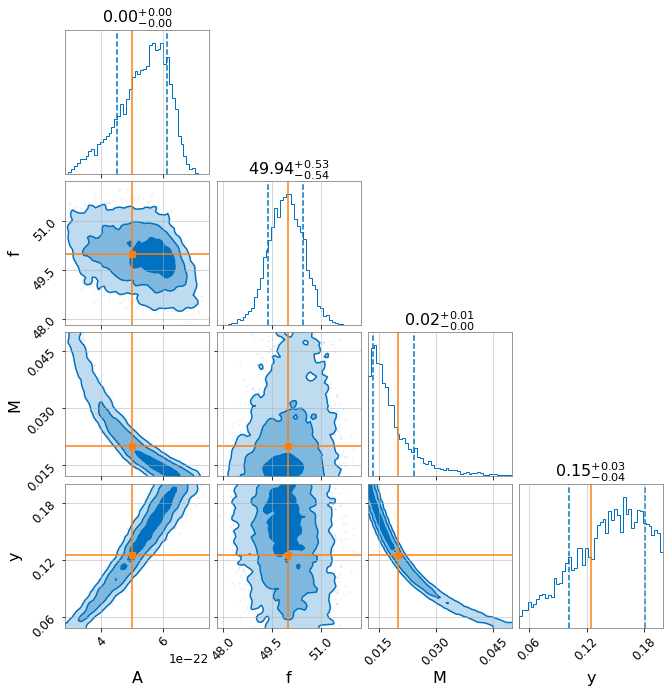

In [ ]:
#define priors
prior = injection_parameters.copy()
prior['A'] = bilby.core.prior.LogUniform(minimum=1e-23, maximum=1e-21, name='A')
prior['f0'] = bilby.core.prior.Uniform(40, 60, 'f')
prior['y'] = bilby.core.prior.Uniform(0.01, 0.2, 'y')
prior['M'] = bilby.core.prior.Uniform(0.001, 0.05, 'M')

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

#plot corner plots
result = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    resume=False, sample='unif', injection_parameters=injection_parameters)
result.plot_corner()

09:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.gen_bbh
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/usr/local/lib/python3.6/dist-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
09:28 bilby WARNING : Injecting

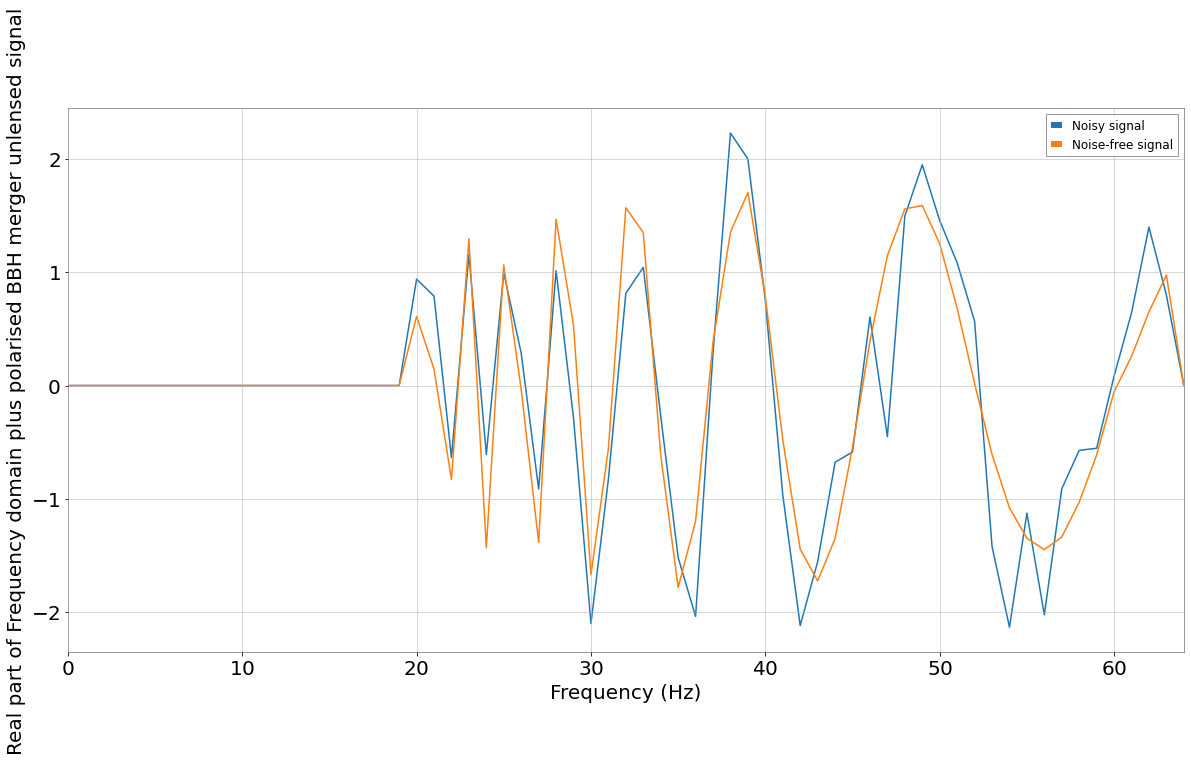

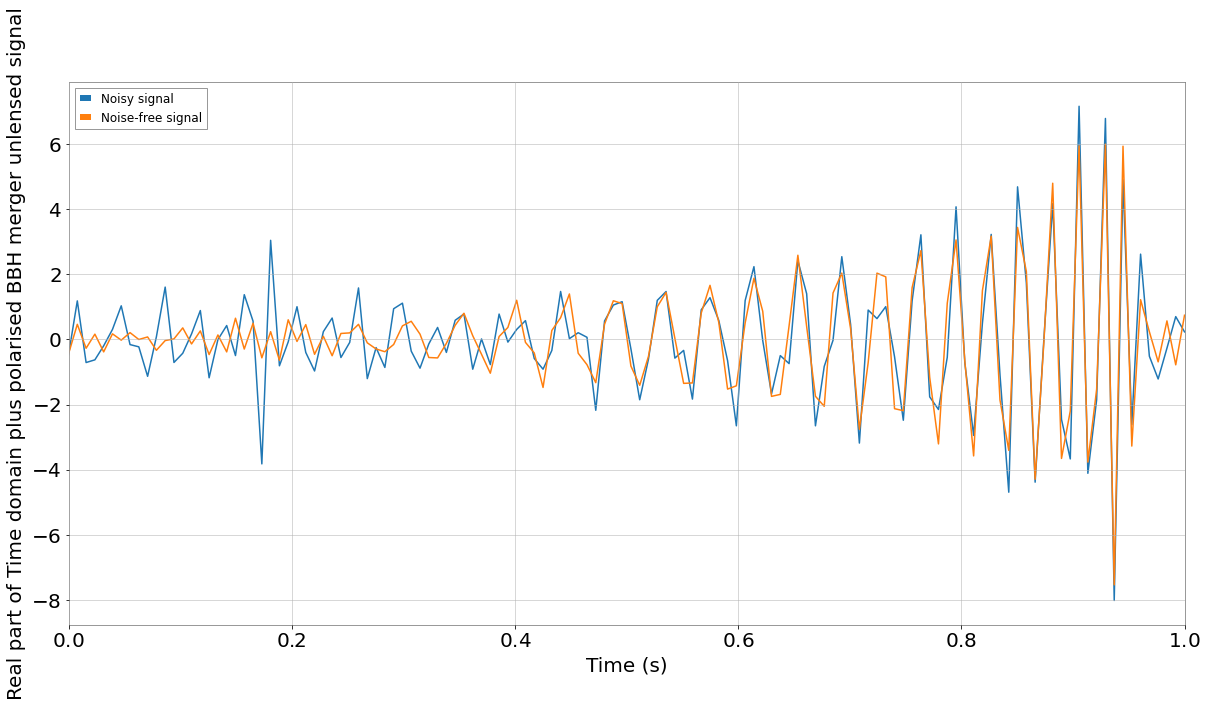

In [ ]:
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
#!/usr/bin/env python
"""
A script to demonstrate plotting corner plots for BBH merger source signal
"""
from __future__ import division, print_function
import bilby
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt
import lal
import lalsimulation

# First set up logging and some output directories and labels
outdir = 'outdir'
label = 'create_your_own_bbh_model'
fs = 128
#sampling_frequency
T_obs = 1
#duration

#PM lens model in wave optics
def F1(w,y):
    xm=0.5*(y+np.sqrt(y*y+4.0))
    phim=0.5*((xm-y)**2)-np.log(xm)
    HYP = [complex(mp.hyp1f1(((1j/2)*z),1.0,((1j/2)*z*y*y))) for z in w]
    F = ((np.exp((np.pi*w)/4)) * (scipy.special.gamma(1-((1j/2)*w))) * HYP * (np.exp(0.5j*w*(np.log(0.5*w)-2.0*phim))))
    return F

#PM lens model in geometric optics
def F2(w,y,M):      
    muplus=abs(0.5 + (y*y + 2) / (2*y * (y*y+4)**0.5))
    muminus=abs(0.5 - (y*y + 2) / (2*y * (y*y+4)**0.5))
    deltatd=4*M
    f=w / (8*np.pi*M)
    F=muplus**0.5 - 1j*muminus**0.5 *(np.exp(2*np.pi*1j*f*deltatd))
    return F

# Here we define out source model - this is the BBH merger model in the
# frequency domain.
def gen_bbh(f, mass_1, mass_2, iota, phi, ra, dec, psi, d, geocent_time,y,M):
    """
    generates a BBH f domain signal
    """
    Lens_mass = M * scipy.constants.G * lal.MSUN_SI / scipy.constants.c**3
    w = 8*np.pi*Lens_mass*f
    N = T_obs * fs      # the total number of time samples
    dt = 1.0 / fs             # the sampling time (sec)
    df = 1.0/T_obs
    f_low = 12.0            # lowest frequency of waveform (Hz)
    f_max = fs/2
    approximant = lalsimulation.IMRPhenomD
    dist = d*1e6*lal.PC_SI  # put it as 1 MPc x d
    Mag=np.zeros(len(w))

    dw=w[1]-w[0]
    index=int(100.0/dw)
    Mag[:index]=F1(w[:index],y)
    Mag[index:]=F2(w[index:],y,Lens_mass)
    Mag[0]=1

    if(mass_1<mass_2):
      print(mass_1,mass_2)
    # make waveform without lensing
    hp, hc = lalsimulation.SimInspiralChooseFDWaveform(mass_1 * lal.MSUN_SI, mass_2 * lal.MSUN_SI, 0, 0, 0, 0, 0, 0, 
                                dist, iota, phi, 0, 0, 0, 
                                df, f_low, f_max, f_low , lal.CreateDict(), approximant)
    return {'plus': hp.data.data, 'cross': hc.data.data}


injection_parameters = dict(mass_1=36.0,mass_2=29.0,iota=0,phi=0,ra=0, dec=0, psi=0,d=1000, geocent_time=0,y=0.1,M=4000)

# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=T_obs, sampling_frequency=fs,
    frequency_domain_source_model=gen_bbh)

# Set up interferometers.
ifos = bilby.gw.detector.InterferometerList(['L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=fs, duration=T_obs,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                    parameters=injection_parameters)

# compute the number of time domain samples
Nt = int(fs*T_obs)

# extract waveform from bilby
freq_signal = waveform_generator.frequency_domain_strain() 

# get frequency domain noise-free signal at detector
signal_fd = ifos[0].get_detector_response(freq_signal, injection_parameters)

# whiten frequency domain noise-free signal (and reshape/flatten)
whitened_signal_fd = signal_fd/ifos[0].amplitude_spectral_density_array

# get frequency domain signal + noise at detector
h_fd = ifos[0].strain_data.frequency_domain_strain

# inverse FFT noise-free signal back to time domain and normalise
whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)

# whiten noisy frequency domain signal
whitened_h_fd = h_fd/ifos[0].amplitude_spectral_density_array

# inverse FFT noisy signal back to time domain and normalise
whitened_h_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_h_fd)

#plot source signal
x=np.arange(0,65)
t=np.linspace(0,1,128)
plt.figure(figsize=(20,10))
plt.plot(x,whitened_h_fd, label='Noisy signal')
plt.plot(x,whitened_signal_fd, label='Noise-free signal')
plt.xlim(0,64)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Real part of Frequency domain plus polarised BBH merger unlensed signal', fontsize=20)
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(t,whitened_h_td,label='Noisy signal')
plt.plot(t,whitened_signal_td,label='Noise-free signal')
plt.xlim(0,1)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Real part of Time domain plus polarised BBH merger unlensed signal', fontsize=20)
plt.legend()
plt.show()

18:38 bilby INFO    : No prior given, using default BBH priors in /usr/local/lib/python3.6/dist-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.
18:38 bilby INFO    : Running for label 'create_your_own_bbh_model', output will be saved to 'outdir'
18:38 bilby INFO    : Using lal version 7.0.0
18:38 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
18:38 bilby INFO    : Using lalsimulation version 2.2.0
18:38 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
18:38 bilby INFO    : Search parameters:
18:38 bilby INFO    :   mass_1 = Uniform(minimum=0, maximum=50, name='mass_1', latex_label='$m_1$', unit=None, boundary=None)
18:38 bilby INFO    :   mass_2 = Uniform(minimum=0, maximum=50, name=

0it [00:00, ?it/s]

18:38 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f39ec87f898>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
18:38 bilby INFO    : Checkpoint every check_point_delta_t = 600s
18:38 bilby INFO    : Using dynesty version 1.0.1
18:38 bilby INFO    : Generating initial points from the pri

361it [00:10, 96.69it/s, bound:0 nc:  3 ncall:2.0e+03 eff:18.3% logz-ratio=-398.34+/-0.12 dlogz:1215.403>0.1]

18:38 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:675: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([0., max(y0) * 1.05])
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:38 bilby WARNING : Axis limits cannot be NaN or Inf
18:38 bilby WARNING : Failed to create dynesty run plot at checkpoint


384it [00:12, 22.32it/s, bound:0 nc:  5 ncall:2.1e+03 eff:18.7% logz-ratio=-372.58+/-0.11 dlogz:1189.141>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2466it [01:27,  4.02it/s, bound:1 nc:  7 ncall:2.5e+04 eff:10.0% logz-ratio=6.26+/-0.11 dlogz:906.685>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2492it [01:31,  2.25it/s, bound:2 nc:  8 ncall:2.5e+04 eff:9.8% logz-ratio=8.16+/-0.11 dlogz:904.714>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2524it [01:35,  4.75it/s, bound:3 nc:  5 ncall:2.6e+04 eff:9.7% logz-ratio=10.56+/-0.11 dlogz:902.279>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2565it [01:38, 11.28it/s, bound:3 nc: 19 ncall:2.7e+04 eff:9.7% logz-ratio=13.87+/-0.11 dlogz:898.944>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2588it [01:43,  2.92it/s, bound:5 nc: 31 ncall:2.7e+04 eff:9.5% logz-ratio=16.63+/-0.11 dlogz:896.254>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2617it [01:47,  4.22it/s, bound:6 nc:  7 ncall:2.8e+04 eff:9.4% logz-ratio=20.28+/-0.11 dlogz:892.498>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2646it [01:51,  4.52it/s, bound:7 nc:  5 ncall:2.8e+04 eff:9.3% logz-ratio=22.88+/-0.11 dlogz:889.866>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2670it [01:55,  4.14it/s, bound:8 nc: 14 ncall:2.9e+04 eff:9.2% logz-ratio=26.20+/-0.12 dlogz:886.595>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2708it [01:59,  4.82it/s, bound:9 nc: 31 ncall:3.0e+04 eff:9.1% logz-ratio=33.08+/-0.12 dlogz:879.732>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2731it [02:03,  4.93it/s, bound:10 nc: 16 ncall:3.0e+04 eff:9.0% logz-ratio=36.75+/-0.12 dlogz:876.000>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2762it [02:06,  7.38it/s, bound:10 nc: 49 ncall:3.1e+04 eff:8.9% logz-ratio=41.75+/-0.12 dlogz:871.070>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2781it [02:12,  3.13it/s, bound:12 nc: 21 ncall:3.2e+04 eff:8.8% logz-ratio=45.55+/-0.12 dlogz:867.154>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2803it [02:16,  3.68it/s, bound:13 nc: 24 ncall:3.2e+04 eff:8.7% logz-ratio=49.50+/-0.12 dlogz:863.157>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2833it [02:19, 12.20it/s, bound:13 nc:  6 ncall:3.3e+04 eff:8.7% logz-ratio=57.73+/-0.12 dlogz:854.993>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2866it [02:23,  5.35it/s, bound:15 nc: 25 ncall:3.3e+04 eff:8.6% logz-ratio=63.57+/-0.12 dlogz:849.182>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2885it [02:28,  3.72it/s, bound:16 nc: 29 ncall:3.4e+04 eff:8.5% logz-ratio=68.07+/-0.12 dlogz:844.534>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2932it [02:31, 14.82it/s, bound:17 nc:  6 ncall:3.5e+04 eff:8.5% logz-ratio=80.34+/-0.12 dlogz:832.228>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


2998it [02:34, 17.32it/s, bound:18 nc: 13 ncall:3.5e+04 eff:8.5% logz-ratio=97.80+/-0.13 dlogz:814.807>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3060it [02:38, 16.91it/s, bound:19 nc:  7 ncall:3.6e+04 eff:8.5% logz-ratio=111.27+/-0.12 dlogz:801.133>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3118it [02:41, 19.16it/s, bound:20 nc:  7 ncall:3.6e+04 eff:8.6% logz-ratio=125.53+/-0.12 dlogz:786.892>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3186it [02:45, 20.21it/s, bound:21 nc:  1 ncall:3.7e+04 eff:8.6% logz-ratio=143.07+/-0.13 dlogz:769.422>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3250it [02:48, 14.10it/s, bound:22 nc: 13 ncall:3.8e+04 eff:8.6% logz-ratio=163.25+/-0.13 dlogz:749.065>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3300it [02:52, 14.16it/s, bound:23 nc: 10 ncall:3.8e+04 eff:8.6% logz-ratio=173.49+/-0.12 dlogz:738.670>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3354it [02:55, 14.21it/s, bound:24 nc:  5 ncall:3.9e+04 eff:8.6% logz-ratio=185.32+/-0.13 dlogz:726.910>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3409it [02:58, 14.84it/s, bound:24 nc: 33 ncall:3.9e+04 eff:8.6% logz-ratio=198.86+/-0.13 dlogz:713.410>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3488it [03:02, 17.77it/s, bound:26 nc:  5 ncall:4.0e+04 eff:8.7% logz-ratio=222.08+/-0.13 dlogz:689.983>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3549it [03:05, 20.44it/s, bound:27 nc:  4 ncall:4.1e+04 eff:8.7% logz-ratio=244.27+/-0.13 dlogz:667.860>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3612it [03:08, 14.75it/s, bound:28 nc:  1 ncall:4.1e+04 eff:8.7% logz-ratio=264.79+/-0.13 dlogz:647.140>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3662it [03:12, 12.39it/s, bound:29 nc: 21 ncall:4.2e+04 eff:8.7% logz-ratio=282.27+/-0.13 dlogz:629.541>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3708it [03:15, 12.08it/s, bound:30 nc:  8 ncall:4.2e+04 eff:8.7% logz-ratio=294.66+/-0.13 dlogz:617.131>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3770it [03:19, 10.35it/s, bound:31 nc: 17 ncall:4.3e+04 eff:8.7% logz-ratio=312.88+/-0.13 dlogz:599.186>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3829it [03:22, 11.10it/s, bound:32 nc: 16 ncall:4.4e+04 eff:8.8% logz-ratio=334.99+/-0.13 dlogz:576.734>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3877it [03:26,  8.08it/s, bound:33 nc:  8 ncall:4.4e+04 eff:8.7% logz-ratio=345.37+/-0.13 dlogz:566.267>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3932it [03:29, 11.18it/s, bound:34 nc: 14 ncall:4.5e+04 eff:8.7% logz-ratio=357.82+/-0.13 dlogz:553.736>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3988it [03:33, 15.96it/s, bound:35 nc:  1 ncall:4.6e+04 eff:8.8% logz-ratio=375.22+/-0.13 dlogz:536.287>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4051it [03:36, 13.20it/s, bound:36 nc: 26 ncall:4.6e+04 eff:8.8% logz-ratio=394.53+/-0.13 dlogz:526.650>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4097it [03:40,  8.84it/s, bound:37 nc:  5 ncall:4.7e+04 eff:8.8% logz-ratio=406.88+/-0.13 dlogz:514.256>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4159it [03:43, 13.24it/s, bound:38 nc:  6 ncall:4.7e+04 eff:8.8% logz-ratio=428.46+/-0.14 dlogz:493.058>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4216it [03:47, 13.19it/s, bound:39 nc: 16 ncall:4.8e+04 eff:8.8% logz-ratio=444.95+/-0.13 dlogz:476.106>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4287it [03:51, 14.48it/s, bound:40 nc:  4 ncall:4.9e+04 eff:8.8% logz-ratio=466.56+/-0.13 dlogz:454.366>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4348it [03:54, 11.21it/s, bound:41 nc: 19 ncall:4.9e+04 eff:8.8% logz-ratio=483.61+/-0.13 dlogz:437.289>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4385it [03:58,  8.07it/s, bound:42 nc:  5 ncall:5.0e+04 eff:8.8% logz-ratio=491.52+/-0.13 dlogz:429.288>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4438it [04:01, 12.26it/s, bound:43 nc:  5 ncall:5.0e+04 eff:8.8% logz-ratio=502.49+/-0.13 dlogz:418.230>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4481it [04:05,  7.47it/s, bound:44 nc:  2 ncall:5.1e+04 eff:8.8% logz-ratio=513.32+/-0.13 dlogz:407.430>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4515it [04:09,  7.99it/s, bound:45 nc:  5 ncall:5.2e+04 eff:8.7% logz-ratio=519.95+/-0.13 dlogz:400.694>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4544it [04:13,  5.34it/s, bound:46 nc:  2 ncall:5.2e+04 eff:8.7% logz-ratio=526.13+/-0.13 dlogz:394.506>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4594it [04:17,  6.46it/s, bound:47 nc: 13 ncall:5.3e+04 eff:8.7% logz-ratio=535.76+/-0.13 dlogz:384.829>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4639it [04:21,  3.71it/s, bound:48 nc: 27 ncall:5.3e+04 eff:8.7% logz-ratio=544.61+/-0.14 dlogz:376.043>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4681it [04:26,  5.45it/s, bound:49 nc: 15 ncall:5.4e+04 eff:8.7% logz-ratio=551.80+/-0.13 dlogz:368.699>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4730it [04:31,  3.93it/s, bound:50 nc:  7 ncall:5.5e+04 eff:8.6% logz-ratio=559.93+/-0.13 dlogz:360.519>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4772it [04:36,  4.59it/s, bound:51 nc: 21 ncall:5.5e+04 eff:8.6% logz-ratio=566.06+/-0.13 dlogz:354.285>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4800it [04:41,  4.46it/s, bound:52 nc: 17 ncall:5.6e+04 eff:8.6% logz-ratio=570.04+/-0.13 dlogz:350.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4825it [04:45,  2.08it/s, bound:53 nc: 23 ncall:5.7e+04 eff:8.5% logz-ratio=573.17+/-0.13 dlogz:347.165>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4864it [04:50,  3.61it/s, bound:54 nc: 11 ncall:5.7e+04 eff:8.5% logz-ratio=579.54+/-0.14 dlogz:340.856>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4894it [04:55,  3.65it/s, bound:55 nc: 23 ncall:5.8e+04 eff:8.5% logz-ratio=584.38+/-0.13 dlogz:335.852>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4918it [04:59,  2.43it/s, bound:56 nc: 24 ncall:5.8e+04 eff:8.4% logz-ratio=587.61+/-0.13 dlogz:332.584>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4949it [05:04,  2.97it/s, bound:57 nc:  4 ncall:5.9e+04 eff:8.4% logz-ratio=590.94+/-0.13 dlogz:329.225>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4978it [05:09,  2.97it/s, bound:58 nc: 22 ncall:6.0e+04 eff:8.3% logz-ratio=594.41+/-0.13 dlogz:325.747>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5003it [05:14,  1.73it/s, bound:59 nc: 15 ncall:6.0e+04 eff:8.3% logz-ratio=598.01+/-0.13 dlogz:322.148>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5026it [05:18,  1.70it/s, bound:60 nc: 22 ncall:6.1e+04 eff:8.3% logz-ratio=601.40+/-0.13 dlogz:318.670>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5053it [05:23,  1.56it/s, bound:61 nc: 44 ncall:6.2e+04 eff:8.2% logz-ratio=604.22+/-0.13 dlogz:315.831>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5083it [05:28,  2.36it/s, bound:62 nc:  8 ncall:6.2e+04 eff:8.2% logz-ratio=608.69+/-0.14 dlogz:311.384>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5112it [05:31,  9.15it/s, bound:62 nc:  9 ncall:6.3e+04 eff:8.2% logz-ratio=612.43+/-0.13 dlogz:307.548>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5142it [05:38,  3.88it/s, bound:64 nc: 14 ncall:6.3e+04 eff:8.1% logz-ratio=615.98+/-0.13 dlogz:303.980>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5181it [05:42, 11.42it/s, bound:64 nc: 22 ncall:6.4e+04 eff:8.1% logz-ratio=620.59+/-0.13 dlogz:299.343>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5206it [05:46,  5.60it/s, bound:65 nc: 57 ncall:6.5e+04 eff:8.1% logz-ratio=622.76+/-0.13 dlogz:297.144>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5228it [05:51,  6.83it/s, bound:66 nc: 41 ncall:6.5e+04 eff:8.0% logz-ratio=625.03+/-0.13 dlogz:294.840>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5235it [05:55,  3.09it/s, bound:67 nc: 56 ncall:6.6e+04 eff:8.0% logz-ratio=625.81+/-0.13 dlogz:294.075>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5257it [06:02,  1.53it/s, bound:69 nc:  3 ncall:6.6e+04 eff:7.9% logz-ratio=627.81+/-0.13 dlogz:292.029>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5285it [06:05,  8.81it/s, bound:69 nc: 53 ncall:6.7e+04 eff:7.9% logz-ratio=630.48+/-0.13 dlogz:289.344>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5296it [06:10,  2.88it/s, bound:70 nc:177 ncall:6.8e+04 eff:7.8% logz-ratio=631.74+/-0.13 dlogz:288.142>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5313it [06:15,  5.48it/s, bound:71 nc: 44 ncall:6.8e+04 eff:7.8% logz-ratio=633.27+/-0.13 dlogz:286.502>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5322it [06:21,  1.60it/s, bound:73 nc: 36 ncall:6.9e+04 eff:7.7% logz-ratio=633.99+/-0.13 dlogz:285.785>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5344it [06:25,  1.45it/s, bound:74 nc: 18 ncall:7.0e+04 eff:7.7% logz-ratio=635.92+/-0.13 dlogz:283.837>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5368it [06:29,  6.02it/s, bound:74 nc: 17 ncall:7.0e+04 eff:7.6% logz-ratio=638.02+/-0.13 dlogz:281.706>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5380it [06:34,  2.72it/s, bound:75 nc:102 ncall:7.1e+04 eff:7.6% logz-ratio=639.00+/-0.13 dlogz:280.706>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5403it [06:39,  6.26it/s, bound:76 nc: 71 ncall:7.1e+04 eff:7.6% logz-ratio=640.67+/-0.13 dlogz:279.003>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5412it [06:45,  1.63it/s, bound:78 nc: 10 ncall:7.2e+04 eff:7.5% logz-ratio=641.44+/-0.13 dlogz:278.267>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5422it [06:49,  1.06it/s, bound:79 nc: 35 ncall:7.3e+04 eff:7.5% logz-ratio=642.35+/-0.13 dlogz:277.324>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5439it [06:54,  1.21it/s, bound:80 nc: 52 ncall:7.3e+04 eff:7.4% logz-ratio=643.83+/-0.13 dlogz:275.852>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5447it [06:59,  1.11it/s, bound:81 nc:  8 ncall:7.4e+04 eff:7.3% logz-ratio=644.76+/-0.14 dlogz:274.938>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5472it [07:04,  2.45it/s, bound:82 nc:  7 ncall:7.5e+04 eff:7.3% logz-ratio=647.80+/-0.14 dlogz:271.860>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5480it [07:09,  1.01it/s, bound:83 nc: 34 ncall:7.5e+04 eff:7.3% logz-ratio=648.83+/-0.14 dlogz:270.835>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5483it [07:11,  1.21it/s, bound:83 nc:252 ncall:7.6e+04 eff:7.2% logz-ratio=649.22+/-0.14 dlogz:270.446>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5491it [07:16,  1.67it/s, bound:84 nc:334 ncall:7.7e+04 eff:7.1% logz-ratio=650.16+/-0.14 dlogz:269.477>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5496it [07:23,  1.26s/it, bound:86 nc: 10 ncall:7.8e+04 eff:7.1% logz-ratio=650.77+/-0.14 dlogz:268.873>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5508it [07:25,  3.45it/s, bound:86 nc: 54 ncall:7.8e+04 eff:7.0% logz-ratio=652.37+/-0.14 dlogz:267.270>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5517it [07:32,  1.01s/it, bound:88 nc: 39 ncall:7.9e+04 eff:7.0% logz-ratio=653.41+/-0.14 dlogz:266.192>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5535it [07:38,  1.19it/s, bound:89 nc: 17 ncall:7.9e+04 eff:7.0% logz-ratio=655.16+/-0.14 dlogz:264.413>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5544it [07:44,  1.11s/it, bound:90 nc: 50 ncall:8.0e+04 eff:6.9% logz-ratio=656.11+/-0.14 dlogz:263.485>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5556it [07:50,  1.12s/it, bound:91 nc:  9 ncall:8.1e+04 eff:6.9% logz-ratio=657.48+/-0.14 dlogz:262.083>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5570it [07:53,  3.35it/s, bound:91 nc:120 ncall:8.2e+04 eff:6.8% logz-ratio=659.03+/-0.14 dlogz:260.516>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5576it [07:58,  1.75it/s, bound:92 nc:110 ncall:8.2e+04 eff:6.8% logz-ratio=659.62+/-0.14 dlogz:259.912>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5583it [08:06,  1.39s/it, bound:94 nc: 37 ncall:8.3e+04 eff:6.7% logz-ratio=660.29+/-0.14 dlogz:259.245>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5592it [08:12,  1.08s/it, bound:95 nc: 24 ncall:8.4e+04 eff:6.7% logz-ratio=661.31+/-0.14 dlogz:258.213>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5596it [08:14,  1.25it/s, bound:95 nc:109 ncall:8.4e+04 eff:6.6% logz-ratio=661.68+/-0.14 dlogz:257.821>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5601it [08:19,  1.15it/s, bound:96 nc: 38 ncall:8.5e+04 eff:6.6% logz-ratio=662.04+/-0.13 dlogz:257.437>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5609it [08:27,  1.11s/it, bound:98 nc:  7 ncall:8.5e+04 eff:6.6% logz-ratio=662.61+/-0.13 dlogz:256.871>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5620it [08:30,  1.91it/s, bound:98 nc:264 ncall:8.6e+04 eff:6.5% logz-ratio=663.36+/-0.13 dlogz:256.094>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5625it [08:35,  1.65it/s, bound:99 nc: 72 ncall:8.7e+04 eff:6.5% logz-ratio=664.02+/-0.14 dlogz:255.504>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5634it [08:43,  1.09s/it, bound:101 nc: 21 ncall:8.7e+04 eff:6.4% logz-ratio=665.07+/-0.14 dlogz:254.401>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5640it [08:46,  1.74it/s, bound:101 nc: 90 ncall:8.8e+04 eff:6.4% logz-ratio=665.65+/-0.14 dlogz:253.820>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5646it [08:54,  1.31s/it, bound:103 nc: 10 ncall:8.9e+04 eff:6.4% logz-ratio=666.12+/-0.14 dlogz:253.320>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5654it [09:00,  1.39s/it, bound:104 nc: 33 ncall:9.0e+04 eff:6.3% logz-ratio=666.75+/-0.13 dlogz:252.698>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5660it [09:03,  1.54it/s, bound:104 nc: 69 ncall:9.0e+04 eff:6.3% logz-ratio=667.24+/-0.13 dlogz:252.200>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5668it [09:09,  1.63it/s, bound:105 nc:203 ncall:9.1e+04 eff:6.2% logz-ratio=667.91+/-0.13 dlogz:251.514>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5675it [09:16,  1.28s/it, bound:107 nc: 23 ncall:9.2e+04 eff:6.2% logz-ratio=668.66+/-0.14 dlogz:250.786>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5686it [09:19,  3.17it/s, bound:107 nc: 73 ncall:9.2e+04 eff:6.2% logz-ratio=669.89+/-0.14 dlogz:249.577>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5694it [09:26,  1.05s/it, bound:109 nc:  1 ncall:9.3e+04 eff:6.1% logz-ratio=670.90+/-0.14 dlogz:248.544>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5700it [09:29,  2.22it/s, bound:109 nc: 62 ncall:9.3e+04 eff:6.1% logz-ratio=671.59+/-0.14 dlogz:247.843>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5703it [09:34,  1.24s/it, bound:110 nc:550 ncall:9.4e+04 eff:6.1% logz-ratio=671.93+/-0.14 dlogz:247.484>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5709it [09:40,  1.10it/s, bound:111 nc:281 ncall:9.5e+04 eff:6.0% logz-ratio=672.58+/-0.14 dlogz:246.826>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5729it [09:48,  1.11it/s, bound:113 nc: 45 ncall:9.6e+04 eff:6.0% logz-ratio=674.20+/-0.14 dlogz:245.152>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5735it [09:53,  1.22s/it, bound:114 nc: 45 ncall:9.6e+04 eff:6.0% logz-ratio=674.75+/-0.14 dlogz:244.647>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5744it [09:59,  1.11s/it, bound:115 nc: 45 ncall:9.7e+04 eff:5.9% logz-ratio=675.76+/-0.14 dlogz:243.611>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5751it [10:04,  1.17s/it, bound:116 nc:  1 ncall:9.8e+04 eff:5.9% logz-ratio=676.43+/-0.14 dlogz:242.919>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5763it [10:10,  1.08s/it, bound:117 nc: 41 ncall:9.8e+04 eff:5.9% logz-ratio=677.69+/-0.14 dlogz:241.648>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5766it [10:11,  1.45it/s, bound:117 nc:201 ncall:9.8e+04 eff:5.9% logz-ratio=677.96+/-0.14 dlogz:241.375>0.1]

18:48 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:48 bilby WARNING : Axis limits cannot be NaN or Inf
18:48 bilby WARNING : Failed to create dynesty run plot at checkpoint


5767it [10:17,  2.09s/it, bound:117 nc: 18 ncall:9.9e+04 eff:5.9% logz-ratio=678.05+/-0.14 dlogz:241.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5771it [10:18,  1.41s/it, bound:117 nc:268 ncall:9.9e+04 eff:5.8% logz-ratio=678.36+/-0.14 dlogz:240.957>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5780it [10:24,  1.94it/s, bound:118 nc:137 ncall:9.9e+04 eff:5.8% logz-ratio=679.19+/-0.14 dlogz:240.134>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5790it [10:32,  1.14s/it, bound:120 nc: 41 ncall:1.0e+05 eff:5.8% logz-ratio=680.08+/-0.14 dlogz:239.241>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5800it [10:37,  1.04s/it, bound:121 nc: 16 ncall:1.0e+05 eff:5.8% logz-ratio=681.05+/-0.14 dlogz:238.248>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5806it [10:40,  1.69it/s, bound:121 nc:197 ncall:1.0e+05 eff:5.7% logz-ratio=681.52+/-0.14 dlogz:237.763>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5814it [10:48,  1.15s/it, bound:123 nc: 23 ncall:1.0e+05 eff:5.7% logz-ratio=682.10+/-0.14 dlogz:237.169>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5824it [10:54,  1.06s/it, bound:124 nc: 11 ncall:1.0e+05 eff:5.7% logz-ratio=682.87+/-0.14 dlogz:236.394>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5836it [10:59,  1.10s/it, bound:125 nc: 37 ncall:1.0e+05 eff:5.6% logz-ratio=683.73+/-0.14 dlogz:235.520>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5841it [11:02,  1.71it/s, bound:125 nc: 82 ncall:1.0e+05 eff:5.6% logz-ratio=684.09+/-0.14 dlogz:235.150>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5847it [11:10,  1.38s/it, bound:127 nc: 31 ncall:1.0e+05 eff:5.6% logz-ratio=684.51+/-0.14 dlogz:234.727>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5853it [11:12,  1.68it/s, bound:127 nc: 72 ncall:1.1e+05 eff:5.6% logz-ratio=685.00+/-0.14 dlogz:234.246>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5858it [11:19,  1.12s/it, bound:128 nc:268 ncall:1.1e+05 eff:5.5% logz-ratio=685.40+/-0.14 dlogz:233.832>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5867it [11:26,  1.12s/it, bound:130 nc:  8 ncall:1.1e+05 eff:5.5% logz-ratio=686.06+/-0.14 dlogz:233.152>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5873it [11:32,  1.25s/it, bound:131 nc: 38 ncall:1.1e+05 eff:5.5% logz-ratio=686.47+/-0.14 dlogz:232.742>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5883it [11:37,  1.04s/it, bound:132 nc: 23 ncall:1.1e+05 eff:5.4% logz-ratio=687.24+/-0.14 dlogz:231.981>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5891it [11:43,  1.16s/it, bound:133 nc: 45 ncall:1.1e+05 eff:5.4% logz-ratio=687.90+/-0.14 dlogz:231.296>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5899it [11:46,  2.04it/s, bound:133 nc:171 ncall:1.1e+05 eff:5.4% logz-ratio=688.48+/-0.14 dlogz:230.704>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5906it [11:55,  1.20s/it, bound:135 nc: 25 ncall:1.1e+05 eff:5.4% logz-ratio=688.93+/-0.14 dlogz:230.231>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5911it [11:58,  1.26it/s, bound:135 nc:171 ncall:1.1e+05 eff:5.3% logz-ratio=689.35+/-0.14 dlogz:229.839>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5917it [12:04,  1.09it/s, bound:136 nc:416 ncall:1.1e+05 eff:5.3% logz-ratio=689.86+/-0.14 dlogz:229.323>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5921it [12:10,  1.21s/it, bound:137 nc:147 ncall:1.1e+05 eff:5.3% logz-ratio=690.15+/-0.14 dlogz:229.006>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5930it [12:18,  1.24it/s, bound:139 nc:  4 ncall:1.1e+05 eff:5.3% logz-ratio=690.77+/-0.14 dlogz:228.378>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5934it [12:24,  1.64s/it, bound:140 nc: 22 ncall:1.1e+05 eff:5.2% logz-ratio=691.06+/-0.14 dlogz:228.087>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5941it [12:27,  1.30it/s, bound:140 nc:222 ncall:1.1e+05 eff:5.2% logz-ratio=691.50+/-0.14 dlogz:227.631>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5948it [12:36,  1.28s/it, bound:142 nc:  2 ncall:1.2e+05 eff:5.2% logz-ratio=691.95+/-0.14 dlogz:227.183>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5955it [12:42,  1.32s/it, bound:143 nc: 13 ncall:1.2e+05 eff:5.1% logz-ratio=692.49+/-0.14 dlogz:226.640>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5958it [12:48,  1.89s/it, bound:144 nc: 18 ncall:1.2e+05 eff:5.1% logz-ratio=692.70+/-0.14 dlogz:226.423>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5965it [12:54,  1.34s/it, bound:145 nc:  2 ncall:1.2e+05 eff:5.1% logz-ratio=693.27+/-0.14 dlogz:225.861>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5973it [13:00,  1.48s/it, bound:146 nc:  9 ncall:1.2e+05 eff:5.1% logz-ratio=693.88+/-0.14 dlogz:225.231>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5994it [13:08,  1.01s/it, bound:147 nc: 21 ncall:1.2e+05 eff:5.0% logz-ratio=695.51+/-0.14 dlogz:223.591>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6002it [13:12,  1.74it/s, bound:147 nc:112 ncall:1.2e+05 eff:5.0% logz-ratio=696.19+/-0.14 dlogz:222.912>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6023it [13:19,  3.11it/s, bound:148 nc: 78 ncall:1.2e+05 eff:5.0% logz-ratio=697.89+/-0.14 dlogz:221.168>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6040it [13:26,  4.15it/s, bound:149 nc: 45 ncall:1.2e+05 eff:5.0% logz-ratio=699.10+/-0.14 dlogz:219.934>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6061it [13:32,  4.67it/s, bound:150 nc: 35 ncall:1.2e+05 eff:5.0% logz-ratio=700.61+/-0.14 dlogz:218.411>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6078it [13:39,  3.05it/s, bound:151 nc: 54 ncall:1.2e+05 eff:5.0% logz-ratio=701.74+/-0.14 dlogz:217.255>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6090it [13:48,  1.26s/it, bound:153 nc: 18 ncall:1.2e+05 eff:5.0% logz-ratio=702.61+/-0.14 dlogz:216.405>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6106it [13:56,  1.20s/it, bound:154 nc: 18 ncall:1.2e+05 eff:5.0% logz-ratio=703.77+/-0.14 dlogz:215.205>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6120it [14:03,  1.15s/it, bound:155 nc: 17 ncall:1.2e+05 eff:4.9% logz-ratio=704.88+/-0.14 dlogz:214.091>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6125it [14:07,  1.09s/it, bound:155 nc:296 ncall:1.2e+05 eff:4.9% logz-ratio=705.26+/-0.14 dlogz:213.700>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6138it [14:16,  1.04s/it, bound:157 nc: 59 ncall:1.3e+05 eff:4.9% logz-ratio=705.99+/-0.14 dlogz:212.939>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6141it [14:19,  1.03s/it, bound:157 nc:465 ncall:1.3e+05 eff:4.9% logz-ratio=706.13+/-0.14 dlogz:212.791>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6143it [14:24,  1.59s/it, bound:158 nc:401 ncall:1.3e+05 eff:4.8% logz-ratio=706.23+/-0.14 dlogz:212.690>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6153it [14:31,  1.09s/it, bound:160 nc: 10 ncall:1.3e+05 eff:4.8% logz-ratio=706.76+/-0.14 dlogz:212.152>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6163it [14:34,  2.35it/s, bound:160 nc:265 ncall:1.3e+05 eff:4.8% logz-ratio=707.33+/-0.14 dlogz:211.577>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6169it [14:38,  1.39it/s, bound:161 nc:315 ncall:1.3e+05 eff:4.8% logz-ratio=707.65+/-0.14 dlogz:211.244>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6182it [14:46,  1.04s/it, bound:163 nc: 41 ncall:1.3e+05 eff:4.8% logz-ratio=708.45+/-0.14 dlogz:210.453>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6190it [14:49,  3.01it/s, bound:163 nc: 74 ncall:1.3e+05 eff:4.8% logz-ratio=709.08+/-0.14 dlogz:209.835>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6199it [14:54,  2.10it/s, bound:164 nc:124 ncall:1.3e+05 eff:4.7% logz-ratio=710.02+/-0.14 dlogz:208.882>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6203it [14:59,  1.01it/s, bound:165 nc:366 ncall:1.3e+05 eff:4.7% logz-ratio=710.47+/-0.14 dlogz:208.451>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6211it [15:05,  1.76it/s, bound:166 nc:220 ncall:1.3e+05 eff:4.7% logz-ratio=711.49+/-0.14 dlogz:207.435>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6222it [15:12,  1.33it/s, bound:168 nc: 33 ncall:1.3e+05 eff:4.7% logz-ratio=712.41+/-0.14 dlogz:206.447>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6240it [15:18,  1.27it/s, bound:169 nc: 22 ncall:1.3e+05 eff:4.7% logz-ratio=713.72+/-0.14 dlogz:205.144>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6257it [15:21,  3.04it/s, bound:169 nc:122 ncall:1.3e+05 eff:4.7% logz-ratio=715.07+/-0.14 dlogz:203.757>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6268it [15:27,  3.00it/s, bound:170 nc: 53 ncall:1.3e+05 eff:4.7% logz-ratio=715.96+/-0.14 dlogz:202.868>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6272it [15:32,  1.40it/s, bound:171 nc:112 ncall:1.4e+05 eff:4.6% logz-ratio=716.41+/-0.14 dlogz:202.438>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6284it [15:38,  2.67it/s, bound:172 nc: 91 ncall:1.4e+05 eff:4.6% logz-ratio=717.67+/-0.14 dlogz:201.151>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6299it [15:46,  1.05s/it, bound:174 nc: 21 ncall:1.4e+05 eff:4.6% logz-ratio=719.09+/-0.14 dlogz:199.710>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6318it [15:52,  1.11it/s, bound:175 nc: 22 ncall:1.4e+05 eff:4.6% logz-ratio=720.64+/-0.14 dlogz:198.137>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6331it [15:55,  3.45it/s, bound:175 nc: 81 ncall:1.4e+05 eff:4.6% logz-ratio=721.60+/-0.14 dlogz:197.139>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6341it [16:01,  3.37it/s, bound:176 nc: 39 ncall:1.4e+05 eff:4.6% logz-ratio=722.22+/-0.14 dlogz:196.524>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6355it [16:07,  3.90it/s, bound:177 nc: 63 ncall:1.4e+05 eff:4.6% logz-ratio=723.47+/-0.14 dlogz:195.307>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6366it [16:13,  2.11it/s, bound:178 nc:185 ncall:1.4e+05 eff:4.5% logz-ratio=724.63+/-0.14 dlogz:194.116>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6381it [16:19,  2.49it/s, bound:179 nc:124 ncall:1.4e+05 eff:4.5% logz-ratio=726.06+/-0.14 dlogz:192.655>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6390it [16:25,  2.09it/s, bound:180 nc:126 ncall:1.4e+05 eff:4.5% logz-ratio=726.78+/-0.14 dlogz:191.927>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6396it [16:30,  1.54it/s, bound:181 nc:181 ncall:1.4e+05 eff:4.5% logz-ratio=727.24+/-0.14 dlogz:191.455>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6409it [16:38,  1.07it/s, bound:183 nc:  5 ncall:1.4e+05 eff:4.5% logz-ratio=728.51+/-0.14 dlogz:190.189>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6424it [16:43,  1.19it/s, bound:184 nc: 10 ncall:1.4e+05 eff:4.5% logz-ratio=729.86+/-0.14 dlogz:188.818>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6444it [16:49,  1.16it/s, bound:185 nc:  8 ncall:1.4e+05 eff:4.5% logz-ratio=731.67+/-0.14 dlogz:186.996>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6453it [16:52,  2.63it/s, bound:185 nc:133 ncall:1.4e+05 eff:4.5% logz-ratio=732.33+/-0.14 dlogz:186.301>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6471it [16:58,  5.42it/s, bound:186 nc: 43 ncall:1.5e+05 eff:4.5% logz-ratio=733.80+/-0.14 dlogz:184.830>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6489it [17:03,  4.10it/s, bound:187 nc: 91 ncall:1.5e+05 eff:4.5% logz-ratio=735.46+/-0.14 dlogz:183.135>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6493it [17:08,  1.29it/s, bound:188 nc:227 ncall:1.5e+05 eff:4.4% logz-ratio=735.74+/-0.14 dlogz:182.847>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6511it [17:16,  1.53it/s, bound:190 nc: 28 ncall:1.5e+05 eff:4.4% logz-ratio=736.99+/-0.14 dlogz:181.578>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6521it [17:21,  1.00it/s, bound:191 nc:  1 ncall:1.5e+05 eff:4.4% logz-ratio=737.92+/-0.14 dlogz:180.654>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6540it [17:24,  6.15it/s, bound:191 nc: 19 ncall:1.5e+05 eff:4.4% logz-ratio=739.29+/-0.14 dlogz:179.253>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6546it [17:31,  1.17it/s, bound:193 nc: 24 ncall:1.5e+05 eff:4.4% logz-ratio=739.71+/-0.14 dlogz:178.838>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6557it [17:34,  2.49it/s, bound:193 nc: 80 ncall:1.5e+05 eff:4.4% logz-ratio=740.60+/-0.14 dlogz:177.951>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6562it [17:38,  1.61it/s, bound:194 nc:171 ncall:1.5e+05 eff:4.4% logz-ratio=741.04+/-0.14 dlogz:177.494>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6565it [17:45,  1.52s/it, bound:196 nc: 31 ncall:1.5e+05 eff:4.3% logz-ratio=741.32+/-0.14 dlogz:177.236>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6575it [17:50,  1.06it/s, bound:197 nc:  6 ncall:1.5e+05 eff:4.3% logz-ratio=742.17+/-0.14 dlogz:176.343>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6593it [17:56,  1.13it/s, bound:198 nc: 14 ncall:1.5e+05 eff:4.3% logz-ratio=743.51+/-0.14 dlogz:175.007>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6605it [17:59,  3.19it/s, bound:198 nc: 37 ncall:1.5e+05 eff:4.3% logz-ratio=744.63+/-0.14 dlogz:173.852>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6631it [18:07,  1.33it/s, bound:200 nc: 10 ncall:1.5e+05 eff:4.3% logz-ratio=746.57+/-0.14 dlogz:171.875>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6652it [18:13,  1.10it/s, bound:201 nc: 35 ncall:1.5e+05 eff:4.3% logz-ratio=747.76+/-0.14 dlogz:170.662>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6667it [18:17,  3.57it/s, bound:201 nc: 97 ncall:1.5e+05 eff:4.3% logz-ratio=748.62+/-0.14 dlogz:169.777>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6679it [18:24,  1.49it/s, bound:203 nc: 33 ncall:1.6e+05 eff:4.3% logz-ratio=749.62+/-0.14 dlogz:168.805>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6688it [18:30,  1.09it/s, bound:204 nc:645 ncall:1.6e+05 eff:4.3% logz-ratio=750.32+/-0.14 dlogz:168.076>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6695it [18:33,  1.77it/s, bound:204 nc:156 ncall:1.6e+05 eff:4.3% logz-ratio=750.76+/-0.14 dlogz:167.617>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6699it [18:38,  1.13s/it, bound:205 nc:384 ncall:1.6e+05 eff:4.2% logz-ratio=751.01+/-0.14 dlogz:167.371>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6704it [18:44,  1.52s/it, bound:207 nc: 51 ncall:1.6e+05 eff:4.2% logz-ratio=751.37+/-0.14 dlogz:167.008>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6712it [18:47,  1.84it/s, bound:207 nc:113 ncall:1.6e+05 eff:4.2% logz-ratio=752.20+/-0.14 dlogz:166.218>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6721it [18:52,  2.84it/s, bound:208 nc: 55 ncall:1.6e+05 eff:4.2% logz-ratio=753.06+/-0.14 dlogz:165.319>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6725it [18:57,  1.12it/s, bound:209 nc:329 ncall:1.6e+05 eff:4.2% logz-ratio=753.38+/-0.14 dlogz:164.984>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6729it [19:04,  1.68s/it, bound:211 nc: 15 ncall:1.6e+05 eff:4.2% logz-ratio=753.70+/-0.14 dlogz:164.676>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6744it [19:07,  2.79it/s, bound:211 nc:176 ncall:1.6e+05 eff:4.2% logz-ratio=754.97+/-0.14 dlogz:163.399>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6762it [19:16,  1.07it/s, bound:213 nc: 23 ncall:1.6e+05 eff:4.2% logz-ratio=756.36+/-0.14 dlogz:161.965>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6779it [19:22,  1.00it/s, bound:214 nc: 10 ncall:1.6e+05 eff:4.2% logz-ratio=757.81+/-0.14 dlogz:160.497>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6789it [19:26,  2.33it/s, bound:214 nc: 21 ncall:1.6e+05 eff:4.1% logz-ratio=758.60+/-0.14 dlogz:159.715>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6813it [19:35,  1.09it/s, bound:216 nc: 15 ncall:1.6e+05 eff:4.1% logz-ratio=760.67+/-0.14 dlogz:157.624>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6828it [19:41,  1.06it/s, bound:217 nc: 30 ncall:1.7e+05 eff:4.1% logz-ratio=762.06+/-0.14 dlogz:156.199>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6842it [19:45,  2.89it/s, bound:217 nc: 40 ncall:1.7e+05 eff:4.1% logz-ratio=763.16+/-0.14 dlogz:155.088>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6859it [19:54,  1.00s/it, bound:219 nc: 16 ncall:1.7e+05 eff:4.1% logz-ratio=764.30+/-0.14 dlogz:153.914>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6871it [19:58,  2.93it/s, bound:219 nc: 20 ncall:1.7e+05 eff:4.1% logz-ratio=765.01+/-0.14 dlogz:153.183>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6897it [20:05,  4.60it/s, bound:220 nc: 40 ncall:1.7e+05 eff:4.1% logz-ratio=766.66+/-0.14 dlogz:151.515>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6922it [20:11,  3.42it/s, bound:221 nc: 68 ncall:1.7e+05 eff:4.1% logz-ratio=768.82+/-0.14 dlogz:149.367>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6935it [20:20,  1.03it/s, bound:223 nc: 27 ncall:1.7e+05 eff:4.1% logz-ratio=769.78+/-0.14 dlogz:148.370>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6950it [20:24,  3.10it/s, bound:223 nc: 35 ncall:1.7e+05 eff:4.1% logz-ratio=770.93+/-0.14 dlogz:147.214>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6951it [20:27,  1.09s/it, bound:224 nc:106 ncall:1.7e+05 eff:4.1% logz-ratio=771.01+/-0.14 dlogz:147.131>0.1]

18:58 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
18:59 bilby WARNING : Axis limits cannot be NaN or Inf
18:59 bilby WARNING : Failed to create dynesty run plot at checkpoint


6952it [20:33,  2.76s/it, bound:224 nc: 25 ncall:1.7e+05 eff:4.1% logz-ratio=771.09+/-0.14 dlogz:147.050>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6971it [20:40,  1.11s/it, bound:225 nc: 23 ncall:1.7e+05 eff:4.1% logz-ratio=772.28+/-0.14 dlogz:145.818>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6992it [20:45,  3.38it/s, bound:225 nc: 40 ncall:1.7e+05 eff:4.1% logz-ratio=773.71+/-0.14 dlogz:144.386>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7000it [20:52,  1.75it/s, bound:226 nc:100 ncall:1.7e+05 eff:4.1% logz-ratio=774.30+/-0.14 dlogz:143.785>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7015it [21:00,  1.12it/s, bound:228 nc: 29 ncall:1.7e+05 eff:4.1% logz-ratio=775.32+/-0.14 dlogz:142.742>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7036it [21:06,  1.35it/s, bound:229 nc:  8 ncall:1.7e+05 eff:4.1% logz-ratio=776.81+/-0.14 dlogz:141.262>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7052it [21:12,  1.20it/s, bound:230 nc: 33 ncall:1.7e+05 eff:4.1% logz-ratio=778.07+/-0.14 dlogz:139.957>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7065it [21:18,  1.52it/s, bound:231 nc: 15 ncall:1.7e+05 eff:4.1% logz-ratio=779.22+/-0.14 dlogz:138.808>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7078it [21:24,  1.03it/s, bound:232 nc:  6 ncall:1.7e+05 eff:4.0% logz-ratio=780.29+/-0.14 dlogz:137.746>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7097it [21:29,  2.10it/s, bound:232 nc:172 ncall:1.8e+05 eff:4.0% logz-ratio=782.07+/-0.15 dlogz:135.924>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7111it [21:35,  1.85it/s, bound:233 nc:172 ncall:1.8e+05 eff:4.0% logz-ratio=783.18+/-0.15 dlogz:134.812>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7124it [21:43,  1.15it/s, bound:235 nc: 23 ncall:1.8e+05 eff:4.0% logz-ratio=784.18+/-0.14 dlogz:133.772>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7137it [21:47,  3.18it/s, bound:235 nc: 69 ncall:1.8e+05 eff:4.0% logz-ratio=785.01+/-0.14 dlogz:132.932>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7150it [21:53,  3.09it/s, bound:236 nc: 94 ncall:1.8e+05 eff:4.0% logz-ratio=785.79+/-0.14 dlogz:132.141>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7166it [22:01,  1.36it/s, bound:238 nc:  3 ncall:1.8e+05 eff:4.0% logz-ratio=787.06+/-0.14 dlogz:130.856>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7191it [22:06,  3.60it/s, bound:238 nc: 75 ncall:1.8e+05 eff:4.0% logz-ratio=788.73+/-0.14 dlogz:129.146>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7200it [22:13,  1.04it/s, bound:240 nc: 12 ncall:1.8e+05 eff:4.0% logz-ratio=789.30+/-0.14 dlogz:128.571>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7210it [22:17,  1.70it/s, bound:240 nc:212 ncall:1.8e+05 eff:4.0% logz-ratio=789.93+/-0.14 dlogz:127.934>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7227it [22:23,  2.98it/s, bound:241 nc: 74 ncall:1.8e+05 eff:4.0% logz-ratio=790.94+/-0.14 dlogz:126.903>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7237it [22:29,  1.87it/s, bound:242 nc:123 ncall:1.8e+05 eff:4.0% logz-ratio=791.52+/-0.14 dlogz:126.312>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7248it [22:34,  2.85it/s, bound:243 nc: 22 ncall:1.8e+05 eff:4.0% logz-ratio=792.18+/-0.14 dlogz:125.644>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7264it [22:42,  1.81it/s, bound:245 nc: 14 ncall:1.8e+05 eff:4.0% logz-ratio=793.14+/-0.14 dlogz:124.672>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7296it [22:48,  1.55it/s, bound:246 nc: 22 ncall:1.8e+05 eff:4.0% logz-ratio=795.68+/-0.15 dlogz:122.112>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7304it [22:54,  1.10s/it, bound:247 nc:  4 ncall:1.8e+05 eff:4.0% logz-ratio=796.31+/-0.15 dlogz:121.465>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7313it [22:59,  1.72it/s, bound:247 nc: 90 ncall:1.9e+05 eff:3.9% logz-ratio=796.89+/-0.15 dlogz:120.863>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7354it [23:07,  1.65it/s, bound:249 nc: 16 ncall:1.9e+05 eff:4.0% logz-ratio=799.56+/-0.15 dlogz:118.165>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7389it [23:13,  1.57it/s, bound:250 nc: 21 ncall:1.9e+05 eff:4.0% logz-ratio=801.58+/-0.14 dlogz:116.102>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7400it [23:18,  1.26it/s, bound:251 nc: 11 ncall:1.9e+05 eff:4.0% logz-ratio=802.26+/-0.14 dlogz:115.409>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7431it [23:24,  1.43it/s, bound:252 nc:  2 ncall:1.9e+05 eff:4.0% logz-ratio=804.39+/-0.15 dlogz:113.244>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7449it [23:29,  3.46it/s, bound:252 nc: 43 ncall:1.9e+05 eff:4.0% logz-ratio=805.30+/-0.14 dlogz:112.599>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7461it [23:34,  2.75it/s, bound:253 nc: 47 ncall:1.9e+05 eff:4.0% logz-ratio=806.01+/-0.14 dlogz:111.864>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7467it [23:42,  1.10s/it, bound:255 nc: 14 ncall:1.9e+05 eff:3.9% logz-ratio=806.37+/-0.14 dlogz:111.503>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7475it [23:48,  1.01it/s, bound:256 nc: 29 ncall:1.9e+05 eff:3.9% logz-ratio=806.79+/-0.14 dlogz:111.060>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7489it [23:54,  1.22it/s, bound:257 nc: 15 ncall:1.9e+05 eff:3.9% logz-ratio=807.54+/-0.14 dlogz:110.304>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7500it [23:58,  1.67it/s, bound:257 nc:183 ncall:1.9e+05 eff:3.9% logz-ratio=808.19+/-0.15 dlogz:109.646>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7515it [24:06,  1.18it/s, bound:259 nc: 17 ncall:1.9e+05 eff:3.9% logz-ratio=808.99+/-0.14 dlogz:108.830>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7524it [24:11,  1.22it/s, bound:260 nc: 12 ncall:1.9e+05 eff:3.9% logz-ratio=809.51+/-0.15 dlogz:108.303>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7528it [24:15,  1.14s/it, bound:260 nc:290 ncall:1.9e+05 eff:3.9% logz-ratio=809.74+/-0.15 dlogz:108.067>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7538it [24:23,  1.05it/s, bound:262 nc: 10 ncall:1.9e+05 eff:3.9% logz-ratio=810.31+/-0.15 dlogz:107.493>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7553it [24:27,  3.10it/s, bound:262 nc: 56 ncall:2.0e+05 eff:3.9% logz-ratio=811.26+/-0.15 dlogz:106.539>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7560it [24:32,  1.62it/s, bound:263 nc: 57 ncall:2.0e+05 eff:3.9% logz-ratio=811.69+/-0.15 dlogz:106.087>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7575it [24:37,  4.34it/s, bound:264 nc:  8 ncall:2.0e+05 eff:3.9% logz-ratio=812.46+/-0.15 dlogz:105.290>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7586it [24:44,  1.22it/s, bound:266 nc: 16 ncall:2.0e+05 eff:3.8% logz-ratio=812.96+/-0.14 dlogz:104.780>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7590it [24:49,  1.22s/it, bound:266 nc:389 ncall:2.0e+05 eff:3.8% logz-ratio=813.14+/-0.14 dlogz:104.596>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7598it [24:54,  1.11it/s, bound:267 nc:201 ncall:2.0e+05 eff:3.8% logz-ratio=813.48+/-0.14 dlogz:104.248>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7608it [25:01,  1.03it/s, bound:269 nc: 10 ncall:2.0e+05 eff:3.8% logz-ratio=813.94+/-0.14 dlogz:103.779>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7619it [25:06,  1.74it/s, bound:269 nc:167 ncall:2.0e+05 eff:3.8% logz-ratio=814.57+/-0.15 dlogz:103.149>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7629it [25:13,  1.10it/s, bound:271 nc: 27 ncall:2.0e+05 eff:3.8% logz-ratio=815.13+/-0.15 dlogz:102.568>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7654it [25:18,  5.36it/s, bound:271 nc: 44 ncall:2.0e+05 eff:3.8% logz-ratio=816.26+/-0.14 dlogz:101.410>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7669it [25:23,  4.64it/s, bound:272 nc: 36 ncall:2.0e+05 eff:3.8% logz-ratio=816.97+/-0.14 dlogz:100.688>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7686it [25:28,  5.12it/s, bound:273 nc: 17 ncall:2.0e+05 eff:3.8% logz-ratio=818.25+/-0.15 dlogz:99.424>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7699it [25:35,  1.36it/s, bound:275 nc: 31 ncall:2.0e+05 eff:3.8% logz-ratio=819.43+/-0.15 dlogz:98.226>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7722it [25:39,  6.11it/s, bound:275 nc: 35 ncall:2.0e+05 eff:3.8% logz-ratio=820.74+/-0.15 dlogz:96.867>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7738it [25:44,  3.20it/s, bound:276 nc: 55 ncall:2.0e+05 eff:3.8% logz-ratio=821.48+/-0.15 dlogz:96.108>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7765it [25:52,  1.36it/s, bound:278 nc:  4 ncall:2.1e+05 eff:3.8% logz-ratio=822.86+/-0.15 dlogz:94.710>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7790it [25:59,  1.55it/s, bound:279 nc: 10 ncall:2.1e+05 eff:3.8% logz-ratio=824.00+/-0.15 dlogz:93.525>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7826it [26:05,  2.80it/s, bound:280 nc:  6 ncall:2.1e+05 eff:3.8% logz-ratio=825.77+/-0.15 dlogz:91.739>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7858it [26:12,  1.48it/s, bound:281 nc: 11 ncall:2.1e+05 eff:3.8% logz-ratio=827.60+/-0.15 dlogz:89.877>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7875it [26:18,  1.44it/s, bound:282 nc: 28 ncall:2.1e+05 eff:3.8% logz-ratio=828.68+/-0.15 dlogz:88.782>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7889it [26:23,  1.45it/s, bound:283 nc:  9 ncall:2.1e+05 eff:3.8% logz-ratio=829.41+/-0.15 dlogz:88.032>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7905it [26:29,  1.33it/s, bound:284 nc: 17 ncall:2.1e+05 eff:3.8% logz-ratio=830.17+/-0.15 dlogz:87.247>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7937it [26:34,  1.80it/s, bound:285 nc:  2 ncall:2.1e+05 eff:3.8% logz-ratio=831.65+/-0.15 dlogz:85.734>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7958it [26:39,  4.05it/s, bound:285 nc: 13 ncall:2.1e+05 eff:3.8% logz-ratio=832.53+/-0.15 dlogz:84.830>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7974it [26:45,  1.41it/s, bound:287 nc: 25 ncall:2.1e+05 eff:3.8% logz-ratio=833.40+/-0.15 dlogz:83.961>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7984it [26:50,  1.24it/s, bound:288 nc: 11 ncall:2.1e+05 eff:3.8% logz-ratio=833.85+/-0.15 dlogz:83.486>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8022it [26:55,  6.46it/s, bound:288 nc: 13 ncall:2.1e+05 eff:3.8% logz-ratio=835.44+/-0.15 dlogz:81.869>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8035it [27:00,  2.15it/s, bound:289 nc:153 ncall:2.1e+05 eff:3.8% logz-ratio=836.07+/-0.15 dlogz:81.222>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8050it [27:05,  3.96it/s, bound:290 nc: 59 ncall:2.1e+05 eff:3.8% logz-ratio=836.72+/-0.15 dlogz:80.558>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8057it [27:09,  1.88it/s, bound:291 nc:139 ncall:2.1e+05 eff:3.8% logz-ratio=837.05+/-0.15 dlogz:80.218>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8066it [27:16,  1.36it/s, bound:293 nc:  2 ncall:2.1e+05 eff:3.8% logz-ratio=837.46+/-0.15 dlogz:79.799>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8079it [27:20,  1.49it/s, bound:294 nc:  1 ncall:2.2e+05 eff:3.8% logz-ratio=837.97+/-0.15 dlogz:79.267>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8090it [27:25,  1.35it/s, bound:295 nc:  3 ncall:2.2e+05 eff:3.7% logz-ratio=838.35+/-0.15 dlogz:78.873>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8106it [27:30,  1.71it/s, bound:296 nc:  2 ncall:2.2e+05 eff:3.7% logz-ratio=838.99+/-0.15 dlogz:78.234>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8118it [27:36,  1.46it/s, bound:297 nc: 22 ncall:2.2e+05 eff:3.7% logz-ratio=839.57+/-0.15 dlogz:77.633>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8129it [27:40,  1.38it/s, bound:298 nc:  9 ncall:2.2e+05 eff:3.7% logz-ratio=840.05+/-0.15 dlogz:77.144>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8145it [27:46,  1.55it/s, bound:299 nc:  8 ncall:2.2e+05 eff:3.7% logz-ratio=840.71+/-0.15 dlogz:76.465>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8151it [27:51,  1.08it/s, bound:300 nc: 16 ncall:2.2e+05 eff:3.7% logz-ratio=840.96+/-0.15 dlogz:76.211>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8171it [27:55,  3.22it/s, bound:301 nc: 20 ncall:2.2e+05 eff:3.7% logz-ratio=841.80+/-0.15 dlogz:75.346>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8186it [27:59,  4.33it/s, bound:301 nc: 36 ncall:2.2e+05 eff:3.7% logz-ratio=842.46+/-0.15 dlogz:74.678>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8200it [28:05,  2.17it/s, bound:303 nc: 29 ncall:2.2e+05 eff:3.7% logz-ratio=843.09+/-0.15 dlogz:74.043>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8214it [28:09,  1.64it/s, bound:304 nc: 18 ncall:2.2e+05 eff:3.7% logz-ratio=843.85+/-0.15 dlogz:73.271>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8218it [28:12,  1.29it/s, bound:304 nc:194 ncall:2.2e+05 eff:3.7% logz-ratio=844.03+/-0.15 dlogz:73.076>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8228it [28:18,  1.47it/s, bound:306 nc:  1 ncall:2.2e+05 eff:3.7% logz-ratio=844.44+/-0.15 dlogz:72.649>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8238it [28:23,  1.93it/s, bound:307 nc: 17 ncall:2.2e+05 eff:3.7% logz-ratio=844.85+/-0.15 dlogz:72.235>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8257it [28:26,  2.52it/s, bound:307 nc:157 ncall:2.2e+05 eff:3.7% logz-ratio=845.71+/-0.15 dlogz:71.359>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8269it [28:30,  3.20it/s, bound:308 nc:118 ncall:2.2e+05 eff:3.7% logz-ratio=846.19+/-0.15 dlogz:70.859>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8278it [28:35,  3.53it/s, bound:309 nc: 31 ncall:2.3e+05 eff:3.7% logz-ratio=846.52+/-0.15 dlogz:70.513>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8294it [28:39,  4.59it/s, bound:310 nc:103 ncall:2.3e+05 eff:3.7% logz-ratio=847.04+/-0.15 dlogz:69.982>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8305it [28:44,  2.50it/s, bound:312 nc:  5 ncall:2.3e+05 eff:3.7% logz-ratio=847.37+/-0.15 dlogz:69.638>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8321it [28:49,  2.16it/s, bound:313 nc: 10 ncall:2.3e+05 eff:3.7% logz-ratio=847.85+/-0.15 dlogz:69.135>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8332it [28:53,  1.49it/s, bound:314 nc:  1 ncall:2.3e+05 eff:3.6% logz-ratio=848.23+/-0.15 dlogz:68.753>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8338it [28:58,  1.25it/s, bound:315 nc: 23 ncall:2.3e+05 eff:3.6% logz-ratio=848.47+/-0.15 dlogz:68.516>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8357it [29:02,  2.00it/s, bound:316 nc: 31 ncall:2.3e+05 eff:3.6% logz-ratio=849.26+/-0.15 dlogz:67.703>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8374it [29:06,  2.35it/s, bound:317 nc: 19 ncall:2.3e+05 eff:3.6% logz-ratio=850.01+/-0.15 dlogz:66.936>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8400it [29:10,  2.46it/s, bound:318 nc: 36 ncall:2.3e+05 eff:3.6% logz-ratio=851.05+/-0.15 dlogz:65.875>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8418it [29:15,  2.83it/s, bound:319 nc: 12 ncall:2.3e+05 eff:3.6% logz-ratio=851.87+/-0.15 dlogz:65.034>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8438it [29:19,  4.11it/s, bound:319 nc:161 ncall:2.3e+05 eff:3.6% logz-ratio=852.66+/-0.15 dlogz:64.229>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8455it [29:24,  2.27it/s, bound:321 nc: 37 ncall:2.3e+05 eff:3.6% logz-ratio=853.33+/-0.15 dlogz:63.534>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8465it [29:28,  1.68it/s, bound:322 nc: 25 ncall:2.3e+05 eff:3.6% logz-ratio=853.72+/-0.15 dlogz:63.129>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8485it [29:32,  4.59it/s, bound:323 nc: 18 ncall:2.3e+05 eff:3.6% logz-ratio=854.42+/-0.15 dlogz:62.408>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8512it [29:35,  8.62it/s, bound:323 nc: 11 ncall:2.3e+05 eff:3.6% logz-ratio=855.34+/-0.15 dlogz:61.465>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8533it [29:40,  2.66it/s, bound:325 nc: 26 ncall:2.4e+05 eff:3.6% logz-ratio=856.01+/-0.15 dlogz:60.780>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8547it [29:44,  3.76it/s, bound:326 nc: 21 ncall:2.4e+05 eff:3.6% logz-ratio=856.55+/-0.15 dlogz:60.221>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8587it [29:48, 13.49it/s, bound:326 nc:  4 ncall:2.4e+05 eff:3.6% logz-ratio=858.12+/-0.15 dlogz:58.614>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8608it [29:52,  5.40it/s, bound:328 nc:  4 ncall:2.4e+05 eff:3.6% logz-ratio=858.96+/-0.15 dlogz:57.748>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8635it [29:56,  5.26it/s, bound:329 nc:  6 ncall:2.4e+05 eff:3.6% logz-ratio=859.90+/-0.15 dlogz:56.777>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8669it [30:01,  3.76it/s, bound:330 nc: 34 ncall:2.4e+05 eff:3.6% logz-ratio=860.86+/-0.15 dlogz:55.773>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8691it [30:05,  4.84it/s, bound:331 nc: 13 ncall:2.4e+05 eff:3.6% logz-ratio=861.47+/-0.15 dlogz:55.147>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8737it [30:09, 13.83it/s, bound:331 nc:  5 ncall:2.4e+05 eff:3.6% logz-ratio=862.79+/-0.15 dlogz:53.788>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8774it [30:13,  8.00it/s, bound:332 nc: 42 ncall:2.4e+05 eff:3.6% logz-ratio=863.89+/-0.15 dlogz:52.643>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8798it [30:19,  2.21it/s, bound:334 nc: 24 ncall:2.4e+05 eff:3.6% logz-ratio=864.60+/-0.15 dlogz:51.912>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8826it [30:22,  8.12it/s, bound:334 nc: 18 ncall:2.4e+05 eff:3.7% logz-ratio=865.39+/-0.15 dlogz:51.094>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8854it [30:27,  4.62it/s, bound:336 nc: 11 ncall:2.4e+05 eff:3.7% logz-ratio=866.15+/-0.15 dlogz:50.301>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8903it [30:32,  6.44it/s, bound:337 nc:  7 ncall:2.4e+05 eff:3.7% logz-ratio=867.97+/-0.15 dlogz:48.440>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8944it [30:36,  7.16it/s, bound:338 nc:  7 ncall:2.4e+05 eff:3.7% logz-ratio=869.27+/-0.15 dlogz:47.101>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8953it [30:37,  6.43it/s, bound:338 nc: 52 ncall:2.4e+05 eff:3.7% logz-ratio=869.57+/-0.15 dlogz:46.786>0.1]

19:09 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
19:09 bilby WARNING : Axis limits cannot be NaN or Inf
19:09 bilby WARNING : Failed to create dynesty run plot at checkpoint


8955it [30:45,  1.19s/it, bound:338 nc: 11 ncall:2.4e+05 eff:3.7% logz-ratio=869.64+/-0.15 dlogz:46.718>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8978it [30:48,  3.33it/s, bound:339 nc: 13 ncall:2.4e+05 eff:3.7% logz-ratio=870.38+/-0.15 dlogz:45.958>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9022it [30:52,  5.91it/s, bound:339 nc: 35 ncall:2.4e+05 eff:3.7% logz-ratio=871.69+/-0.15 dlogz:44.600>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9052it [30:57,  6.51it/s, bound:341 nc: 17 ncall:2.5e+05 eff:3.7% logz-ratio=872.57+/-0.15 dlogz:43.688>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9098it [31:01,  5.90it/s, bound:342 nc: 11 ncall:2.5e+05 eff:3.7% logz-ratio=873.84+/-0.15 dlogz:42.370>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9155it [31:05,  9.63it/s, bound:342 nc: 37 ncall:2.5e+05 eff:3.7% logz-ratio=875.33+/-0.15 dlogz:40.824>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9214it [31:09, 14.84it/s, bound:343 nc: 18 ncall:2.5e+05 eff:3.7% logz-ratio=876.88+/-0.15 dlogz:39.242>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9231it [31:14,  2.47it/s, bound:345 nc: 14 ncall:2.5e+05 eff:3.7% logz-ratio=877.35+/-0.15 dlogz:38.756>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9287it [31:19,  6.03it/s, bound:346 nc: 14 ncall:2.5e+05 eff:3.7% logz-ratio=878.70+/-0.15 dlogz:37.336>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9300it [31:24,  2.33it/s, bound:347 nc: 19 ncall:2.5e+05 eff:3.7% logz-ratio=879.01+/-0.15 dlogz:37.019>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9349it [31:29,  4.01it/s, bound:348 nc: 24 ncall:2.5e+05 eff:3.7% logz-ratio=880.19+/-0.15 dlogz:35.791>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9358it [31:32,  2.27it/s, bound:348 nc: 68 ncall:2.5e+05 eff:3.7% logz-ratio=880.41+/-0.15 dlogz:35.565>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9383it [31:38,  3.23it/s, bound:350 nc: 27 ncall:2.5e+05 eff:3.7% logz-ratio=880.92+/-0.15 dlogz:35.018>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9405it [31:43,  3.06it/s, bound:351 nc: 28 ncall:2.5e+05 eff:3.7% logz-ratio=881.37+/-0.15 dlogz:34.553>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9426it [31:48,  3.31it/s, bound:352 nc: 20 ncall:2.5e+05 eff:3.7% logz-ratio=881.81+/-0.15 dlogz:34.091>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9438it [31:52,  1.99it/s, bound:352 nc:102 ncall:2.5e+05 eff:3.7% logz-ratio=882.06+/-0.15 dlogz:33.828>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9446it [31:56,  1.58it/s, bound:354 nc:  3 ncall:2.5e+05 eff:3.7% logz-ratio=882.24+/-0.15 dlogz:33.643>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9505it [32:01,  8.83it/s, bound:355 nc:  2 ncall:2.5e+05 eff:3.7% logz-ratio=883.49+/-0.15 dlogz:32.330>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9571it [32:06,  7.44it/s, bound:356 nc:  4 ncall:2.5e+05 eff:3.8% logz-ratio=884.86+/-0.15 dlogz:30.896>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9610it [32:10,  5.95it/s, bound:357 nc:  2 ncall:2.6e+05 eff:3.8% logz-ratio=885.72+/-0.15 dlogz:29.997>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9650it [32:14, 10.30it/s, bound:357 nc:  7 ncall:2.6e+05 eff:3.8% logz-ratio=886.46+/-0.15 dlogz:29.212>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9664it [32:19,  2.47it/s, bound:359 nc: 11 ncall:2.6e+05 eff:3.8% logz-ratio=886.71+/-0.15 dlogz:28.951>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9696it [32:23,  5.74it/s, bound:359 nc: 52 ncall:2.6e+05 eff:3.8% logz-ratio=887.28+/-0.15 dlogz:28.345>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9711it [32:28,  3.50it/s, bound:361 nc: 24 ncall:2.6e+05 eff:3.8% logz-ratio=887.54+/-0.15 dlogz:28.074>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9732it [32:33,  3.19it/s, bound:362 nc: 19 ncall:2.6e+05 eff:3.8% logz-ratio=887.92+/-0.15 dlogz:27.672>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9743it [32:36,  3.08it/s, bound:362 nc: 25 ncall:2.6e+05 eff:3.8% logz-ratio=888.13+/-0.15 dlogz:27.451>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9766it [32:41,  3.77it/s, bound:364 nc: 14 ncall:2.6e+05 eff:3.8% logz-ratio=888.55+/-0.15 dlogz:27.004>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9798it [32:46,  4.90it/s, bound:365 nc: 18 ncall:2.6e+05 eff:3.8% logz-ratio=889.06+/-0.15 dlogz:26.461>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9847it [32:50, 15.94it/s, bound:365 nc: 13 ncall:2.6e+05 eff:3.8% logz-ratio=889.78+/-0.15 dlogz:25.745>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9863it [32:55,  2.56it/s, bound:366 nc:217 ncall:2.6e+05 eff:3.8% logz-ratio=890.06+/-0.15 dlogz:25.453>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real 

9868it [33:03,  1.16s/it, bound:369 nc: 33 ncall:2.6e+05 eff:3.8% logz-ratio=890.15+/-0.15 dlogz:25.357>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9882it [33:07,  2.07it/s, bound:370 nc:  2 ncall:2.6e+05 eff:3.7% logz-ratio=890.41+/-0.15 dlogz:25.085>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9911it [33:11, 10.65it/s, bound:370 nc: 22 ncall:2.6e+05 eff:3.7% logz-ratio=890.87+/-0.15 dlogz:24.590>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9915it [33:15,  1.59it/s, bound:372 nc:  4 ncall:2.7e+05 eff:3.7% logz-ratio=890.94+/-0.15 dlogz:24.524>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9939it [33:20,  2.99it/s, bound:373 nc: 22 ncall:2.7e+05 eff:3.7% logz-ratio=891.31+/-0.15 dlogz:24.128>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9991it [33:25,  6.70it/s, bound:374 nc: 15 ncall:2.7e+05 eff:3.8% logz-ratio=892.16+/-0.15 dlogz:23.316>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10105it [33:30, 14.27it/s, bound:375 nc:  2 ncall:2.7e+05 eff:3.8% logz-ratio=894.13+/-0.15 dlogz:21.233>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10236it [33:35, 18.32it/s, bound:376 nc:  8 ncall:2.7e+05 eff:3.8% logz-ratio=896.25+/-0.15 dlogz:18.981>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10387it [33:39, 17.42it/s, bound:377 nc:  5 ncall:2.7e+05 eff:3.9% logz-ratio=898.10+/-0.15 dlogz:16.970>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10456it [33:44, 12.55it/s, bound:378 nc: 11 ncall:2.7e+05 eff:3.9% logz-ratio=898.79+/-0.15 dlogz:16.217>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10585it [33:49, 14.54it/s, bound:379 nc:  8 ncall:2.7e+05 eff:3.9% logz-ratio=900.01+/-0.15 dlogz:14.859>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10657it [33:54, 10.31it/s, bound:380 nc:  3 ncall:2.7e+05 eff:3.9% logz-ratio=900.63+/-0.15 dlogz:14.169>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10774it [33:58, 13.63it/s, bound:381 nc: 10 ncall:2.7e+05 eff:4.0% logz-ratio=901.62+/-0.15 dlogz:13.068>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10897it [34:03, 14.16it/s, bound:382 nc: 15 ncall:2.7e+05 eff:4.0% logz-ratio=902.52+/-0.15 dlogz:12.040>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11009it [34:08, 10.64it/s, bound:383 nc:  7 ncall:2.7e+05 eff:4.1% logz-ratio=903.35+/-0.15 dlogz:11.122>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11122it [34:13, 18.26it/s, bound:384 nc:  3 ncall:2.7e+05 eff:4.1% logz-ratio=904.15+/-0.15 dlogz:10.203>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11227it [34:17, 11.10it/s, bound:385 nc:  1 ncall:2.7e+05 eff:4.1% logz-ratio=904.83+/-0.15 dlogz:9.426>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11339it [34:22, 16.95it/s, bound:386 nc:  6 ncall:2.7e+05 eff:4.1% logz-ratio=905.49+/-0.16 dlogz:8.653>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11459it [34:27, 15.13it/s, bound:387 nc:  2 ncall:2.7e+05 eff:4.2% logz-ratio=906.11+/-0.16 dlogz:7.914>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11563it [34:31, 11.82it/s, bound:388 nc:  5 ncall:2.7e+05 eff:4.2% logz-ratio=906.60+/-0.16 dlogz:7.312>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11658it [34:36, 11.12it/s, bound:389 nc:  8 ncall:2.8e+05 eff:4.2% logz-ratio=907.00+/-0.16 dlogz:6.820>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11723it [34:41,  8.98it/s, bound:390 nc: 20 ncall:2.8e+05 eff:4.2% logz-ratio=907.26+/-0.16 dlogz:6.496>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11819it [34:45, 12.07it/s, bound:391 nc:  7 ncall:2.8e+05 eff:4.3% logz-ratio=907.63+/-0.16 dlogz:6.036>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


11910it [34:50, 12.64it/s, bound:392 nc:  8 ncall:2.8e+05 eff:4.3% logz-ratio=907.94+/-0.16 dlogz:5.634>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12008it [34:55, 10.93it/s, bound:393 nc:  6 ncall:2.8e+05 eff:4.3% logz-ratio=908.25+/-0.16 dlogz:5.225>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12132it [34:59, 12.96it/s, bound:394 nc:  7 ncall:2.8e+05 eff:4.4% logz-ratio=908.61+/-0.16 dlogz:4.748>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12196it [35:04,  8.91it/s, bound:395 nc: 14 ncall:2.8e+05 eff:4.4% logz-ratio=908.78+/-0.16 dlogz:4.514>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12270it [35:09,  5.82it/s, bound:396 nc:  8 ncall:2.8e+05 eff:4.4% logz-ratio=908.97+/-0.16 dlogz:4.250>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12324it [35:13,  7.67it/s, bound:397 nc:  4 ncall:2.8e+05 eff:4.4% logz-ratio=909.11+/-0.16 dlogz:4.066>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12420it [35:18,  9.67it/s, bound:398 nc:  9 ncall:2.8e+05 eff:4.4% logz-ratio=909.32+/-0.16 dlogz:3.761>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12477it [35:23,  8.38it/s, bound:399 nc:  2 ncall:2.8e+05 eff:4.4% logz-ratio=909.44+/-0.16 dlogz:3.589>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12558it [35:28, 10.32it/s, bound:400 nc:  4 ncall:2.8e+05 eff:4.5% logz-ratio=909.60+/-0.16 dlogz:3.354>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12685it [35:32, 18.08it/s, bound:401 nc:  2 ncall:2.8e+05 eff:4.5% logz-ratio=909.84+/-0.16 dlogz:3.006>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12812it [35:37, 12.84it/s, bound:402 nc:  9 ncall:2.8e+05 eff:4.5% logz-ratio=910.05+/-0.16 dlogz:2.690>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


12916it [35:42, 10.56it/s, bound:403 nc:  6 ncall:2.8e+05 eff:4.5% logz-ratio=910.20+/-0.16 dlogz:2.450>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13035it [35:47, 19.44it/s, bound:404 nc:  5 ncall:2.8e+05 eff:4.6% logz-ratio=910.37+/-0.16 dlogz:2.196>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13151it [35:52, 12.28it/s, bound:405 nc: 18 ncall:2.9e+05 eff:4.6% logz-ratio=910.51+/-0.16 dlogz:1.968>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13235it [35:56, 10.88it/s, bound:406 nc:  7 ncall:2.9e+05 eff:4.6% logz-ratio=910.61+/-0.16 dlogz:1.814>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13324it [36:01, 14.44it/s, bound:407 nc:  3 ncall:2.9e+05 eff:4.7% logz-ratio=910.70+/-0.16 dlogz:1.667>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13474it [36:06, 13.54it/s, bound:408 nc: 10 ncall:2.9e+05 eff:4.7% logz-ratio=910.85+/-0.16 dlogz:1.432>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13601it [36:10, 31.86it/s, bound:408 nc:  1 ncall:2.9e+05 eff:4.7% logz-ratio=910.97+/-0.16 dlogz:1.254>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13638it [36:14,  3.35it/s, bound:410 nc: 28 ncall:2.9e+05 eff:4.7% logz-ratio=911.00+/-0.16 dlogz:1.206>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13687it [36:19,  9.78it/s, bound:411 nc:  6 ncall:2.9e+05 eff:4.7% logz-ratio=911.04+/-0.16 dlogz:1.146>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13796it [36:23, 25.18it/s, bound:411 nc: 18 ncall:2.9e+05 eff:4.8% logz-ratio=911.12+/-0.16 dlogz:1.020>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13931it [36:28, 11.92it/s, bound:413 nc: 10 ncall:2.9e+05 eff:4.8% logz-ratio=911.21+/-0.16 dlogz:0.881>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


13998it [36:33,  9.32it/s, bound:414 nc: 14 ncall:2.9e+05 eff:4.8% logz-ratio=911.25+/-0.16 dlogz:0.819>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14110it [36:37, 16.39it/s, bound:415 nc: 11 ncall:2.9e+05 eff:4.8% logz-ratio=911.31+/-0.16 dlogz:0.725>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14225it [36:42, 10.86it/s, bound:416 nc:  7 ncall:2.9e+05 eff:4.9% logz-ratio=911.37+/-0.16 dlogz:0.639>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14325it [36:48,  9.33it/s, bound:417 nc: 10 ncall:2.9e+05 eff:4.9% logz-ratio=911.42+/-0.16 dlogz:0.573>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14414it [36:52,  9.52it/s, bound:418 nc:  9 ncall:2.9e+05 eff:4.9% logz-ratio=911.45+/-0.16 dlogz:0.521>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14489it [36:57, 12.47it/s, bound:419 nc:  6 ncall:2.9e+05 eff:4.9% logz-ratio=911.48+/-0.16 dlogz:0.480>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14584it [37:02, 11.31it/s, bound:420 nc:  2 ncall:2.9e+05 eff:5.0% logz-ratio=911.52+/-0.16 dlogz:0.433>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14690it [37:07, 13.38it/s, bound:421 nc:  7 ncall:2.9e+05 eff:5.0% logz-ratio=911.55+/-0.16 dlogz:0.388>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14811it [37:12, 11.04it/s, bound:422 nc: 12 ncall:3.0e+05 eff:5.0% logz-ratio=911.59+/-0.16 dlogz:0.340>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14902it [37:16, 13.57it/s, bound:423 nc:  5 ncall:3.0e+05 eff:5.0% logz-ratio=911.61+/-0.16 dlogz:0.308>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


14990it [37:21,  7.98it/s, bound:424 nc: 13 ncall:3.0e+05 eff:5.1% logz-ratio=911.63+/-0.16 dlogz:0.280>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15061it [37:26, 10.28it/s, bound:425 nc:  1 ncall:3.0e+05 eff:5.1% logz-ratio=911.65+/-0.16 dlogz:0.260>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15138it [37:31, 10.31it/s, bound:426 nc: 10 ncall:3.0e+05 eff:5.1% logz-ratio=911.67+/-0.16 dlogz:0.239>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15235it [37:36, 12.53it/s, bound:427 nc:  2 ncall:3.0e+05 eff:5.1% logz-ratio=911.68+/-0.16 dlogz:0.216>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15319it [37:40,  8.51it/s, bound:428 nc: 10 ncall:3.0e+05 eff:5.1% logz-ratio=911.70+/-0.16 dlogz:0.197>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15407it [37:45,  9.72it/s, bound:429 nc: 17 ncall:3.0e+05 eff:5.1% logz-ratio=911.71+/-0.16 dlogz:0.180>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15506it [37:50, 14.19it/s, bound:430 nc:  5 ncall:3.0e+05 eff:5.2% logz-ratio=911.73+/-0.16 dlogz:0.162>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15585it [37:54,  9.56it/s, bound:431 nc:  9 ncall:3.0e+05 eff:5.2% logz-ratio=911.74+/-0.16 dlogz:0.149>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15683it [37:59, 12.22it/s, bound:432 nc:  7 ncall:3.0e+05 eff:5.2% logz-ratio=911.75+/-0.16 dlogz:0.135>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15784it [38:04, 12.11it/s, bound:433 nc:  4 ncall:3.0e+05 eff:5.2% logz-ratio=911.76+/-0.16 dlogz:0.121>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15874it [38:09,  8.99it/s, bound:434 nc:  5 ncall:3.0e+05 eff:5.2% logz-ratio=911.77+/-0.16 dlogz:0.110>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


15967it [38:12, 24.76it/s, bound:434 nc:  3 ncall:3.0e+05 eff:5.3% logz-ratio=911.78+/-0.16 dlogz:0.100>0.1]

19:16 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
19:16 bilby INFO    : Writing 2893 current samples to outdir/create_your_own_bbh_model_samples.dat
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/usr/local/lib/python3.6/dist-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
19:16 bilby WARNING : Axis limits cannot be NaN or Inf
19:16 bilby WARNING : Failed to create dynesty run plot at checkpoint


15967it [38:23,  6.93it/s, bound:434 nc:  1 ncall:3.0e+05 eff:5.6% logz-ratio=911.87+/-0.16 dlogz:0.000>0.1]



19:16 bilby INFO    : Sampling time: 0:38:04.741120
19:16 bilby INFO    : Summary of results:
nsamples: 16967
ln_noise_evidence: -965.014
ln_evidence: -53.141 +/-  0.158
ln_bayes_factor: 911.873 +/-  0.158



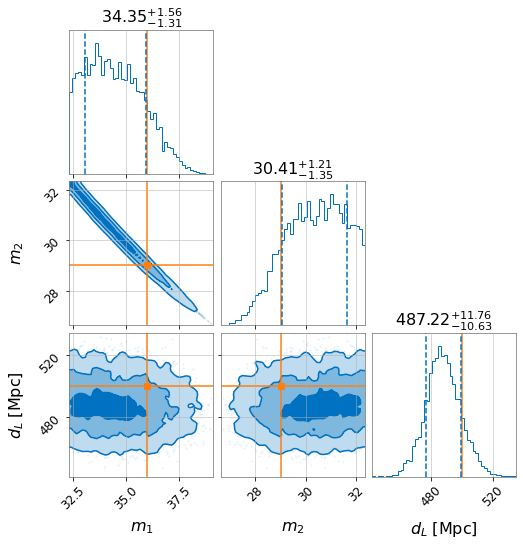

In [ ]:
#define priors
prior = bilby.gw.prior.BBHPriorDict()
for key in ['iota', 'phi', 'psi', 'ra', 'dec', 'geocent_time','M', 'y']:
    prior[key] = injection_parameters[key]

# prior.pop('mass_1')
# prior.pop('mass_2')
prior['theta_jn']=0
prior['phase']=0
prior['luminosity_distance']=0
prior['a_1']=0
prior['a_2']=0
prior['tilt_1']=0
prior['tilt_2']=0
prior['phi_12']=0
prior['phi_jl']=0

prior['chirp_mass'] = bilby.prior.Constraint(
    name='chirp_mass', latex_label='$M$', minimum=0.0, maximum=50.0,
    unit='$M_{\\odot}$')

prior['mass_ratio'] = bilby.prior.Constraint(
    name='mass_ratio', latex_label='$q$', minimum=0.1, maximum=1.0)

prior['mass_1'] = bilby.prior.Uniform(name='mass_1', minimum=0, maximum=50)
prior['mass_2'] = bilby.prior.Uniform(name='mass_2', minimum=0, maximum=50)
prior['d'] = bilby.core.prior.PowerLaw(alpha=2, name='luminosity_distance', minimum=20, maximum=1000, unit='Mpc', latex_label='$d_L$')

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

#plot corner plots
result = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    resume=False, sample='unif', injection_parameters=injection_parameters)
result.plot_corner()

09:28 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.gen_bbh
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
/usr/local/lib/python3.6/dist-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
09:28 bilby WARNING : Injecting

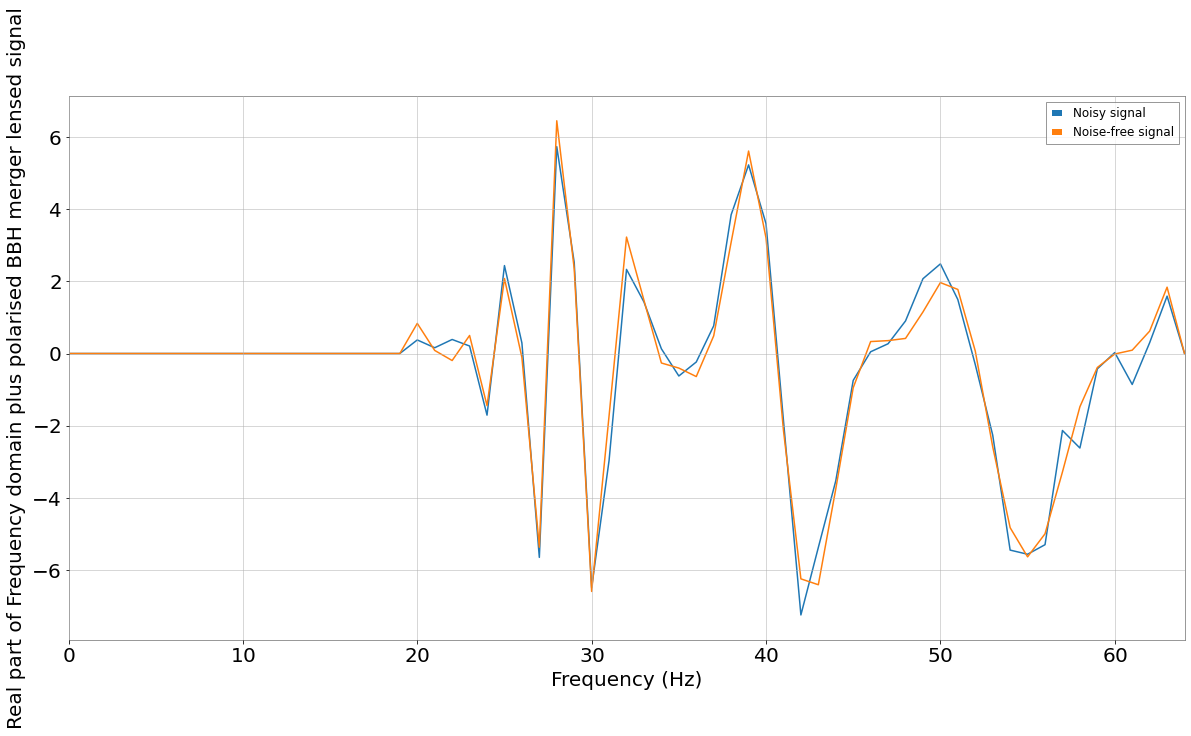

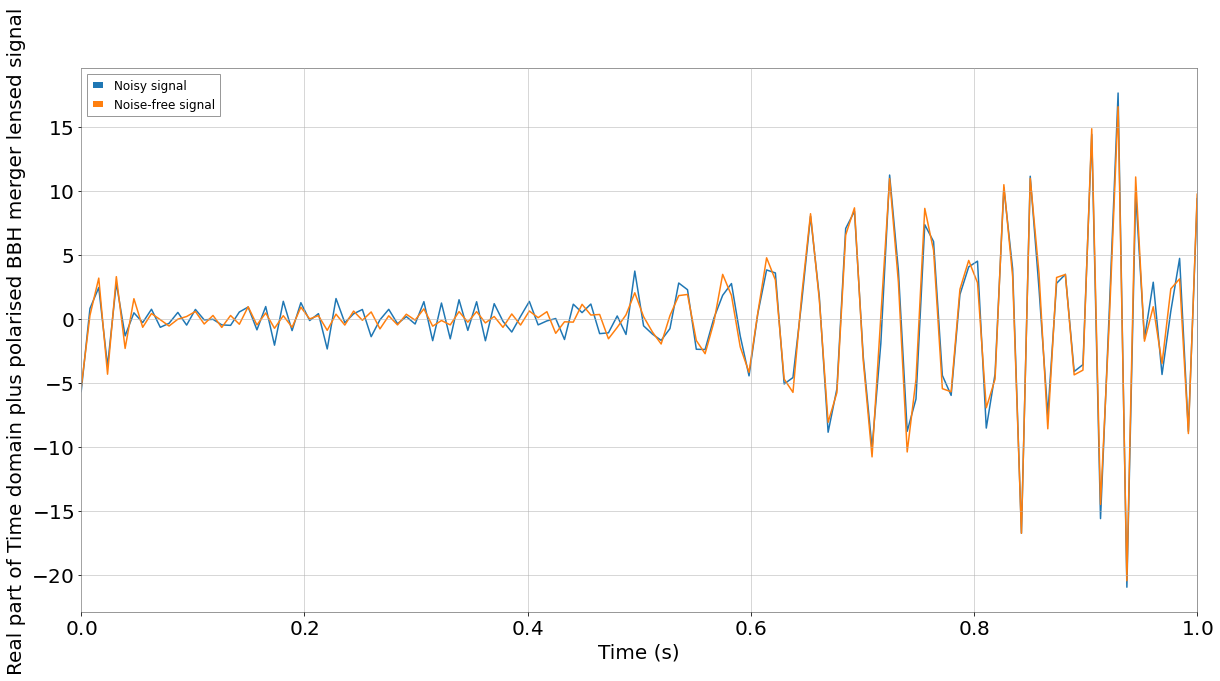

In [ ]:
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
#!/usr/bin/env python
"""
A script to demonstrate how to plot corner plots for lensed BBH merger signal
"""
from __future__ import division, print_function
import bilby
import numpy as np
import scipy
from scipy.special import hyp1f1
import mpmath as mp
import matplotlib.pyplot as plt
import lal
import lalsimulation

# First set up logging and some output directories and labels
outdir = 'outdir'
label = 'create_your_own_bbh_model'
fs = 128
#sampling_frequency
T_obs = 1
#duration

#PM lens model in wave optics limit
def F1(w,y):
    xm=0.5*(y+np.sqrt(y*y+4.0))
    phim=0.5*((xm-y)**2)-np.log(xm)
    HYP = [complex(mp.hyp1f1(((1j/2)*z),1.0,((1j/2)*z*y*y))) for z in w]
    F = ((np.exp((np.pi*w)/4)) * (scipy.special.gamma(1-((1j/2)*w))) * HYP * (np.exp(0.5j*w*(np.log(0.5*w)-2.0*phim))))
    return F

#PM lens model in geometric optics limit
def F2(w,y,M):      
    muplus=abs(0.5 + (y*y + 2) / (2*y * (y*y+4)**0.5))
    muminus=abs(0.5 - (y*y + 2) / (2*y * (y*y+4)**0.5))
    deltatd=4*M
    f=w / (8*np.pi*M)
    F=muplus**0.5 - 1j*muminus**0.5 *(np.exp(2*np.pi*1j*f*deltatd))
    return F

# Here we define out source model - this is the BBH merger model in the
# frequency domain.
def gen_bbh(f, mass_1, mass_2, iota, phi, ra, dec, psi, d, geocent_time,y,M):
    """
    generates a BBH f domain signal
    """
    Lens_mass = M * scipy.constants.G * lal.MSUN_SI / scipy.constants.c**3
    w = 8*np.pi*Lens_mass*f
    N = T_obs * fs      # the total number of time samples
    dt = 1.0 / fs             # the sampling time (sec)
    df = 1.0/T_obs
    f_low = 12.0            # lowest frequency of waveform (Hz)
    f_max = fs/2
    approximant = lalsimulation.IMRPhenomD
    dist = d*1e6*lal.PC_SI  # put it as 1 MPc x d
    Mag=np.zeros(len(w))
    #creating the bins for wave and geometric optics limit based on the value of w
    dw=w[1]-w[0]
    index=int(10.0/dw)
    Mag[:index]=F1(w[:index],y)
    Mag[index:]=F2(w[index:],y,Lens_mass)

    Mag[0]=1

    if(mass_1<mass_2):
      print(mass_1,mass_2)
    # make waveform including lensing
    hp, hc = lalsimulation.SimInspiralChooseFDWaveform(mass_1 * lal.MSUN_SI, mass_2 * lal.MSUN_SI, 0, 0, 0, 0, 0, 0, 
                                dist, iota, phi, 0, 0, 0, 
                                df, f_low, f_max, f_low , lal.CreateDict(), approximant)
    return {'plus': Mag*hp.data.data, 'cross': Mag*hc.data.data}


injection_parameters = dict(mass_1=36.0,mass_2=29.0,iota=0,phi=0,ra=0, dec=0, psi=0,d=1000, geocent_time=0,y=0.1,M=4000)

# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=T_obs, sampling_frequency=fs,
    frequency_domain_source_model=gen_bbh)

# Set up interferometers.
ifos = bilby.gw.detector.InterferometerList(['L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=fs, duration=T_obs,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                    parameters=injection_parameters)

# compute the number of time domain samples
Nt = int(fs*T_obs)

# extract waveform from bilby
freq_signal = waveform_generator.frequency_domain_strain() 

# get frequency domain noise-free signal at detector
signal_fd = ifos[0].get_detector_response(freq_signal, injection_parameters)

# whiten frequency domain noise-free signal (and reshape/flatten)
whitened_signal_fd = signal_fd/ifos[0].amplitude_spectral_density_array

# get frequency domain signal + noise at detector
h_fd = ifos[0].strain_data.frequency_domain_strain

# inverse FFT noise-free signal back to time domain and normalise
whitened_signal_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_signal_fd)

# whiten noisy frequency domain signal
whitened_h_fd = h_fd/ifos[0].amplitude_spectral_density_array

# inverse FFT noisy signal back to time domain and normalise
whitened_h_td = np.sqrt(2.0*Nt)*np.fft.irfft(whitened_h_fd)

#plot the lensed source signal
x=np.arange(0,65)
t=np.linspace(0,T_obs,128)
plt.figure(figsize=(20,10))
plt.plot(x,whitened_h_fd, label='Noisy signal')
plt.plot(x,whitened_signal_fd, label='Noise-free signal')
plt.xlim(0,64)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Real part of Frequency domain plus polarised BBH merger lensed signal', fontsize=20)
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(t,whitened_h_td,label='Noisy signal')
plt.plot(t,whitened_signal_td,label='Noise-free signal')
plt.xlim(0,1)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Real part of Time domain plus polarised BBH merger lensed signal', fontsize=20)
plt.legend()
plt.show()

03:47 bilby INFO    : Running for label 'create_your_own_bbh_model', output will be saved to 'outdir'
03:47 bilby INFO    : Using lal version 7.0.0
03:47 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
03:47 bilby INFO    : Using lalsimulation version 2.2.0
03:47 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
03:47 bilby INFO    : Search parameters:
03:47 bilby INFO    :   d = PowerLaw(alpha=2, minimum=1000, maximum=4000, name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None)
03:47 bilby INFO    :   y = Uniform(minimum=0.4, maximum=0.6, name='y', latex_label='y', unit=None, boundary=None)
03:47 bilby INFO    :   M = Uniform(minimum=80000, maximum=120000, name='M', latex_l

0it [00:00, ?it/s]

03:47 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f6c5d5b60b8>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
03:47 bilby INFO    : Checkpoint every check_point_delta_t = 600s
03:47 bilby INFO    : Using dynesty version 1.0.1
03:47 bilby INFO    : Generating initial points from the pri

3602it [00:36,  5.08it/s, bound:1 nc: 50 ncall:3.6e+04 eff:10.0% logz-ratio=57.30+/-0.08 dlogz:20.446>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3630it [00:40,  4.98it/s, bound:2 nc:112 ncall:3.7e+04 eff:9.9% logz-ratio=57.38+/-0.08 dlogz:20.332>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3675it [00:43,  7.67it/s, bound:3 nc:  6 ncall:3.7e+04 eff:9.8% logz-ratio=57.52+/-0.08 dlogz:20.147>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3705it [00:46,  6.19it/s, bound:4 nc: 20 ncall:3.8e+04 eff:9.7% logz-ratio=57.62+/-0.08 dlogz:20.025>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3727it [00:50,  5.71it/s, bound:5 nc: 20 ncall:3.9e+04 eff:9.6% logz-ratio=57.68+/-0.08 dlogz:19.936>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3757it [00:53,  6.78it/s, bound:6 nc: 93 ncall:3.9e+04 eff:9.6% logz-ratio=57.77+/-0.08 dlogz:19.817>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3784it [00:57,  7.76it/s, bound:7 nc: 39 ncall:4.0e+04 eff:9.5% logz-ratio=57.85+/-0.08 dlogz:19.710>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3810it [01:00,  5.30it/s, bound:8 nc:  6 ncall:4.0e+04 eff:9.4% logz-ratio=57.93+/-0.08 dlogz:19.605>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3850it [01:04,  7.42it/s, bound:9 nc:  8 ncall:4.1e+04 eff:9.4% logz-ratio=58.05+/-0.08 dlogz:19.448>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3867it [01:07,  4.16it/s, bound:10 nc:  4 ncall:4.2e+04 eff:9.3% logz-ratio=58.10+/-0.08 dlogz:19.380>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3900it [01:12,  2.90it/s, bound:11 nc:  6 ncall:4.2e+04 eff:9.2% logz-ratio=58.20+/-0.09 dlogz:19.243>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3923it [01:15,  3.04it/s, bound:12 nc: 27 ncall:4.3e+04 eff:9.1% logz-ratio=58.28+/-0.09 dlogz:19.141>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3941it [01:19,  2.58it/s, bound:13 nc: 61 ncall:4.4e+04 eff:9.0% logz-ratio=58.34+/-0.09 dlogz:19.061>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3956it [01:23,  2.44it/s, bound:14 nc: 48 ncall:4.4e+04 eff:9.0% logz-ratio=58.40+/-0.09 dlogz:18.992>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3969it [01:26,  3.24it/s, bound:15 nc: 13 ncall:4.5e+04 eff:8.9% logz-ratio=58.45+/-0.09 dlogz:18.930>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


3999it [01:30,  5.50it/s, bound:16 nc:  9 ncall:4.5e+04 eff:8.8% logz-ratio=58.56+/-0.09 dlogz:18.787>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4017it [01:33,  3.82it/s, bound:17 nc: 58 ncall:4.6e+04 eff:8.7% logz-ratio=58.63+/-0.09 dlogz:18.698>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4052it [01:37,  6.77it/s, bound:18 nc: 34 ncall:4.7e+04 eff:8.7% logz-ratio=58.77+/-0.09 dlogz:18.522>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4079it [01:41,  4.27it/s, bound:19 nc: 15 ncall:4.7e+04 eff:8.6% logz-ratio=58.89+/-0.09 dlogz:18.381>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4099it [01:44,  2.59it/s, bound:20 nc: 26 ncall:4.8e+04 eff:8.6% logz-ratio=58.98+/-0.09 dlogz:18.270>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4130it [01:49,  3.65it/s, bound:21 nc:  8 ncall:4.9e+04 eff:8.5% logz-ratio=59.13+/-0.09 dlogz:18.088>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4148it [01:53,  2.44it/s, bound:22 nc: 36 ncall:4.9e+04 eff:8.4% logz-ratio=59.22+/-0.09 dlogz:17.980>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4176it [01:59,  2.38it/s, bound:23 nc: 20 ncall:5.0e+04 eff:8.4% logz-ratio=59.36+/-0.09 dlogz:17.812>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4198it [02:03,  2.39it/s, bound:24 nc: 24 ncall:5.0e+04 eff:8.3% logz-ratio=59.47+/-0.09 dlogz:17.678>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4219it [02:07,  3.55it/s, bound:25 nc: 38 ncall:5.1e+04 eff:8.3% logz-ratio=59.58+/-0.09 dlogz:17.546>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4230it [02:11,  1.73it/s, bound:26 nc: 52 ncall:5.2e+04 eff:8.2% logz-ratio=59.64+/-0.09 dlogz:17.477>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4241it [02:16,  1.12s/it, bound:27 nc: 30 ncall:5.2e+04 eff:8.1% logz-ratio=59.70+/-0.09 dlogz:17.408>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4266it [02:20,  2.47it/s, bound:28 nc:  4 ncall:5.3e+04 eff:8.1% logz-ratio=59.83+/-0.09 dlogz:17.247>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4284it [02:25,  1.65it/s, bound:29 nc: 38 ncall:5.4e+04 eff:8.0% logz-ratio=59.93+/-0.10 dlogz:17.133>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4305it [02:29,  2.57it/s, bound:30 nc:  3 ncall:5.4e+04 eff:7.9% logz-ratio=60.05+/-0.10 dlogz:16.998>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4337it [02:34,  3.98it/s, bound:31 nc: 61 ncall:5.5e+04 eff:7.9% logz-ratio=60.22+/-0.10 dlogz:16.789>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4361it [02:37,  4.71it/s, bound:32 nc: 28 ncall:5.5e+04 eff:7.9% logz-ratio=60.36+/-0.10 dlogz:16.628>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4391it [02:41,  6.12it/s, bound:33 nc: 39 ncall:5.6e+04 eff:7.8% logz-ratio=60.53+/-0.10 dlogz:16.510>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4418it [02:44,  5.16it/s, bound:34 nc: 34 ncall:5.7e+04 eff:7.8% logz-ratio=60.69+/-0.10 dlogz:16.324>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4441it [02:48,  6.40it/s, bound:35 nc: 39 ncall:5.7e+04 eff:7.7% logz-ratio=60.83+/-0.10 dlogz:16.164>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4483it [02:51,  7.65it/s, bound:36 nc: 31 ncall:5.8e+04 eff:7.7% logz-ratio=61.07+/-0.10 dlogz:15.878>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4511it [02:55,  6.20it/s, bound:37 nc: 46 ncall:5.9e+04 eff:7.7% logz-ratio=61.24+/-0.10 dlogz:15.684>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4533it [02:58,  5.19it/s, bound:38 nc: 72 ncall:5.9e+04 eff:7.7% logz-ratio=61.37+/-0.10 dlogz:15.530>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4564it [03:01,  6.79it/s, bound:39 nc: 29 ncall:6.0e+04 eff:7.6% logz-ratio=61.56+/-0.10 dlogz:15.309>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4605it [03:05,  8.18it/s, bound:40 nc: 18 ncall:6.0e+04 eff:7.6% logz-ratio=61.81+/-0.10 dlogz:15.060>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4628it [03:08,  4.35it/s, bound:41 nc:  8 ncall:6.1e+04 eff:7.6% logz-ratio=61.96+/-0.10 dlogz:14.893>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4663it [03:13,  3.82it/s, bound:42 nc: 65 ncall:6.2e+04 eff:7.6% logz-ratio=62.17+/-0.10 dlogz:14.642>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4680it [03:16,  2.68it/s, bound:43 nc: 25 ncall:6.2e+04 eff:7.5% logz-ratio=62.27+/-0.10 dlogz:14.523>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4693it [03:20,  2.50it/s, bound:44 nc: 38 ncall:6.3e+04 eff:7.5% logz-ratio=62.35+/-0.10 dlogz:14.435>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4726it [03:24,  3.92it/s, bound:45 nc:130 ncall:6.4e+04 eff:7.4% logz-ratio=62.54+/-0.10 dlogz:14.215>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4747it [03:27,  4.36it/s, bound:46 nc: 20 ncall:6.4e+04 eff:7.4% logz-ratio=62.65+/-0.10 dlogz:14.076>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4775it [03:31,  5.95it/s, bound:47 nc: 19 ncall:6.5e+04 eff:7.4% logz-ratio=62.81+/-0.10 dlogz:13.887>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4806it [03:34,  4.78it/s, bound:48 nc: 30 ncall:6.5e+04 eff:7.3% logz-ratio=62.98+/-0.10 dlogz:13.688>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4842it [03:37,  9.49it/s, bound:49 nc: 20 ncall:6.6e+04 eff:7.3% logz-ratio=63.18+/-0.10 dlogz:13.456>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4874it [03:41,  7.61it/s, bound:50 nc: 73 ncall:6.7e+04 eff:7.3% logz-ratio=63.35+/-0.10 dlogz:13.255>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4896it [03:44,  4.49it/s, bound:51 nc: 10 ncall:6.7e+04 eff:7.3% logz-ratio=63.46+/-0.10 dlogz:13.118>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4916it [03:47,  4.40it/s, bound:52 nc: 30 ncall:6.8e+04 eff:7.3% logz-ratio=63.57+/-0.10 dlogz:12.995>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4931it [03:50,  3.98it/s, bound:53 nc: 72 ncall:6.8e+04 eff:7.2% logz-ratio=63.64+/-0.10 dlogz:12.903>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4948it [03:53,  4.30it/s, bound:54 nc: 76 ncall:6.9e+04 eff:7.2% logz-ratio=63.73+/-0.10 dlogz:12.795>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4963it [03:56,  5.45it/s, bound:55 nc: 15 ncall:7.0e+04 eff:7.1% logz-ratio=63.81+/-0.10 dlogz:12.700>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


4988it [03:59,  8.56it/s, bound:56 nc: 61 ncall:7.0e+04 eff:7.1% logz-ratio=63.94+/-0.10 dlogz:12.547>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5013it [04:02,  7.80it/s, bound:57 nc: 51 ncall:7.1e+04 eff:7.1% logz-ratio=64.07+/-0.10 dlogz:12.600>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5026it [04:02, 15.42it/s, bound:57 nc: 63 ncall:7.1e+04 eff:7.0% logz-ratio=64.13+/-0.10 dlogz:12.524>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5055it [04:08,  3.53it/s, bound:59 nc: 37 ncall:7.2e+04 eff:7.0% logz-ratio=64.27+/-0.11 dlogz:12.355>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5074it [04:11,  3.49it/s, bound:60 nc: 35 ncall:7.3e+04 eff:7.0% logz-ratio=64.36+/-0.11 dlogz:12.244>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5087it [04:12,  7.59it/s, bound:60 nc: 68 ncall:7.3e+04 eff:6.9% logz-ratio=64.42+/-0.11 dlogz:12.170>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5107it [04:17,  3.70it/s, bound:62 nc: 38 ncall:7.4e+04 eff:6.9% logz-ratio=64.51+/-0.11 dlogz:12.057>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5128it [04:21,  2.36it/s, bound:63 nc: 89 ncall:7.5e+04 eff:6.9% logz-ratio=64.61+/-0.11 dlogz:11.942>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5142it [04:24,  2.12it/s, bound:64 nc: 20 ncall:7.5e+04 eff:6.8% logz-ratio=64.67+/-0.11 dlogz:11.867>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5153it [04:27,  2.13it/s, bound:65 nc: 42 ncall:7.6e+04 eff:6.8% logz-ratio=64.72+/-0.11 dlogz:11.809>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5184it [04:31,  3.56it/s, bound:66 nc:107 ncall:7.7e+04 eff:6.8% logz-ratio=64.85+/-0.11 dlogz:11.647>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5210it [04:33,  6.07it/s, bound:67 nc: 18 ncall:7.7e+04 eff:6.7% logz-ratio=64.95+/-0.11 dlogz:11.512>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5241it [04:36,  6.70it/s, bound:68 nc: 24 ncall:7.8e+04 eff:6.7% logz-ratio=65.09+/-0.11 dlogz:11.349>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5274it [04:39,  5.71it/s, bound:69 nc:  4 ncall:7.9e+04 eff:6.7% logz-ratio=65.23+/-0.11 dlogz:11.173>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5294it [04:42,  4.57it/s, bound:70 nc: 13 ncall:7.9e+04 eff:6.7% logz-ratio=65.32+/-0.11 dlogz:11.068>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5308it [04:43, 10.21it/s, bound:70 nc: 39 ncall:8.0e+04 eff:6.7% logz-ratio=65.37+/-0.11 dlogz:10.995>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5317it [04:48,  1.89it/s, bound:72 nc: 54 ncall:8.1e+04 eff:6.6% logz-ratio=65.41+/-0.11 dlogz:10.949>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5333it [04:51,  2.97it/s, bound:73 nc: 38 ncall:8.1e+04 eff:6.6% logz-ratio=65.48+/-0.11 dlogz:10.865>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5352it [04:55,  3.26it/s, bound:74 nc: 11 ncall:8.2e+04 eff:6.6% logz-ratio=65.56+/-0.11 dlogz:10.765>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5377it [04:58,  4.24it/s, bound:75 nc:183 ncall:8.2e+04 eff:6.5% logz-ratio=65.67+/-0.11 dlogz:10.634>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5388it [05:01,  2.20it/s, bound:76 nc:144 ncall:8.3e+04 eff:6.5% logz-ratio=65.71+/-0.11 dlogz:10.577>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5403it [05:04,  2.28it/s, bound:77 nc: 49 ncall:8.4e+04 eff:6.5% logz-ratio=65.78+/-0.11 dlogz:10.499>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5435it [05:08,  3.62it/s, bound:78 nc:  4 ncall:8.4e+04 eff:6.5% logz-ratio=65.91+/-0.11 dlogz:10.333>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5466it [05:11,  5.82it/s, bound:79 nc: 39 ncall:8.5e+04 eff:6.4% logz-ratio=66.04+/-0.11 dlogz:10.169>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5508it [05:15,  6.87it/s, bound:80 nc: 22 ncall:8.5e+04 eff:6.4% logz-ratio=66.23+/-0.11 dlogz:9.938>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5536it [05:18,  3.50it/s, bound:81 nc: 51 ncall:8.6e+04 eff:6.4% logz-ratio=66.36+/-0.11 dlogz:9.786>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5553it [05:21,  3.43it/s, bound:82 nc: 43 ncall:8.7e+04 eff:6.4% logz-ratio=66.43+/-0.11 dlogz:9.696>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5568it [05:25,  3.15it/s, bound:83 nc: 69 ncall:8.7e+04 eff:6.4% logz-ratio=66.49+/-0.11 dlogz:9.620>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5590it [05:28,  2.54it/s, bound:84 nc: 39 ncall:8.8e+04 eff:6.4% logz-ratio=66.59+/-0.11 dlogz:9.502>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5603it [05:31,  2.28it/s, bound:85 nc: 44 ncall:8.9e+04 eff:6.3% logz-ratio=66.65+/-0.11 dlogz:9.432>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5616it [05:35,  1.73it/s, bound:86 nc: 57 ncall:8.9e+04 eff:6.3% logz-ratio=66.70+/-0.11 dlogz:9.362>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5626it [05:38,  1.99it/s, bound:87 nc:120 ncall:9.0e+04 eff:6.3% logz-ratio=66.75+/-0.11 dlogz:9.309>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5638it [05:41,  2.12it/s, bound:88 nc: 59 ncall:9.0e+04 eff:6.2% logz-ratio=66.80+/-0.11 dlogz:9.245>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5651it [05:44,  1.80it/s, bound:89 nc: 21 ncall:9.1e+04 eff:6.2% logz-ratio=66.85+/-0.11 dlogz:9.176>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5693it [05:48,  7.18it/s, bound:90 nc: 16 ncall:9.2e+04 eff:6.2% logz-ratio=67.04+/-0.11 dlogz:8.950>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5708it [05:51,  5.32it/s, bound:91 nc: 46 ncall:9.2e+04 eff:6.2% logz-ratio=67.11+/-0.11 dlogz:8.867>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5719it [05:54,  2.38it/s, bound:92 nc: 57 ncall:9.3e+04 eff:6.2% logz-ratio=67.16+/-0.11 dlogz:8.805>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5729it [05:57,  2.05it/s, bound:93 nc: 58 ncall:9.4e+04 eff:6.1% logz-ratio=67.20+/-0.11 dlogz:8.748>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5740it [06:00,  2.06it/s, bound:94 nc:  3 ncall:9.4e+04 eff:6.1% logz-ratio=67.25+/-0.11 dlogz:8.686>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5748it [06:03,  1.99it/s, bound:95 nc: 80 ncall:9.5e+04 eff:6.1% logz-ratio=67.29+/-0.11 dlogz:8.642>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5758it [06:06,  1.24it/s, bound:96 nc: 11 ncall:9.5e+04 eff:6.0% logz-ratio=67.34+/-0.11 dlogz:8.587>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5772it [06:09,  2.17it/s, bound:97 nc:  7 ncall:9.6e+04 eff:6.0% logz-ratio=67.40+/-0.11 dlogz:8.510>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5789it [06:13,  2.77it/s, bound:98 nc:128 ncall:9.7e+04 eff:6.0% logz-ratio=67.48+/-0.11 dlogz:8.417>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5797it [06:16,  1.76it/s, bound:99 nc: 17 ncall:9.7e+04 eff:5.9% logz-ratio=67.51+/-0.11 dlogz:8.372>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5831it [06:19,  3.63it/s, bound:100 nc: 21 ncall:9.8e+04 eff:5.9% logz-ratio=67.67+/-0.11 dlogz:8.184>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5849it [06:23,  2.52it/s, bound:101 nc: 14 ncall:9.9e+04 eff:5.9% logz-ratio=67.75+/-0.11 dlogz:8.086>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5871it [06:26,  3.19it/s, bound:102 nc: 33 ncall:9.9e+04 eff:5.9% logz-ratio=67.85+/-0.11 dlogz:7.965>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5881it [06:29,  2.89it/s, bound:103 nc:  5 ncall:1.0e+05 eff:5.9% logz-ratio=67.89+/-0.11 dlogz:7.911>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5897it [06:33,  3.02it/s, bound:104 nc: 77 ncall:1.0e+05 eff:5.9% logz-ratio=67.96+/-0.11 dlogz:7.825>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5905it [06:36,  1.25it/s, bound:105 nc:  1 ncall:1.0e+05 eff:5.8% logz-ratio=67.99+/-0.11 dlogz:7.782>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5926it [06:40,  2.26it/s, bound:106 nc: 27 ncall:1.0e+05 eff:5.8% logz-ratio=68.08+/-0.11 dlogz:7.671>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5942it [06:43,  3.28it/s, bound:107 nc: 30 ncall:1.0e+05 eff:5.8% logz-ratio=68.15+/-0.11 dlogz:7.588>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5961it [06:46,  4.46it/s, bound:108 nc: 20 ncall:1.0e+05 eff:5.8% logz-ratio=68.23+/-0.11 dlogz:7.493>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


5979it [06:49,  2.62it/s, bound:109 nc:  2 ncall:1.0e+05 eff:5.8% logz-ratio=68.30+/-0.11 dlogz:7.403>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6005it [06:53,  4.71it/s, bound:110 nc: 70 ncall:1.0e+05 eff:5.8% logz-ratio=68.40+/-0.11 dlogz:7.275>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6019it [06:56,  2.49it/s, bound:111 nc: 27 ncall:1.0e+05 eff:5.7% logz-ratio=68.45+/-0.11 dlogz:7.209>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6026it [06:59,  2.05it/s, bound:112 nc: 38 ncall:1.1e+05 eff:5.7% logz-ratio=68.48+/-0.11 dlogz:7.176>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6037it [07:02,  1.31it/s, bound:113 nc:133 ncall:1.1e+05 eff:5.7% logz-ratio=68.52+/-0.11 dlogz:7.125>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6044it [07:05,  1.08it/s, bound:114 nc: 37 ncall:1.1e+05 eff:5.7% logz-ratio=68.54+/-0.11 dlogz:7.092>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6060it [07:08,  2.55it/s, bound:115 nc: 14 ncall:1.1e+05 eff:5.6% logz-ratio=68.60+/-0.11 dlogz:7.020>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6091it [07:11,  3.71it/s, bound:116 nc: 44 ncall:1.1e+05 eff:5.6% logz-ratio=68.71+/-0.11 dlogz:6.885>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6105it [07:15,  2.00it/s, bound:117 nc: 39 ncall:1.1e+05 eff:5.6% logz-ratio=68.76+/-0.11 dlogz:6.822>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6124it [07:19,  2.81it/s, bound:118 nc: 49 ncall:1.1e+05 eff:5.6% logz-ratio=68.83+/-0.11 dlogz:6.737>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6143it [07:22,  3.18it/s, bound:119 nc: 30 ncall:1.1e+05 eff:5.6% logz-ratio=68.89+/-0.11 dlogz:6.653>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6152it [07:23,  6.88it/s, bound:119 nc: 56 ncall:1.1e+05 eff:5.6% logz-ratio=68.92+/-0.11 dlogz:6.613>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6159it [07:29,  1.52it/s, bound:121 nc: 39 ncall:1.1e+05 eff:5.5% logz-ratio=68.95+/-0.11 dlogz:6.582>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6164it [07:30,  2.56it/s, bound:121 nc:189 ncall:1.1e+05 eff:5.5% logz-ratio=68.96+/-0.11 dlogz:6.560>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6168it [07:34,  1.55it/s, bound:122 nc:207 ncall:1.1e+05 eff:5.4% logz-ratio=68.98+/-0.11 dlogz:6.543>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6172it [07:40,  1.42s/it, bound:124 nc: 48 ncall:1.1e+05 eff:5.4% logz-ratio=68.99+/-0.11 dlogz:6.525>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6184it [07:44,  1.51it/s, bound:125 nc: 27 ncall:1.1e+05 eff:5.4% logz-ratio=69.03+/-0.11 dlogz:6.473>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6207it [07:47,  3.03it/s, bound:126 nc: 50 ncall:1.2e+05 eff:5.4% logz-ratio=69.10+/-0.11 dlogz:6.375>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6230it [07:48, 13.56it/s, bound:126 nc:  7 ncall:1.2e+05 eff:5.4% logz-ratio=69.18+/-0.11 dlogz:6.277>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6259it [07:55,  3.95it/s, bound:128 nc: 34 ncall:1.2e+05 eff:5.4% logz-ratio=69.28+/-0.11 dlogz:6.153>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6279it [07:58,  3.10it/s, bound:129 nc: 65 ncall:1.2e+05 eff:5.3% logz-ratio=69.34+/-0.11 dlogz:6.070>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6316it [08:02,  5.51it/s, bound:130 nc: 32 ncall:1.2e+05 eff:5.4% logz-ratio=69.46+/-0.11 dlogz:5.915>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6338it [08:05,  4.24it/s, bound:131 nc: 61 ncall:1.2e+05 eff:5.3% logz-ratio=69.52+/-0.11 dlogz:5.826>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6353it [08:09,  2.26it/s, bound:132 nc: 12 ncall:1.2e+05 eff:5.3% logz-ratio=69.57+/-0.11 dlogz:5.766>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6380it [08:13,  3.11it/s, bound:133 nc: 48 ncall:1.2e+05 eff:5.3% logz-ratio=69.65+/-0.11 dlogz:5.660>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6401it [08:14, 11.71it/s, bound:133 nc: 99 ncall:1.2e+05 eff:5.3% logz-ratio=69.71+/-0.11 dlogz:5.579>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6424it [08:20,  3.05it/s, bound:135 nc: 15 ncall:1.2e+05 eff:5.3% logz-ratio=69.77+/-0.11 dlogz:5.491>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6448it [08:21, 16.34it/s, bound:135 nc: 22 ncall:1.2e+05 eff:5.3% logz-ratio=69.84+/-0.11 dlogz:5.401>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6465it [08:27,  3.04it/s, bound:137 nc:  6 ncall:1.2e+05 eff:5.3% logz-ratio=69.89+/-0.11 dlogz:5.339>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6508it [08:30,  6.05it/s, bound:138 nc:  5 ncall:1.2e+05 eff:5.3% logz-ratio=70.00+/-0.11 dlogz:5.185>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6543it [08:34,  5.06it/s, bound:139 nc: 17 ncall:1.2e+05 eff:5.3% logz-ratio=70.08+/-0.11 dlogz:5.063>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6587it [08:37,  5.95it/s, bound:140 nc: 18 ncall:1.2e+05 eff:5.3% logz-ratio=70.20+/-0.11 dlogz:4.907>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6617it [08:40,  3.70it/s, bound:141 nc:  5 ncall:1.2e+05 eff:5.3% logz-ratio=70.27+/-0.11 dlogz:4.801>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6627it [08:44,  1.31it/s, bound:142 nc: 13 ncall:1.3e+05 eff:5.3% logz-ratio=70.30+/-0.11 dlogz:4.766>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6639it [08:47,  2.86it/s, bound:143 nc: 30 ncall:1.3e+05 eff:5.3% logz-ratio=70.33+/-0.11 dlogz:4.724>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6659it [08:50,  3.16it/s, bound:144 nc: 47 ncall:1.3e+05 eff:5.3% logz-ratio=70.38+/-0.11 dlogz:4.655>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6678it [08:53,  3.30it/s, bound:145 nc: 37 ncall:1.3e+05 eff:5.3% logz-ratio=70.43+/-0.11 dlogz:4.590>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6694it [08:57,  2.39it/s, bound:146 nc: 38 ncall:1.3e+05 eff:5.2% logz-ratio=70.46+/-0.11 dlogz:4.537>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6709it [09:00,  2.45it/s, bound:147 nc: 11 ncall:1.3e+05 eff:5.2% logz-ratio=70.50+/-0.11 dlogz:4.561>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6744it [09:03,  4.61it/s, bound:148 nc: 43 ncall:1.3e+05 eff:5.2% logz-ratio=70.58+/-0.11 dlogz:4.446>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6747it [09:03,  5.77it/s, bound:148 nc: 16 ncall:1.3e+05 eff:5.2% logz-ratio=70.59+/-0.11 dlogz:4.436>0.1]

03:56 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
03:56 bilby INFO    : Writing 201 current samples to outdir/create_your_own_bbh_model_samples.dat


6750it [09:09,  1.28it/s, bound:148 nc: 26 ncall:1.3e+05 eff:5.2% logz-ratio=70.60+/-0.11 dlogz:4.427>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6765it [09:12,  2.64it/s, bound:149 nc: 19 ncall:1.3e+05 eff:5.2% logz-ratio=70.63+/-0.11 dlogz:4.378>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6794it [09:15,  5.81it/s, bound:150 nc: 34 ncall:1.3e+05 eff:5.2% logz-ratio=70.70+/-0.11 dlogz:4.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6812it [09:19,  2.61it/s, bound:151 nc:106 ncall:1.3e+05 eff:5.2% logz-ratio=70.74+/-0.11 dlogz:4.227>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6834it [09:22,  3.64it/s, bound:152 nc:  5 ncall:1.3e+05 eff:5.2% logz-ratio=70.78+/-0.11 dlogz:4.159>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6852it [09:23, 12.74it/s, bound:152 nc: 53 ncall:1.3e+05 eff:5.2% logz-ratio=70.82+/-0.11 dlogz:4.104>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6861it [09:28,  2.29it/s, bound:154 nc: 43 ncall:1.3e+05 eff:5.2% logz-ratio=70.84+/-0.11 dlogz:4.076>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6876it [09:29,  8.19it/s, bound:154 nc: 30 ncall:1.3e+05 eff:5.2% logz-ratio=70.87+/-0.11 dlogz:4.031>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6894it [09:34,  3.03it/s, bound:156 nc: 20 ncall:1.3e+05 eff:5.1% logz-ratio=70.91+/-0.11 dlogz:3.977>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6904it [09:37,  2.09it/s, bound:157 nc: 52 ncall:1.3e+05 eff:5.1% logz-ratio=70.93+/-0.11 dlogz:3.948>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6918it [09:41,  1.86it/s, bound:158 nc: 13 ncall:1.4e+05 eff:5.1% logz-ratio=70.96+/-0.11 dlogz:3.906>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6940it [09:44,  3.34it/s, bound:159 nc: 47 ncall:1.4e+05 eff:5.1% logz-ratio=71.00+/-0.11 dlogz:3.842>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6946it [09:45,  3.95it/s, bound:159 nc:422 ncall:1.4e+05 eff:5.1% logz-ratio=71.01+/-0.11 dlogz:3.824>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6959it [09:50,  1.95it/s, bound:161 nc: 26 ncall:1.4e+05 eff:5.1% logz-ratio=71.04+/-0.11 dlogz:3.787>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6980it [09:54,  3.27it/s, bound:162 nc: 12 ncall:1.4e+05 eff:5.1% logz-ratio=71.08+/-0.11 dlogz:3.755>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6992it [09:55,  8.79it/s, bound:162 nc: 54 ncall:1.4e+05 eff:5.0% logz-ratio=71.10+/-0.11 dlogz:3.721>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


6998it [10:00,  1.17it/s, bound:164 nc:  8 ncall:1.4e+05 eff:5.0% logz-ratio=71.11+/-0.11 dlogz:3.704>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7003it [10:02,  1.70it/s, bound:164 nc:488 ncall:1.4e+05 eff:5.0% logz-ratio=71.12+/-0.11 dlogz:3.690>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7007it [10:05,  1.80it/s, bound:165 nc: 84 ncall:1.4e+05 eff:5.0% logz-ratio=71.13+/-0.11 dlogz:3.679>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7014it [10:10,  1.57it/s, bound:167 nc:  4 ncall:1.4e+05 eff:5.0% logz-ratio=71.14+/-0.11 dlogz:3.659>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7023it [10:13,  2.05it/s, bound:168 nc: 63 ncall:1.4e+05 eff:4.9% logz-ratio=71.16+/-0.11 dlogz:3.634>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7033it [10:17,  1.30it/s, bound:169 nc: 62 ncall:1.4e+05 eff:4.9% logz-ratio=71.18+/-0.11 dlogz:3.606>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7038it [10:18,  2.44it/s, bound:169 nc:186 ncall:1.4e+05 eff:4.9% logz-ratio=71.19+/-0.11 dlogz:3.592>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7045it [10:23,  1.04it/s, bound:171 nc: 34 ncall:1.4e+05 eff:4.9% logz-ratio=71.20+/-0.11 dlogz:3.573>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7059it [10:24,  7.27it/s, bound:171 nc: 50 ncall:1.4e+05 eff:4.9% logz-ratio=71.22+/-0.11 dlogz:3.535>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7070it [10:29,  1.45it/s, bound:173 nc: 53 ncall:1.5e+05 eff:4.9% logz-ratio=71.24+/-0.11 dlogz:3.505>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7079it [10:33,  1.32it/s, bound:174 nc: 44 ncall:1.5e+05 eff:4.8% logz-ratio=71.26+/-0.11 dlogz:3.481>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7096it [10:36,  3.20it/s, bound:175 nc: 53 ncall:1.5e+05 eff:4.8% logz-ratio=71.29+/-0.11 dlogz:3.436>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7120it [10:39,  4.01it/s, bound:176 nc: 57 ncall:1.5e+05 eff:4.8% logz-ratio=71.33+/-0.11 dlogz:3.372>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7134it [10:40, 12.13it/s, bound:176 nc: 51 ncall:1.5e+05 eff:4.8% logz-ratio=71.35+/-0.11 dlogz:3.335>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7146it [10:45,  1.93it/s, bound:178 nc: 43 ncall:1.5e+05 eff:4.8% logz-ratio=71.38+/-0.11 dlogz:3.304>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7173it [10:48,  4.08it/s, bound:179 nc: 11 ncall:1.5e+05 eff:4.8% logz-ratio=71.42+/-0.11 dlogz:3.233>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7194it [10:51,  2.78it/s, bound:180 nc: 70 ncall:1.5e+05 eff:4.8% logz-ratio=71.46+/-0.11 dlogz:3.179>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7239it [10:54,  8.03it/s, bound:181 nc:  8 ncall:1.5e+05 eff:4.8% logz-ratio=71.53+/-0.11 dlogz:3.065>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7262it [10:57,  4.90it/s, bound:182 nc: 22 ncall:1.5e+05 eff:4.8% logz-ratio=71.57+/-0.11 dlogz:3.008>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7291it [11:00,  6.54it/s, bound:183 nc: 54 ncall:1.5e+05 eff:4.8% logz-ratio=71.61+/-0.11 dlogz:2.937>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7314it [11:03,  5.00it/s, bound:184 nc: 16 ncall:1.5e+05 eff:4.8% logz-ratio=71.65+/-0.11 dlogz:2.881>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7350it [11:07,  5.17it/s, bound:185 nc: 14 ncall:1.5e+05 eff:4.8% logz-ratio=71.70+/-0.11 dlogz:2.796>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7371it [11:09,  3.80it/s, bound:186 nc: 15 ncall:1.5e+05 eff:4.8% logz-ratio=71.73+/-0.11 dlogz:2.748>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7379it [11:13,  2.13it/s, bound:187 nc: 16 ncall:1.5e+05 eff:4.8% logz-ratio=71.75+/-0.11 dlogz:2.730>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7416it [11:16,  6.50it/s, bound:188 nc:  5 ncall:1.5e+05 eff:4.8% logz-ratio=71.80+/-0.11 dlogz:2.647>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7445it [11:19,  5.30it/s, bound:189 nc: 51 ncall:1.6e+05 eff:4.8% logz-ratio=71.84+/-0.11 dlogz:2.583>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7460it [11:22,  3.20it/s, bound:190 nc: 50 ncall:1.6e+05 eff:4.8% logz-ratio=71.86+/-0.11 dlogz:2.550>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7487it [11:25,  5.00it/s, bound:191 nc:126 ncall:1.6e+05 eff:4.8% logz-ratio=71.89+/-0.12 dlogz:2.492>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7495it [11:27,  2.67it/s, bound:192 nc: 35 ncall:1.6e+05 eff:4.8% logz-ratio=71.90+/-0.12 dlogz:2.475>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7509it [11:28,  7.40it/s, bound:192 nc: 77 ncall:1.6e+05 eff:4.7% logz-ratio=71.92+/-0.12 dlogz:2.446>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7523it [11:31,  7.83it/s, bound:193 nc: 19 ncall:1.6e+05 eff:4.7% logz-ratio=71.94+/-0.12 dlogz:2.417>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7528it [11:36,  1.22it/s, bound:195 nc: 55 ncall:1.6e+05 eff:4.7% logz-ratio=71.95+/-0.12 dlogz:2.407>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7533it [11:39,  1.14it/s, bound:196 nc: 38 ncall:1.6e+05 eff:4.7% logz-ratio=71.95+/-0.12 dlogz:2.396>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7549it [11:40,  5.00it/s, bound:196 nc:116 ncall:1.6e+05 eff:4.7% logz-ratio=71.97+/-0.12 dlogz:2.364>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7559it [11:44,  1.94it/s, bound:198 nc: 12 ncall:1.6e+05 eff:4.7% logz-ratio=71.99+/-0.12 dlogz:2.344>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7565it [11:45,  3.83it/s, bound:198 nc: 41 ncall:1.6e+05 eff:4.7% logz-ratio=71.99+/-0.12 dlogz:2.332>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7577it [11:50,  2.33it/s, bound:200 nc: 47 ncall:1.6e+05 eff:4.6% logz-ratio=72.01+/-0.12 dlogz:2.308>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7583it [11:53,  1.75it/s, bound:201 nc: 85 ncall:1.6e+05 eff:4.6% logz-ratio=72.01+/-0.12 dlogz:2.296>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7589it [11:56,  1.35it/s, bound:202 nc: 72 ncall:1.6e+05 eff:4.6% logz-ratio=72.02+/-0.12 dlogz:2.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7601it [11:58,  2.12it/s, bound:203 nc: 62 ncall:1.7e+05 eff:4.6% logz-ratio=72.04+/-0.12 dlogz:2.261>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7620it [11:59,  8.61it/s, bound:203 nc: 22 ncall:1.7e+05 eff:4.6% logz-ratio=72.06+/-0.12 dlogz:2.225>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7631it [12:02,  6.69it/s, bound:204 nc: 74 ncall:1.7e+05 eff:4.6% logz-ratio=72.07+/-0.12 dlogz:2.204>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7641it [12:06,  2.60it/s, bound:206 nc:102 ncall:1.7e+05 eff:4.6% logz-ratio=72.08+/-0.12 dlogz:2.185>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7652it [12:09,  2.76it/s, bound:207 nc: 10 ncall:1.7e+05 eff:4.6% logz-ratio=72.09+/-0.12 dlogz:2.164>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7666it [12:10,  9.79it/s, bound:207 nc: 57 ncall:1.7e+05 eff:4.5% logz-ratio=72.11+/-0.12 dlogz:2.138>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7674it [12:14,  1.49it/s, bound:209 nc:114 ncall:1.7e+05 eff:4.5% logz-ratio=72.12+/-0.12 dlogz:2.123>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7682it [12:16,  1.55it/s, bound:210 nc: 46 ncall:1.7e+05 eff:4.5% logz-ratio=72.13+/-0.12 dlogz:2.109>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7684it [12:18,  1.59it/s, bound:210 nc:490 ncall:1.7e+05 eff:4.5% logz-ratio=72.13+/-0.12 dlogz:2.105>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7686it [12:20,  1.08it/s, bound:211 nc:311 ncall:1.7e+05 eff:4.5% logz-ratio=72.13+/-0.12 dlogz:2.101>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7689it [12:23,  1.06it/s, bound:212 nc:300 ncall:1.7e+05 eff:4.5% logz-ratio=72.13+/-0.12 dlogz:2.096>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7696it [12:27,  1.26it/s, bound:214 nc:136 ncall:1.7e+05 eff:4.5% logz-ratio=72.14+/-0.12 dlogz:2.083>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7703it [12:30,  1.30it/s, bound:215 nc:  1 ncall:1.7e+05 eff:4.4% logz-ratio=72.15+/-0.12 dlogz:2.071>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7711it [12:32,  1.55it/s, bound:216 nc:  9 ncall:1.7e+05 eff:4.4% logz-ratio=72.16+/-0.12 dlogz:2.056>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7720it [12:35,  1.63it/s, bound:217 nc: 68 ncall:1.7e+05 eff:4.4% logz-ratio=72.17+/-0.12 dlogz:2.040>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7728it [12:37,  2.00it/s, bound:218 nc: 66 ncall:1.8e+05 eff:4.4% logz-ratio=72.17+/-0.12 dlogz:2.026>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7735it [12:40,  1.55it/s, bound:219 nc:100 ncall:1.8e+05 eff:4.4% logz-ratio=72.18+/-0.12 dlogz:2.014>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7741it [12:41,  4.21it/s, bound:219 nc:188 ncall:1.8e+05 eff:4.4% logz-ratio=72.19+/-0.12 dlogz:2.003>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7746it [12:46,  1.02s/it, bound:221 nc:730 ncall:1.8e+05 eff:4.4% logz-ratio=72.19+/-0.12 dlogz:1.995>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7752it [12:48,  1.38it/s, bound:222 nc:  4 ncall:1.8e+05 eff:4.3% logz-ratio=72.20+/-0.12 dlogz:1.984>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7756it [12:49,  1.96it/s, bound:222 nc:569 ncall:1.8e+05 eff:4.3% logz-ratio=72.20+/-0.12 dlogz:1.977>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7762it [12:52,  3.19it/s, bound:223 nc: 65 ncall:1.8e+05 eff:4.3% logz-ratio=72.21+/-0.12 dlogz:1.967>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7770it [12:58,  1.51it/s, bound:226 nc: 35 ncall:1.8e+05 eff:4.3% logz-ratio=72.22+/-0.12 dlogz:1.953>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7776it [12:59,  3.18it/s, bound:226 nc: 80 ncall:1.8e+05 eff:4.3% logz-ratio=72.22+/-0.12 dlogz:1.943>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7779it [13:02,  1.42it/s, bound:227 nc:189 ncall:1.8e+05 eff:4.3% logz-ratio=72.23+/-0.12 dlogz:1.938>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7786it [13:06,  1.33it/s, bound:229 nc: 54 ncall:1.8e+05 eff:4.2% logz-ratio=72.23+/-0.12 dlogz:1.926>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7812it [13:06,  6.50it/s, bound:229 nc: 70 ncall:1.8e+05 eff:4.2% logz-ratio=72.26+/-0.12 dlogz:1.882>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7822it [13:11,  2.94it/s, bound:231 nc: 20 ncall:1.8e+05 eff:4.2% logz-ratio=72.27+/-0.12 dlogz:1.865>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7831it [13:13,  2.27it/s, bound:232 nc: 91 ncall:1.9e+05 eff:4.2% logz-ratio=72.28+/-0.12 dlogz:1.850>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7846it [13:16,  4.19it/s, bound:233 nc: 79 ncall:1.9e+05 eff:4.2% logz-ratio=72.29+/-0.12 dlogz:1.826>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7860it [13:18,  5.60it/s, bound:234 nc: 49 ncall:1.9e+05 eff:4.2% logz-ratio=72.30+/-0.12 dlogz:1.803>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7884it [13:20,  5.15it/s, bound:235 nc: 14 ncall:1.9e+05 eff:4.2% logz-ratio=72.33+/-0.12 dlogz:1.765>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7889it [13:21,  5.31it/s, bound:235 nc:159 ncall:1.9e+05 eff:4.2% logz-ratio=72.33+/-0.12 dlogz:1.757>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7892it [13:25,  1.19it/s, bound:237 nc: 99 ncall:1.9e+05 eff:4.2% logz-ratio=72.33+/-0.12 dlogz:1.752>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7899it [13:26,  2.98it/s, bound:237 nc:  1 ncall:1.9e+05 eff:4.2% logz-ratio=72.38+/-0.12 dlogz:1.664>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7910it [13:30,  2.50it/s, bound:239 nc: 11 ncall:1.9e+05 eff:4.2% logz-ratio=72.35+/-0.12 dlogz:1.724>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7920it [13:33,  1.64it/s, bound:240 nc: 93 ncall:1.9e+05 eff:4.1% logz-ratio=72.36+/-0.12 dlogz:1.709>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7937it [13:35,  2.66it/s, bound:241 nc: 51 ncall:1.9e+05 eff:4.1% logz-ratio=72.37+/-0.12 dlogz:1.682>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7960it [13:37,  5.35it/s, bound:242 nc: 17 ncall:1.9e+05 eff:4.1% logz-ratio=72.39+/-0.12 dlogz:1.648>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7971it [13:39,  4.50it/s, bound:243 nc: 39 ncall:1.9e+05 eff:4.1% logz-ratio=72.40+/-0.12 dlogz:1.631>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


7979it [13:41,  3.57it/s, bound:244 nc: 10 ncall:1.9e+05 eff:4.1% logz-ratio=72.41+/-0.12 dlogz:1.619>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8000it [13:43,  5.54it/s, bound:245 nc: 17 ncall:1.9e+05 eff:4.1% logz-ratio=72.43+/-0.12 dlogz:1.589>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8016it [13:46,  4.89it/s, bound:246 nc: 70 ncall:2.0e+05 eff:4.1% logz-ratio=72.44+/-0.12 dlogz:1.565>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8026it [13:48,  3.36it/s, bound:247 nc: 60 ncall:2.0e+05 eff:4.1% logz-ratio=72.45+/-0.12 dlogz:1.551>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8031it [13:50,  1.83it/s, bound:248 nc:118 ncall:2.0e+05 eff:4.1% logz-ratio=72.45+/-0.12 dlogz:1.544>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8034it [13:51,  2.30it/s, bound:248 nc:381 ncall:2.0e+05 eff:4.1% logz-ratio=72.45+/-0.12 dlogz:1.540>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8038it [13:54,  1.41it/s, bound:250 nc: 96 ncall:2.0e+05 eff:4.1% logz-ratio=72.46+/-0.12 dlogz:1.534>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8042it [13:55,  2.36it/s, bound:250 nc:219 ncall:2.0e+05 eff:4.1% logz-ratio=72.46+/-0.12 dlogz:1.529>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8051it [13:58,  3.00it/s, bound:252 nc: 43 ncall:2.0e+05 eff:4.0% logz-ratio=72.47+/-0.12 dlogz:1.516>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8063it [13:59,  7.90it/s, bound:252 nc: 36 ncall:2.0e+05 eff:4.0% logz-ratio=72.48+/-0.12 dlogz:1.499>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8071it [14:02,  2.12it/s, bound:254 nc: 39 ncall:2.0e+05 eff:4.0% logz-ratio=72.48+/-0.12 dlogz:1.488>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8080it [14:04,  2.78it/s, bound:255 nc: 70 ncall:2.0e+05 eff:4.0% logz-ratio=72.49+/-0.12 dlogz:1.476>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8094it [14:06,  3.85it/s, bound:256 nc:116 ncall:2.0e+05 eff:4.0% logz-ratio=72.50+/-0.12 dlogz:1.457>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8109it [14:08,  5.54it/s, bound:257 nc: 25 ncall:2.0e+05 eff:4.0% logz-ratio=72.51+/-0.12 dlogz:1.437>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8123it [14:09, 11.69it/s, bound:257 nc:146 ncall:2.0e+05 eff:4.0% logz-ratio=72.52+/-0.12 dlogz:1.419>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8125it [14:10,  3.85it/s, bound:258 nc:216 ncall:2.0e+05 eff:4.0% logz-ratio=72.52+/-0.12 dlogz:1.416>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8128it [14:13,  1.80it/s, bound:259 nc:465 ncall:2.0e+05 eff:4.0% logz-ratio=72.53+/-0.12 dlogz:1.412>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8129it [14:16,  1.22s/it, bound:261 nc:660 ncall:2.1e+05 eff:4.0% logz-ratio=72.53+/-0.12 dlogz:1.411>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8134it [14:17,  1.77it/s, bound:261 nc:269 ncall:2.1e+05 eff:3.9% logz-ratio=72.53+/-0.12 dlogz:1.404>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8137it [14:19,  1.54it/s, bound:262 nc:511 ncall:2.1e+05 eff:3.9% logz-ratio=72.53+/-0.12 dlogz:1.400>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8148it [14:21,  5.09it/s, bound:263 nc: 64 ncall:2.1e+05 eff:3.9% logz-ratio=72.54+/-0.12 dlogz:1.386>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8152it [14:22,  3.50it/s, bound:264 nc: 38 ncall:2.1e+05 eff:3.9% logz-ratio=72.54+/-0.12 dlogz:1.381>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8153it [14:27,  1.46s/it, bound:266 nc:1271 ncall:2.1e+05 eff:3.9% logz-ratio=72.54+/-0.12 dlogz:1.380>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8164it [14:27,  3.21it/s, bound:266 nc: 26 ncall:2.1e+05 eff:3.9% logz-ratio=72.55+/-0.12 dlogz:1.366>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8172it [14:29,  5.00it/s, bound:267 nc:135 ncall:2.1e+05 eff:3.9% logz-ratio=72.56+/-0.12 dlogz:1.356>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8177it [14:32,  2.04it/s, bound:269 nc: 67 ncall:2.1e+05 eff:3.9% logz-ratio=72.56+/-0.12 dlogz:1.349>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8181it [14:33,  2.64it/s, bound:269 nc:411 ncall:2.1e+05 eff:3.9% logz-ratio=72.56+/-0.12 dlogz:1.344>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8183it [14:34,  1.80it/s, bound:270 nc: 91 ncall:2.1e+05 eff:3.8% logz-ratio=72.57+/-0.12 dlogz:1.342>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8190it [14:37,  2.48it/s, bound:272 nc: 25 ncall:2.1e+05 eff:3.8% logz-ratio=72.57+/-0.12 dlogz:1.333>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8203it [14:38,  3.77it/s, bound:273 nc:  8 ncall:2.1e+05 eff:3.8% logz-ratio=72.58+/-0.12 dlogz:1.317>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8219it [14:39, 11.33it/s, bound:273 nc: 46 ncall:2.1e+05 eff:3.8% logz-ratio=72.59+/-0.12 dlogz:1.297>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8223it [14:52,  1.48s/it, bound:275 nc:164 ncall:2.2e+05 eff:3.8% logz-ratio=72.59+/-0.12 dlogz:1.292>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8224it [15:12,  7.07s/it, bound:277 nc:1506 ncall:2.2e+05 eff:3.8% logz-ratio=72.59+/-0.12 dlogz:1.291>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8225it [15:57, 18.37s/it, bound:282 nc:3279 ncall:2.2e+05 eff:3.7% logz-ratio=72.59+/-0.12 dlogz:1.290>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8227it [16:29, 15.87s/it, bound:285 nc:141 ncall:2.2e+05 eff:3.7% logz-ratio=72.60+/-0.12 dlogz:1.288>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8228it [16:49, 17.11s/it, bound:287 nc:1500 ncall:2.2e+05 eff:3.7% logz-ratio=72.60+/-0.12 dlogz:1.286>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8229it [17:05, 16.79s/it, bound:288 nc:1160 ncall:2.3e+05 eff:3.7% logz-ratio=72.60+/-0.12 dlogz:1.285>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8230it [18:36, 39.10s/it, bound:298 nc:6583 ncall:2.3e+05 eff:3.6% logz-ratio=72.60+/-0.12 dlogz:1.284>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8231it [18:59, 34.10s/it, bound:300 nc:1626 ncall:2.3e+05 eff:3.5% logz-ratio=72.60+/-0.12 dlogz:1.283>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8232it [19:11, 27.73s/it, bound:301 nc:913 ncall:2.3e+05 eff:3.5% logz-ratio=72.60+/-0.12 dlogz:1.282>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8233it [19:29, 24.56s/it, bound:302 nc:1000 ncall:2.4e+05 eff:3.5% logz-ratio=72.60+/-0.12 dlogz:1.280>0.1]

04:07 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
04:07 bilby INFO    : Writing 811 current samples to outdir/create_your_own_bbh_model_samples.dat
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8234it [19:48, 23.14s/it, bound:302 nc:592 ncall:2.4e+05 eff:3.5% logz-ratio=72.60+/-0.12 dlogz:1.279>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8235it [20:24, 26.73s/it, bound:305 nc:1645 ncall:2.4e+05 eff:3.5% logz-ratio=72.60+/-0.12 dlogz:1.278>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8236it [21:45, 43.05s/it, bound:312 nc:4373 ncall:2.4e+05 eff:3.4% logz-ratio=72.60+/-0.12 dlogz:1.277>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8237it [22:35, 45.21s/it, bound:317 nc:3465 ncall:2.5e+05 eff:3.4% logz-ratio=72.60+/-0.12 dlogz:1.276>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8238it [22:44, 34.38s/it, bound:318 nc:654 ncall:2.5e+05 eff:3.3% logz-ratio=72.60+/-0.12 dlogz:1.274>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8239it [22:58, 28.20s/it, bound:319 nc:628 ncall:2.5e+05 eff:3.3% logz-ratio=72.60+/-0.12 dlogz:1.273>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8241it [23:18, 18.91s/it, bound:319 nc:504 ncall:2.5e+05 eff:3.3% logz-ratio=72.60+/-0.12 dlogz:1.271>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8242it [23:24, 15.06s/it, bound:320 nc:270 ncall:2.5e+05 eff:3.3% logz-ratio=72.61+/-0.12 dlogz:1.270>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8243it [23:41, 15.74s/it, bound:321 nc:771 ncall:2.5e+05 eff:3.3% logz-ratio=72.61+/-0.12 dlogz:1.268>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8244it [24:58, 34.03s/it, bound:326 nc:3160 ncall:2.5e+05 eff:3.3% logz-ratio=72.61+/-0.12 dlogz:1.267>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8246it [25:07, 18.80s/it, bound:326 nc:144 ncall:2.5e+05 eff:3.3% logz-ratio=72.61+/-0.12 dlogz:1.265>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8247it [25:42, 23.68s/it, bound:328 nc:1541 ncall:2.5e+05 eff:3.2% logz-ratio=72.61+/-0.12 dlogz:1.264>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8249it [26:09, 17.32s/it, bound:330 nc: 26 ncall:2.6e+05 eff:3.2% logz-ratio=72.61+/-0.12 dlogz:1.261>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8252it [26:54, 14.45s/it, bound:332 nc:538 ncall:2.6e+05 eff:3.2% logz-ratio=72.61+/-0.12 dlogz:1.258>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8253it [26:58, 11.24s/it, bound:333 nc:167 ncall:2.6e+05 eff:3.2% logz-ratio=72.61+/-0.12 dlogz:1.256>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8254it [27:10, 11.37s/it, bound:333 nc:560 ncall:2.6e+05 eff:3.2% logz-ratio=72.61+/-0.12 dlogz:1.255>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8256it [28:29, 22.87s/it, bound:343 nc:589 ncall:2.6e+05 eff:3.1% logz-ratio=72.61+/-0.12 dlogz:1.253>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8257it [28:33, 17.21s/it, bound:344 nc:324 ncall:2.6e+05 eff:3.1% logz-ratio=72.62+/-0.12 dlogz:1.252>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8258it [29:20, 26.02s/it, bound:350 nc:3670 ncall:2.7e+05 eff:3.1% logz-ratio=72.62+/-0.12 dlogz:1.251>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8259it [30:07, 32.23s/it, bound:356 nc:3859 ncall:2.7e+05 eff:3.0% logz-ratio=72.62+/-0.12 dlogz:1.249>0.1]

04:17 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
04:17 bilby INFO    : Writing 831 current samples to outdir/create_your_own_bbh_model_samples.dat
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/

8260it [30:34, 30.76s/it, bound:358 nc:1577 ncall:2.7e+05 eff:3.0% logz-ratio=72.62+/-0.12 dlogz:1.248>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8261it [30:46, 25.04s/it, bound:359 nc:934 ncall:2.7e+05 eff:3.0% logz-ratio=72.62+/-0.12 dlogz:1.247>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8262it [31:36, 32.66s/it, bound:365 nc:4166 ncall:2.8e+05 eff:3.0% logz-ratio=72.62+/-0.12 dlogz:1.246>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8263it [31:52, 27.73s/it, bound:367 nc:1266 ncall:2.8e+05 eff:2.9% logz-ratio=72.62+/-0.12 dlogz:1.245>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8265it [32:37, 23.39s/it, bound:372 nc:334 ncall:2.8e+05 eff:2.9% logz-ratio=72.62+/-0.12 dlogz:1.242>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8266it [33:15, 27.73s/it, bound:377 nc:2870 ncall:2.9e+05 eff:2.9% logz-ratio=72.62+/-0.12 dlogz:1.241>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8267it [33:49, 29.49s/it, bound:381 nc:2639 ncall:2.9e+05 eff:2.9% logz-ratio=72.62+/-0.12 dlogz:1.240>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8268it [34:01, 24.43s/it, bound:382 nc:1006 ncall:2.9e+05 eff:2.8% logz-ratio=72.62+/-0.12 dlogz:1.239>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8269it [35:13, 38.57s/it, bound:390 nc:4963 ncall:3.0e+05 eff:2.8% logz-ratio=72.62+/-0.12 dlogz:1.238>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8270it [35:25, 30.59s/it, bound:391 nc:897 ncall:3.0e+05 eff:2.8% logz-ratio=72.62+/-0.12 dlogz:1.236>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8271it [35:37, 24.90s/it, bound:392 nc:963 ncall:3.0e+05 eff:2.8% logz-ratio=72.62+/-0.12 dlogz:1.235>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8272it [36:02, 25.17s/it, bound:395 nc:2167 ncall:3.0e+05 eff:2.8% logz-ratio=72.63+/-0.12 dlogz:1.234>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8273it [37:27, 42.94s/it, bound:406 nc:6853 ncall:3.1e+05 eff:2.7% logz-ratio=72.63+/-0.12 dlogz:1.233>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8274it [38:17, 45.02s/it, bound:412 nc:4085 ncall:3.1e+05 eff:2.7% logz-ratio=72.63+/-0.12 dlogz:1.232>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8275it [39:14, 48.57s/it, bound:419 nc:4373 ncall:3.1e+05 eff:2.6% logz-ratio=72.63+/-0.12 dlogz:1.231>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8276it [39:38, 41.46s/it, bound:422 nc:2099 ncall:3.2e+05 eff:2.6% logz-ratio=72.63+/-0.12 dlogz:1.229>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8278it [40:08, 26.68s/it, bound:425 nc:243 ncall:3.2e+05 eff:2.6% logz-ratio=72.63+/-0.12 dlogz:1.227>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8279it [40:20, 22.54s/it, bound:426 nc:1076 ncall:3.2e+05 eff:2.6% logz-ratio=72.63+/-0.12 dlogz:1.226>0.1]

04:27 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
04:27 bilby INFO    : Writing 892 current samples to outdir/create_your_own_bbh_model_samples.dat
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/

8281it [40:43, 16.29s/it, bound:427 nc:572 ncall:3.2e+05 eff:2.6% logz-ratio=72.63+/-0.12 dlogz:1.224>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8282it [40:57, 15.72s/it, bound:429 nc:1151 ncall:3.2e+05 eff:2.6% logz-ratio=72.63+/-0.12 dlogz:1.223>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8283it [41:50, 26.93s/it, bound:436 nc:4202 ncall:3.3e+05 eff:2.5% logz-ratio=72.63+/-0.12 dlogz:1.221>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8284it [41:53, 19.61s/it, bound:436 nc:236 ncall:3.3e+05 eff:2.5% logz-ratio=72.63+/-0.12 dlogz:1.220>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8286it [42:09, 13.41s/it, bound:437 nc:390 ncall:3.3e+05 eff:2.5% logz-ratio=72.63+/-0.12 dlogz:1.218>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8287it [42:20, 12.75s/it, bound:439 nc:869 ncall:3.3e+05 eff:2.5% logz-ratio=72.63+/-0.12 dlogz:1.217>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8288it [44:09, 41.68s/it, bound:453 nc:8577 ncall:3.4e+05 eff:2.5% logz-ratio=72.64+/-0.12 dlogz:1.216>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8289it [45:35, 54.92s/it, bound:463 nc:6307 ncall:3.4e+05 eff:2.4% logz-ratio=72.64+/-0.12 dlogz:1.214>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8290it [46:06, 47.54s/it, bound:466 nc:2393 ncall:3.5e+05 eff:2.4% logz-ratio=72.64+/-0.12 dlogz:1.213>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8291it [46:19, 37.29s/it, bound:467 nc:1094 ncall:3.5e+05 eff:2.4% logz-ratio=72.64+/-0.12 dlogz:1.212>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8293it [47:03, 28.15s/it, bound:471 nc:512 ncall:3.5e+05 eff:2.4% logz-ratio=72.64+/-0.12 dlogz:1.210>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8294it [47:06, 20.45s/it, bound:472 nc:165 ncall:3.5e+05 eff:2.4% logz-ratio=72.64+/-0.12 dlogz:1.209>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8295it [47:15, 17.20s/it, bound:473 nc:746 ncall:3.5e+05 eff:2.4% logz-ratio=72.64+/-0.12 dlogz:1.208>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real 

8296it [47:40, 19.53s/it, bound:476 nc:1963 ncall:3.5e+05 eff:2.3% logz-ratio=72.64+/-0.12 dlogz:1.206>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8297it [48:25, 27.04s/it, bound:481 nc:3521 ncall:3.6e+05 eff:2.3% logz-ratio=72.64+/-0.12 dlogz:1.205>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8298it [48:50, 26.60s/it, bound:484 nc:1999 ncall:3.6e+05 eff:2.3% logz-ratio=72.64+/-0.12 dlogz:1.204>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real 

8300it [50:27, 33.74s/it, bound:495 nc:369 ncall:3.7e+05 eff:2.3% logz-ratio=72.64+/-0.12 dlogz:1.202>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8301it [50:30, 24.46s/it, bound:496 nc:195 ncall:3.7e+05 eff:2.3% logz-ratio=72.64+/-0.12 dlogz:1.201>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8302it [52:08, 46.45s/it, bound:508 nc:7422 ncall:3.7e+05 eff:2.2% logz-ratio=72.64+/-0.12 dlogz:1.200>0.1]

04:39 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
04:39 bilby INFO    : Writing 906 current samples to outdir/create_your_own_bbh_model_samples.dat
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/

8303it [52:22, 36.92s/it, bound:509 nc:631 ncall:3.8e+05 eff:2.2% logz-ratio=72.64+/-0.12 dlogz:1.199>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


8304it [52:35, 29.46s/it, bound:510 nc:865 ncall:3.8e+05 eff:2.2% logz-ratio=72.65+/-0.12 dlogz:1.197>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8306it [53:43, 29.25s/it, bound:517 nc:375 ncall:3.8e+05 eff:2.2% logz-ratio=72.65+/-0.12 dlogz:1.195>0.1] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8307it [55:26, 51.39s/it, bound:529 nc:7021 ncall:3.9e+05 eff:2.1% logz-ratio=72.65+/-0.12 dlogz:1.194>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid va

8340it [55:53, 22.08s/it, bound:532 nc:  4 ncall:3.9e+05 eff:2.1% logz-ratio=72.67+/-0.12 dlogz:1.157>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8488it [55:53,  2.60s/it, bound:533 nc:  9 ncall:3.9e+05 eff:2.2% logz-ratio=72.75+/-0.12 dlogz:1.004>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8637it [55:54,  3.21it/s, bound:534 nc:  3 ncall:3.9e+05 eff:2.2% logz-ratio=72.83+/-0.12 dlogz:0.868>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8781it [55:55, 24.35it/s, bound:535 nc:  2 ncall:3.9e+05 eff:2.2% logz-ratio=72.89+/-0.12 dlogz:0.753>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


8908it [55:56, 86.00it/s, bound:536 nc:  4 ncall:3.9e+05 eff:2.3% logz-ratio=72.94+/-0.12 dlogz:0.663>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9043it [55:56, 154.08it/s, bound:537 nc:  7 ncall:3.9e+05 eff:2.3% logz-ratio=72.99+/-0.12 dlogz:0.596>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9160it [55:57, 159.32it/s, bound:538 nc:  4 ncall:3.9e+05 eff:2.3% logz-ratio=73.03+/-0.12 dlogz:0.530>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9334it [55:58, 177.15it/s, bound:539 nc:  5 ncall:3.9e+05 eff:2.4% logz-ratio=73.08+/-0.12 dlogz:0.444>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9456it [55:59, 183.85it/s, bound:540 nc:  6 ncall:3.9e+05 eff:2.4% logz-ratio=73.11+/-0.12 dlogz:0.392>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9610it [55:59, 186.94it/s, bound:541 nc:  3 ncall:4.0e+05 eff:2.4% logz-ratio=73.14+/-0.12 dlogz:0.335>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9735it [56:00, 186.63it/s, bound:542 nc:  6 ncall:4.0e+05 eff:2.5% logz-ratio=73.16+/-0.12 dlogz:0.295>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


9899it [56:01, 206.28it/s, bound:543 nc:  1 ncall:4.0e+05 eff:2.5% logz-ratio=73.19+/-0.12 dlogz:0.249>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10038it [56:01, 203.18it/s, bound:544 nc:  6 ncall:4.0e+05 eff:2.5% logz-ratio=73.21+/-0.12 dlogz:0.216>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10193it [56:02, 194.43it/s, bound:545 nc:  6 ncall:4.0e+05 eff:2.6% logz-ratio=73.23+/-0.12 dlogz:0.184>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10331it [56:03, 190.79it/s, bound:546 nc: 11 ncall:4.0e+05 eff:2.6% logz-ratio=73.25+/-0.12 dlogz:0.160>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10455it [56:03, 177.02it/s, bound:547 nc:  5 ncall:4.0e+05 eff:2.6% logz-ratio=73.26+/-0.12 dlogz:0.141>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10612it [56:04, 209.44it/s, bound:548 nc:  2 ncall:4.0e+05 eff:2.7% logz-ratio=73.28+/-0.12 dlogz:0.120>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part


10787it [56:05, 240.69it/s, bound:549 nc:  1 ncall:4.0e+05 eff:2.7% logz-ratio=73.30+/-0.12 dlogz:0.088>0.1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
04:43 bilby INFO    : Written checkpoint file outdir/create_your_own_bbh_model_resume.pickle
04:43 bilby INFO    : Writing 3081 current samples to outdir/create_your_own_bbh_model_samples.dat


10787it [56:14,  3.20it/s, bound:549 nc:  1 ncall:4.0e+05 eff:2.9% logz-ratio=73.37+/-0.12 dlogz:0.000>0.1] 



04:43 bilby INFO    : Sampling time: 0:56:03.535491
04:43 bilby INFO    : Summary of results:
nsamples: 11787
ln_noise_evidence: -129.311
ln_evidence: -55.936 +/-  0.120
ln_bayes_factor: 73.374 +/-  0.120



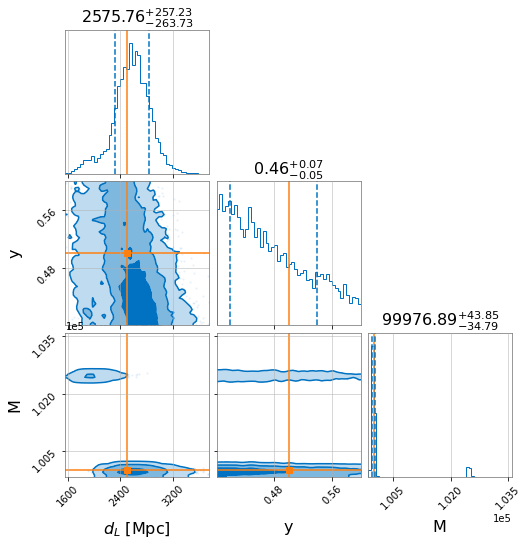

In [ ]:
from bilby.core.prior import PriorDict, Uniform, Constraint
#define priors
prior = injection_parameters.copy()
# for key in ['mass_1', 'mass_2', 'iota', 'phi', 'psi', 'ra', 'dec', 'geocent_time']:
#     prior[key] = injection_parameters[key]

prior['mass_ratio'] = Constraint(name='mass_ratio', minimum=0.125, maximum=1)
prior['chirp_mass'] = Constraint(name='chirp_mass', minimum=25, maximum=31)
prior['mass_1'] = Uniform(name='mass_1', minimum=10, maximum=80)
prior['mass_2'] = Uniform(name='mass_2', minimum=10, maximum=80)
prior['d'] = bilby.core.prior.PowerLaw(alpha=2, name='luminosity_distance', minimum=1000, maximum=4000, unit='Mpc', latex_label='$d_L$')
prior['y'] = bilby.core.prior.Uniform(0.4, 0.6, 'y')
prior['M'] = bilby.core.prior.Uniform(80000, 120000, 'M')

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

#plot corner plots
result = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    resume=False, sample='unif', injection_parameters=injection_parameters)
result.plot_corner()